In [9]:
# Import the functions used in this project
import functions as pf

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle as pkl
slack_url = pkl.load(open("Slack_url/send_url.pickle", "rb"))

import xgboost

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [2]:
df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")
df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")

In [3]:
li_train_by_vn = []
for i in df_train_dd["TripType"].unique():
    tmp = df_train_dd[df_train_dd["TripType"] == i]
    li_train_by_vn.append(tmp)
    
length_train_by_triptype = []
triptype_li = []
for i in range(len(li_train_by_vn)):
    length_train_by_triptype.append(len(li_train_by_vn[i]))
    triptype_li.append(li_train_by_vn[i]["TripType"].unique()[0])

In [71]:
df_dict_by_triptype = dict(zip(triptype_li, li_train_by_vn))

In [10]:
dict_len_by_tt = dict(zip(triptype_li, length_train_by_triptype))

In [55]:
inverse_dict = dict(zip(length_train_by_triptype, triptype_li))

In [14]:
dict_len_by_tt.keys()

dict_keys([999, 30, 26, 8, 35, 41, 21, 6, 42, 7, 9, 39, 25, 38, 15, 36, 20, 37, 32, 40, 5, 3, 4, 24, 33, 43, 31, 27, 34, 18, 29, 44, 19, 23, 22, 28, 14, 12])

In [20]:
import collections

d = dict_len_by_tt
od = collections.OrderedDict(sorted(d.items()))
dict_len_by_tt = dict(od)

In [56]:
d = inverse_dict
od = collections.OrderedDict(sorted(d.items()))
inverse_dict = dict(od)

In [53]:
vals = np.array(list(dict_len_by_tt.values()))

In [54]:
vals.min()

4

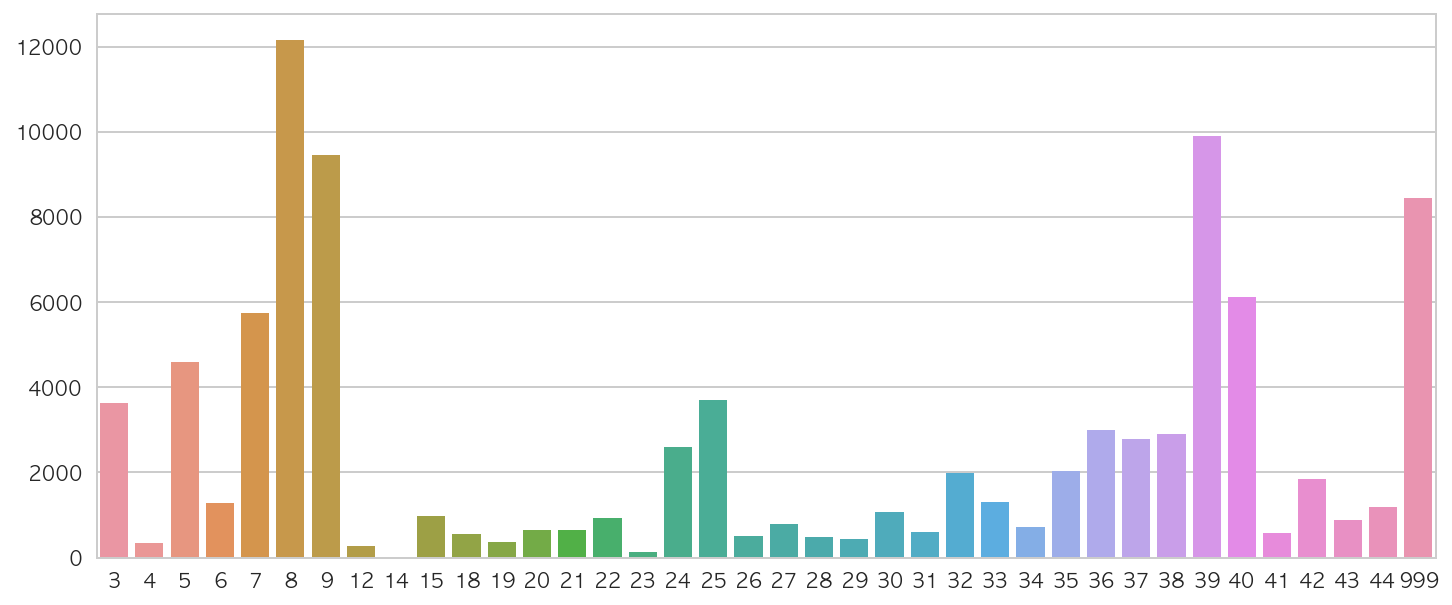

In [28]:
plt.figure(figsize=(12, 5))
sns.barplot(x = list(dict_len_by_tt.keys()), y = list(dict_len_by_tt.values()))
plt.show()

In [83]:
npsum = [np.sum for col in cols]

In [84]:
agg_dict = dict(zip(cols, npsum))

In [87]:
dd_by_triptype = df_train_dd.groupby("TripType").agg(agg_dict).reset_index()

In [29]:
len(dict_len_by_tt)

38

In [161]:
df_train_fl

VisitNumber  Return  TripType  0.0  1.0  2.0  3.0  4.0  5.0  6.0   ...    \
0            5       1       999    0    0    0    0    0    0    0   ...     
1            7       0        30    0    0    0    0    0    0    0   ...     
2            8       0        26    0    0    0    0    0    0    0   ...     
3            9       0         8    0    0    0    0    0    0    0   ...     
4           10       0         8    0    0    0    0    0    0    0   ...     

   1627.0  -1  8191.0  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0       0   0       0       0        0          0         0       1         0   
1       0   0       0       0        0          0         0       1         0   
2       0   1       0       0        0          0         0       1         0   
3       0   0       0       0        0          0         0       1         0   
4       0   0       0       0        0          0         0       1         0   

   Sunday  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 5364 columns]

In [4]:
cols_fl = [col for col in df_train_fl.columns if col not in ["VisitNumber", "TripType"]]

In [5]:
npsum_fl = [np.sum for col in cols_fl]

In [6]:
agg_dict_fl = dict(zip(cols_fl, npsum_fl))

In [7]:
fl_by_triptype = df_train_fl.groupby("TripType").agg(agg_dict_fl).reset_index()

In [82]:
cols = [col for col in li_train_by_vn[0].columns if col not in ["VisitNumber", "TripType"]]
# cols = cols[:-7]

In [76]:
print(sorted(df_dict_by_triptype.keys()))

[3, 4, 5, 6, 7, 8, 9, 12, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 999]


In [127]:
dd_by_triptype

TripType  Return  1-HR PHOTO  ACCESSORIES  AUTOMOTIVE  BAKERY  \
0          3      42           2            2          22       5   
1          4       7           0            1           3      15   
2          5     102           1           16          45      79   
3          6      44           5            2           5      25   
4          7     205           1            9          36    1144   
5          8     272           0            6          59     488   
6          9     274          91          171         969      63   
7         12      17           0            0           4      23   
8         14       1           0            0           0       0   
9         15      51          16            8           5     248   
10        18      33           0            3          18      28   
11        19      17           1            2           8       3   
12        20      44           0            4        1932      18   
13        21      34           3            5           5      13   
14        22      56         245            2          26      26   
15        23       9           0            0           0       0   
16        24     146           4           21          83      93   
17        25     251          11          155          74     123   
18        26      27           0            1          41      14   
19        27      46           0            3          22      32   
20        28      25           0            7          15      16   
21        29      27           0            1          31      11   
22        30      36           0          184          26      28   
23        31      28           1            2           9       8   
24        32     110           0           16          48     107   
25        33      81           1            4          33      60   
26        34      41           0            2          61      53   
27        35      86           1            3          35     256   
28        36     168          10           31          99      97   
29        37     288           0           17          65     641   
30        38     189           5           14          57     597   
31        39     623           0           99         459    1534   
32        40     902           1          124         451    1990   
33        41      51           1           91         120      43   
34        42     153           8          151         407      98   
35        43      47           1           23         135      58   
36        44     118           0           83         227     139   
37       999    6426          48           11          28     144   

    BATH AND SHOWER  BEAUTY  BEDDING  BOOKS AND MAGAZINES   ...    \
0                 8      24        4                    4   ...     
1                 0       7        0                    0   ...     
2                28     246        7                   15   ...     
3                 6      23        3                    2   ...     
4                 5      79        6                   15   ...     
5                28    1122        4                   15   ...     
6               216     154      132                   99   ...     
7                18      20        2                    1   ...     
8                 0       0        0                    0   ...     
9                10      58        3                   11   ...     
10               13      39        6                   17   ...     
11               11      13        6                    3   ...     
12                9      59        2                    4   ...     
13                7      29        6                  103   ...     
14               32      59       12                    8   ...     
15                0       3        1                    0   ...     
16             1729     414     1276                   26   ...     
17              199     590       67                   44   ...     
1

In [99]:
dd_by_triptype[cols].loc[0].values

Index(['Return', '1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY',
       'BATH AND SHOWER', 'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES',
       'BOYS WEAR', 'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES',
       'CANDY, TOBACCO, COOKIES', 'CELEBRATION', 'COMM BREAD',
       'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'Null', 'OFFICE SUPPLIES', 'OPTICAL - FRAMES'

In [108]:
len(dd_by_triptype)

38

In [152]:
dd_by_triptype

TripType  Return  1-HR PHOTO  ACCESSORIES  AUTOMOTIVE  BAKERY  \
0          3      42           2            2          22       5   
1          4       7           0            1           3      15   
2          5     102           1           16          45      79   
3          6      44           5            2           5      25   
4          7     205           1            9          36    1144   
5          8     272           0            6          59     488   
6          9     274          91          171         969      63   
7         12      17           0            0           4      23   
8         14       1           0            0           0       0   
9         15      51          16            8           5     248   
10        18      33           0            3          18      28   
11        19      17           1            2           8       3   
12        20      44           0            4        1932      18   
13        21      34           3            5           5      13   
14        22      56         245            2          26      26   
15        23       9           0            0           0       0   
16        24     146           4           21          83      93   
17        25     251          11          155          74     123   
18        26      27           0            1          41      14   
19        27      46           0            3          22      32   
20        28      25           0            7          15      16   
21        29      27           0            1          31      11   
22        30      36           0          184          26      28   
23        31      28           1            2           9       8   
24        32     110           0           16          48     107   
25        33      81           1            4          33      60   
26        34      41           0            2          61      53   
27        35      86           1            3          35     256   
28        36     168          10           31          99      97   
29        37     288           0           17          65     641   
30        38     189           5           14          57     597   
31        39     623           0           99         459    1534   
32        40     902           1          124         451    1990   
33        41      51           1           91         120      43   
34        42     153           8          151         407      98   
35        43      47           1           23         135      58   
36        44     118           0           83         227     139   
37       999    6426          48           11          28     144   

    BATH AND SHOWER  BEAUTY  BEDDING  BOOKS AND MAGAZINES   ...    \
0                 8      24        4                    4   ...     
1                 0       7        0                    0   ...     
2                28     246        7                   15   ...     
3                 6      23        3                    2   ...     
4                 5      79        6                   15   ...     
5                28    1122        4                   15   ...     
6               216     154      132                   99   ...     
7                18      20        2                    1   ...     
8                 0       0        0                    0   ...     
9                10      58        3                   11   ...     
10               13      39        6                   17   ...     
11               11      13        6                    3   ...     
12                9      59        2                    4   ...     
13                7      29        6                  103   ...     
14               32      59       12                    8   ...     
15                0       3        1                    0   ...     
16             1729     414     1276                   26   ...     
17              199     590       67                   44   ...     
1

In [109]:
index = dd_by_triptype[cols].loc[0].index

In [ ]:
triptype_li = [4, 8, 9, 12, 14, 22, 29, 41, 42]

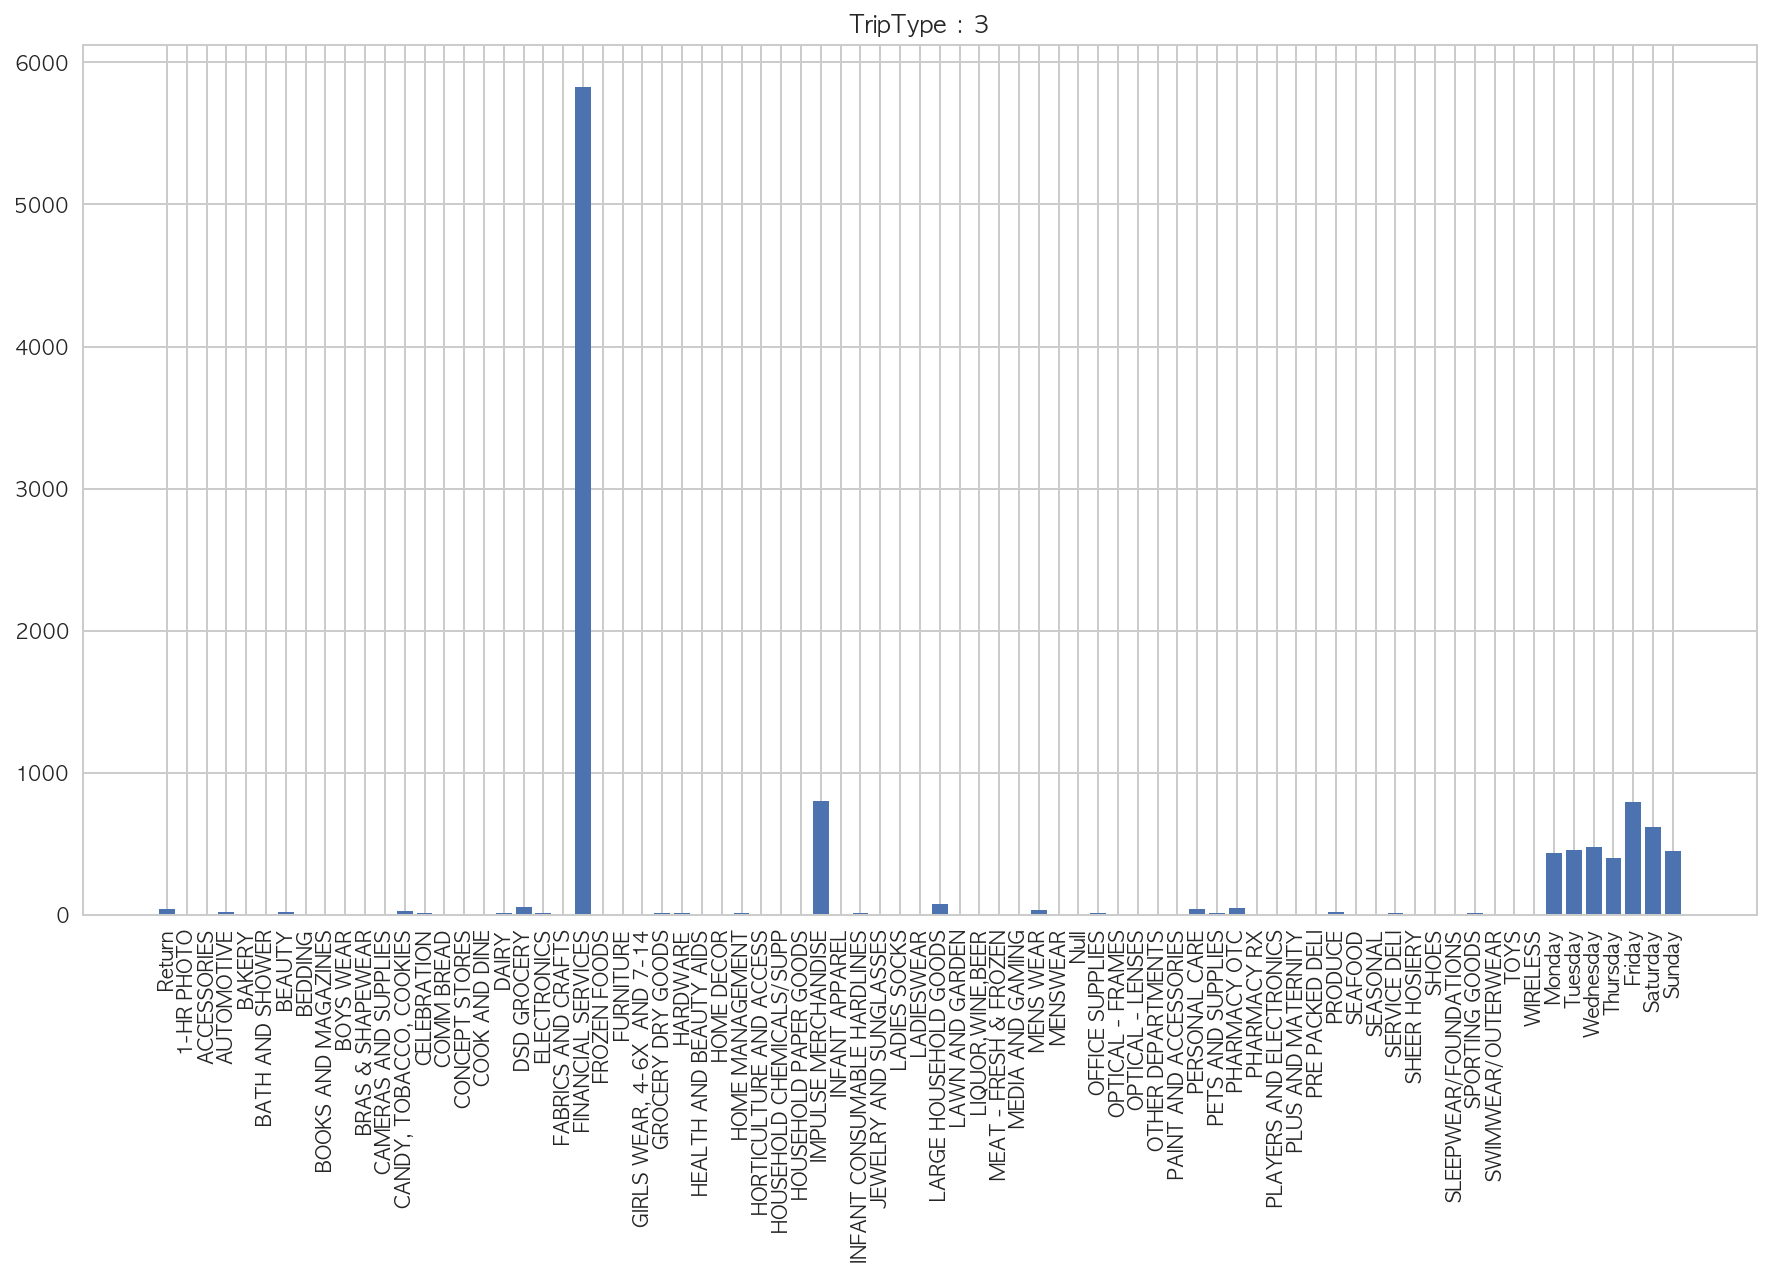

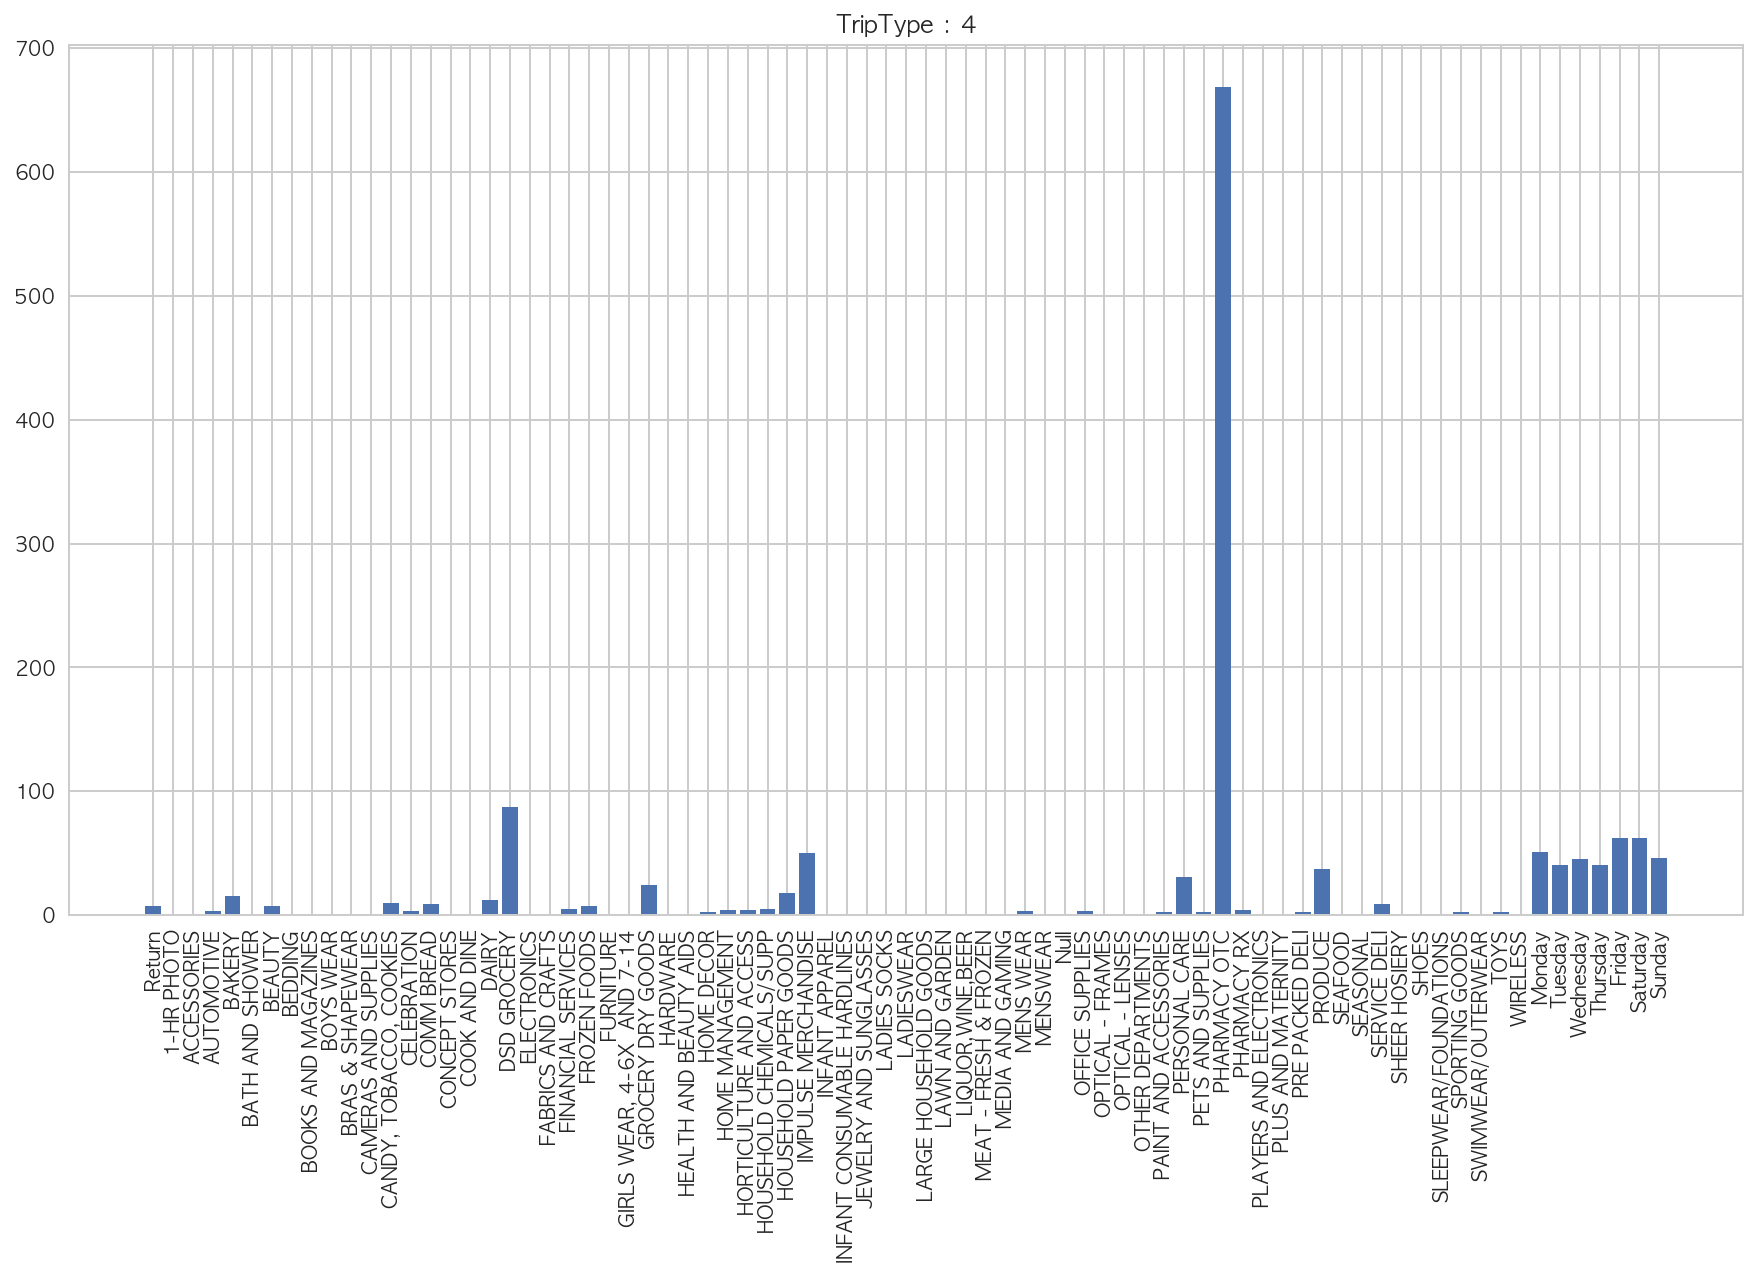

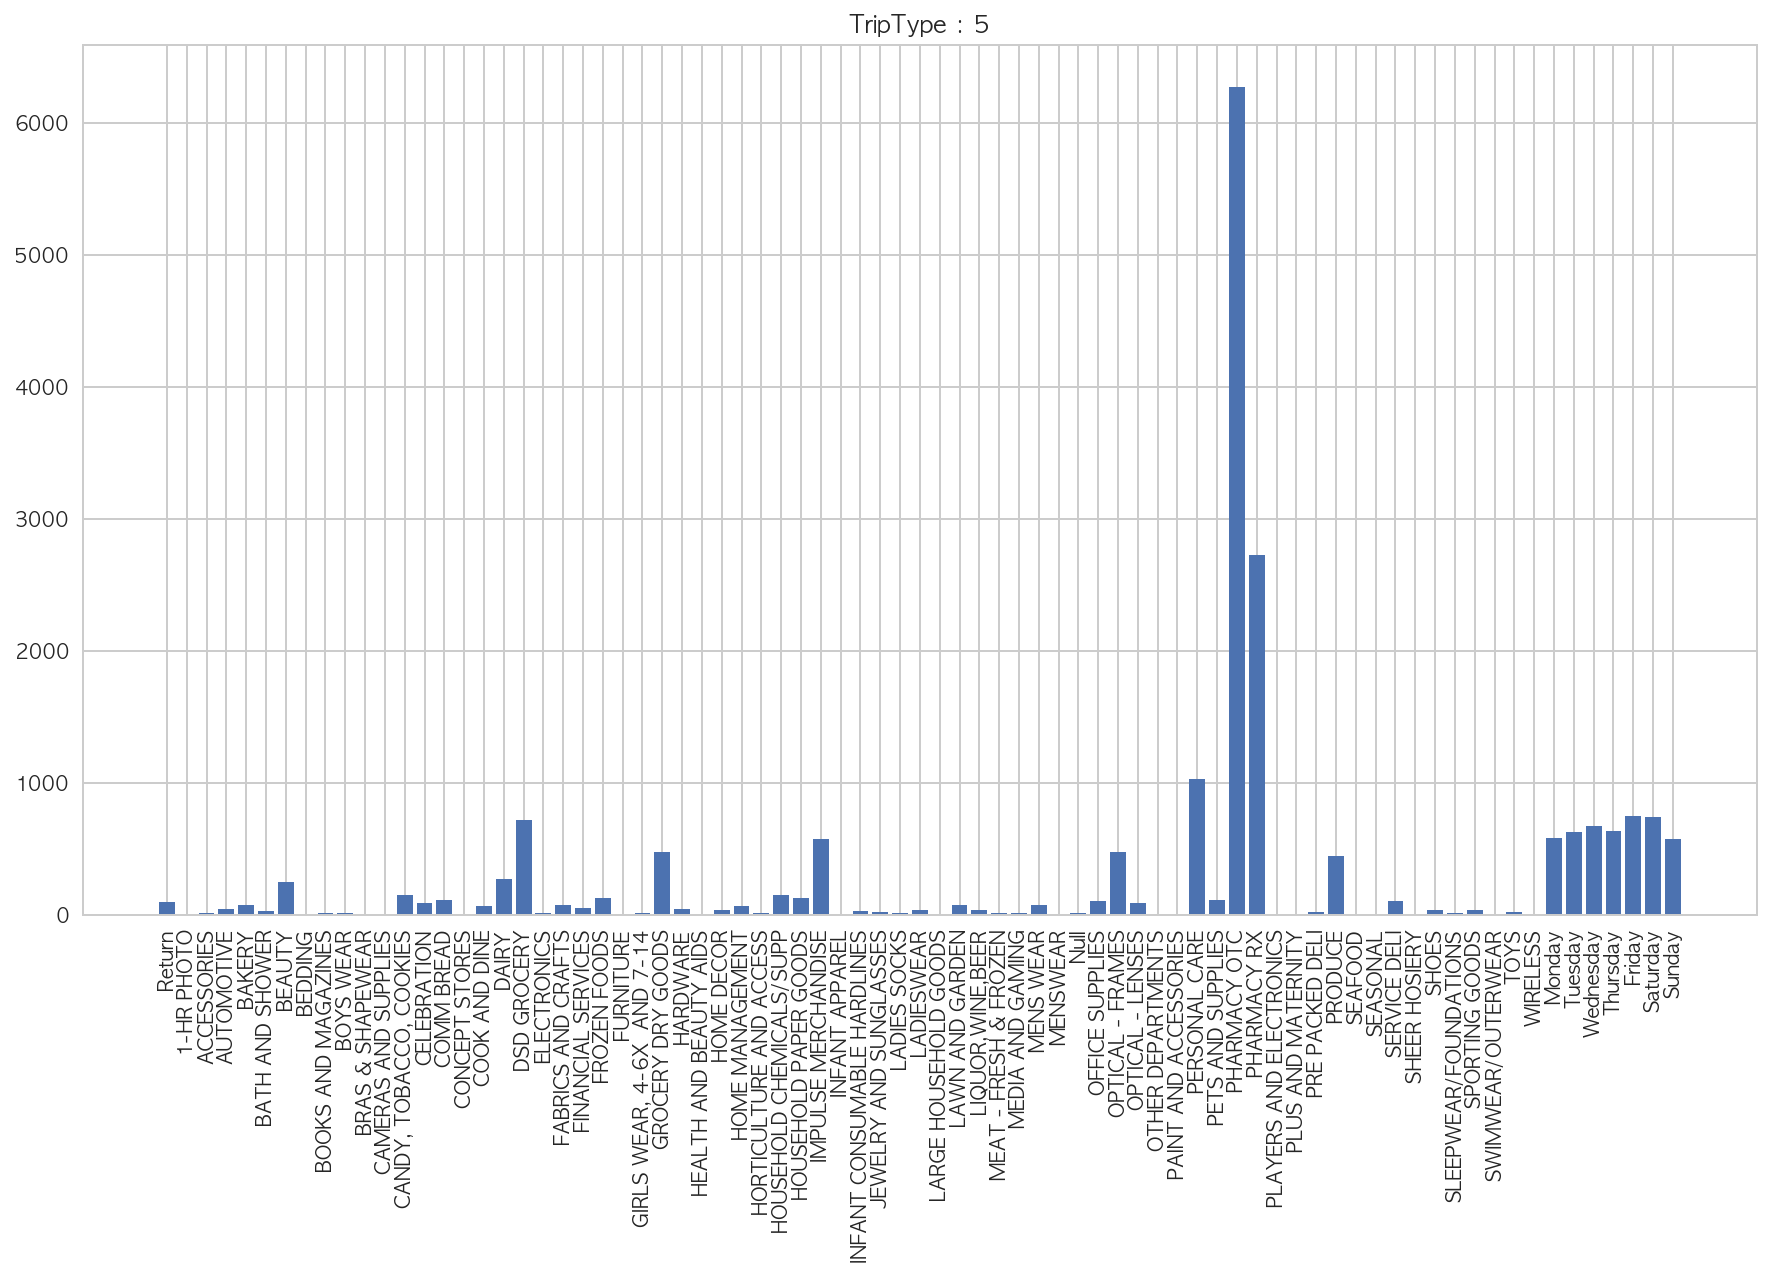

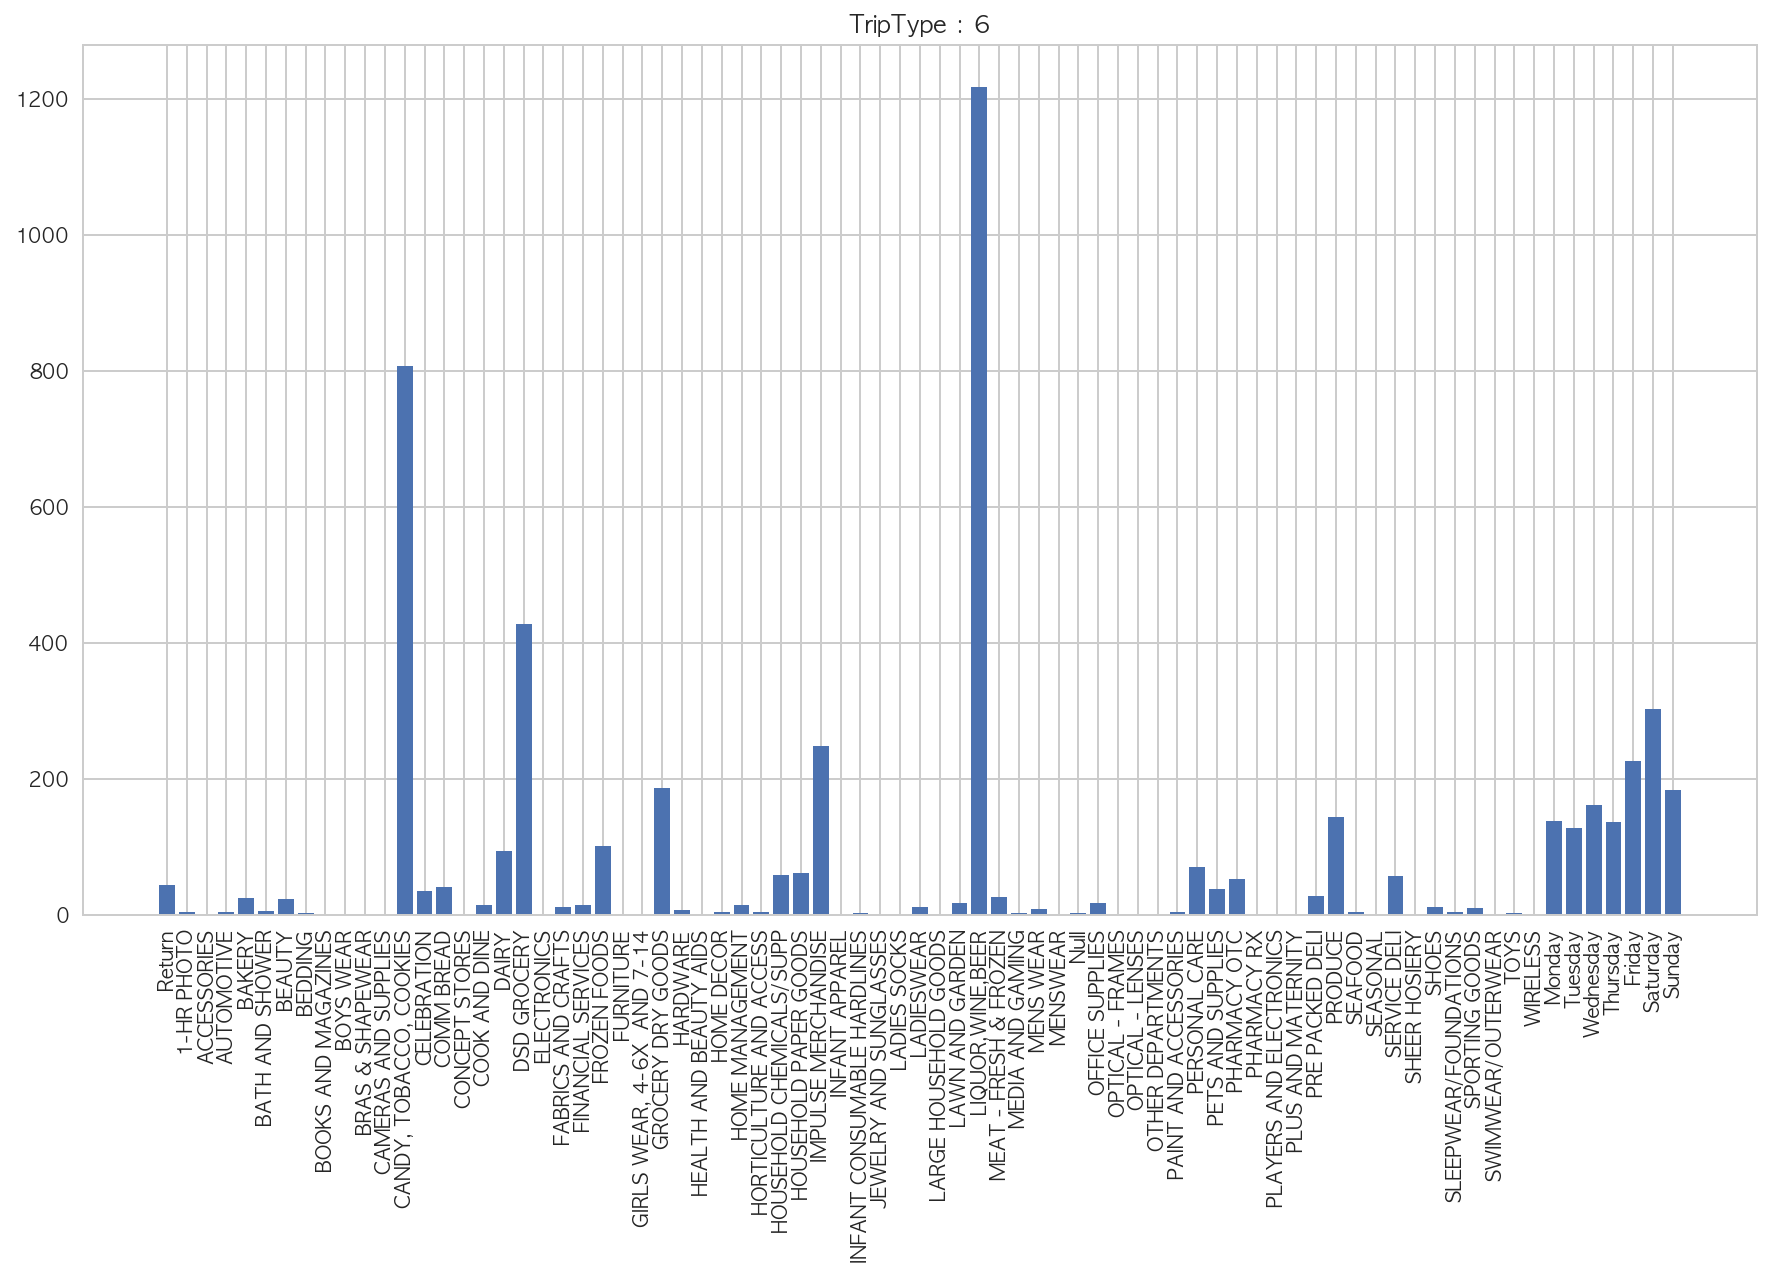

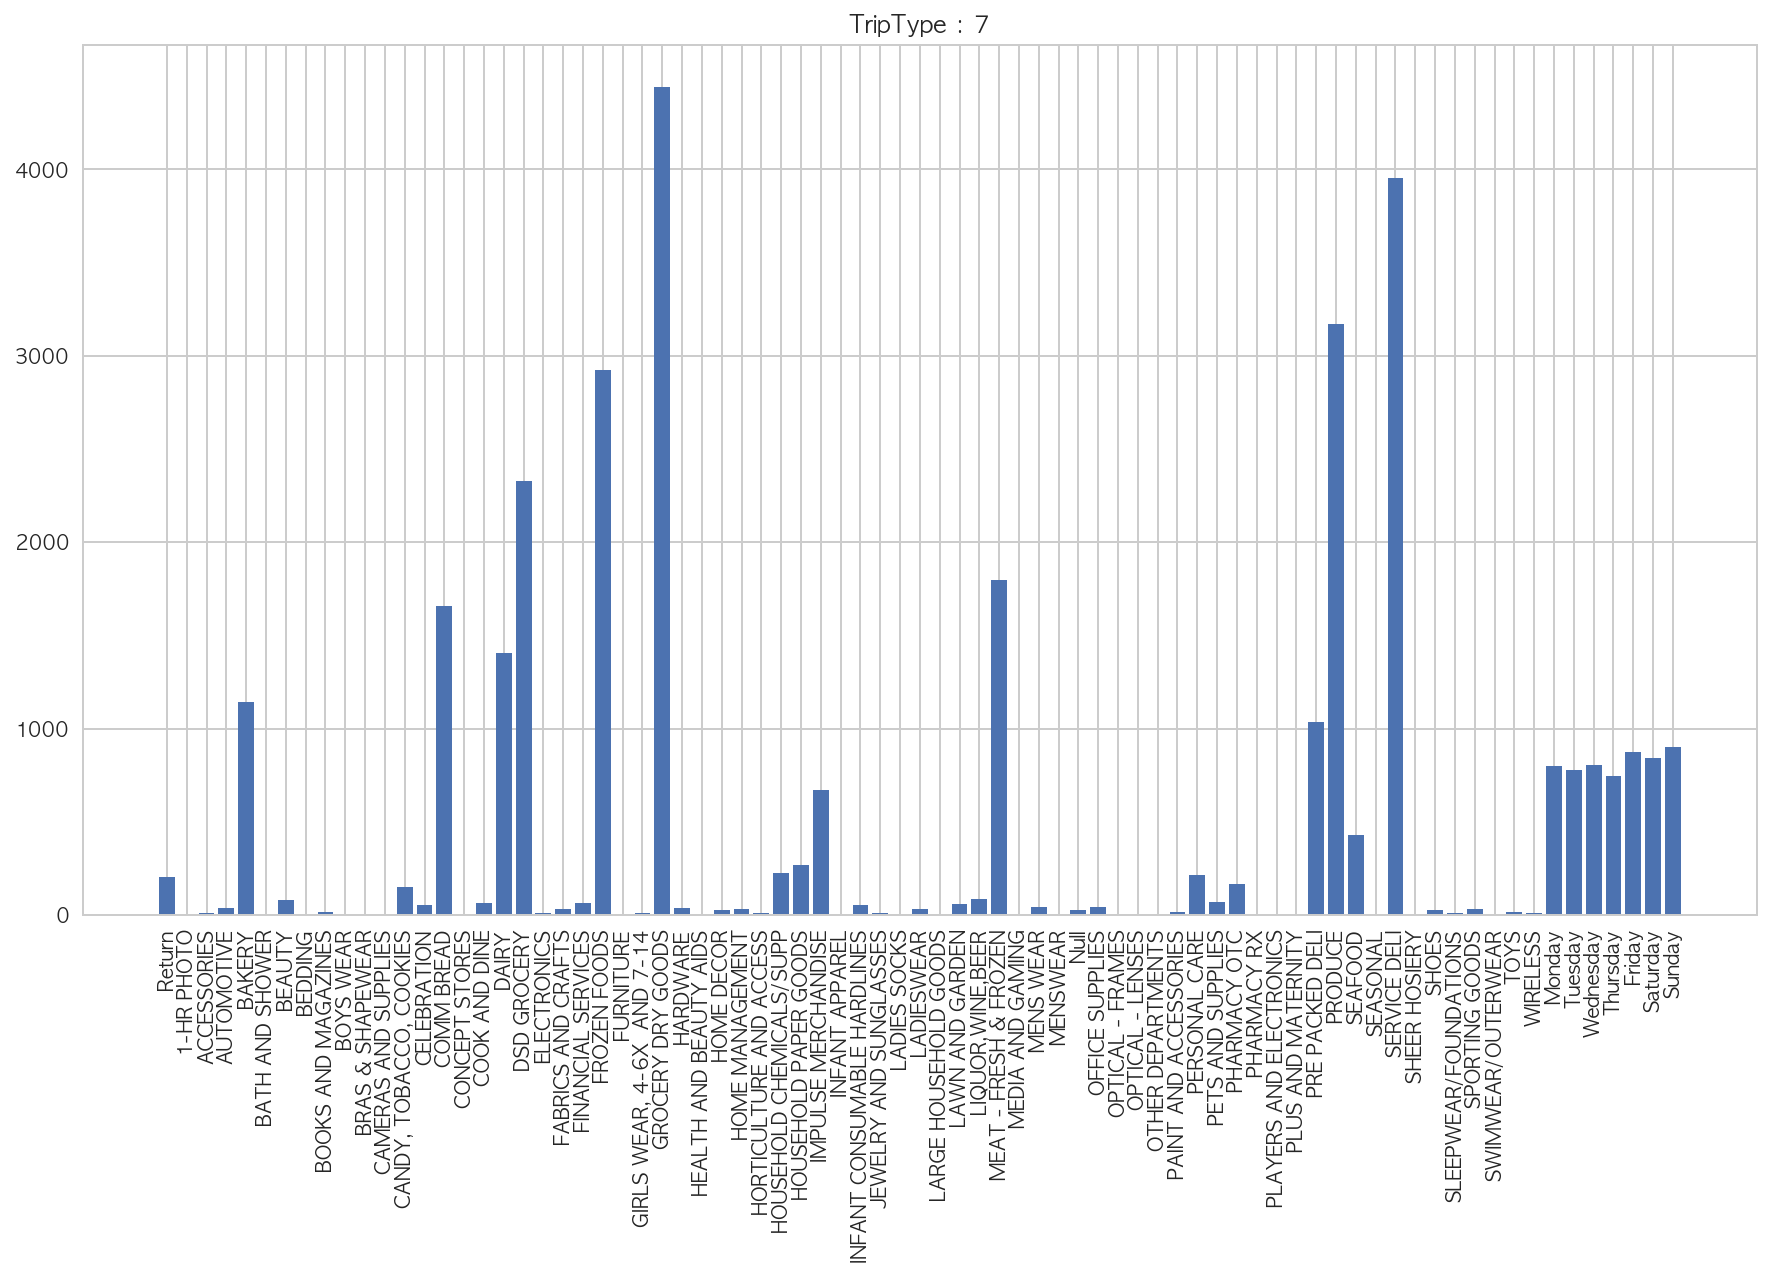

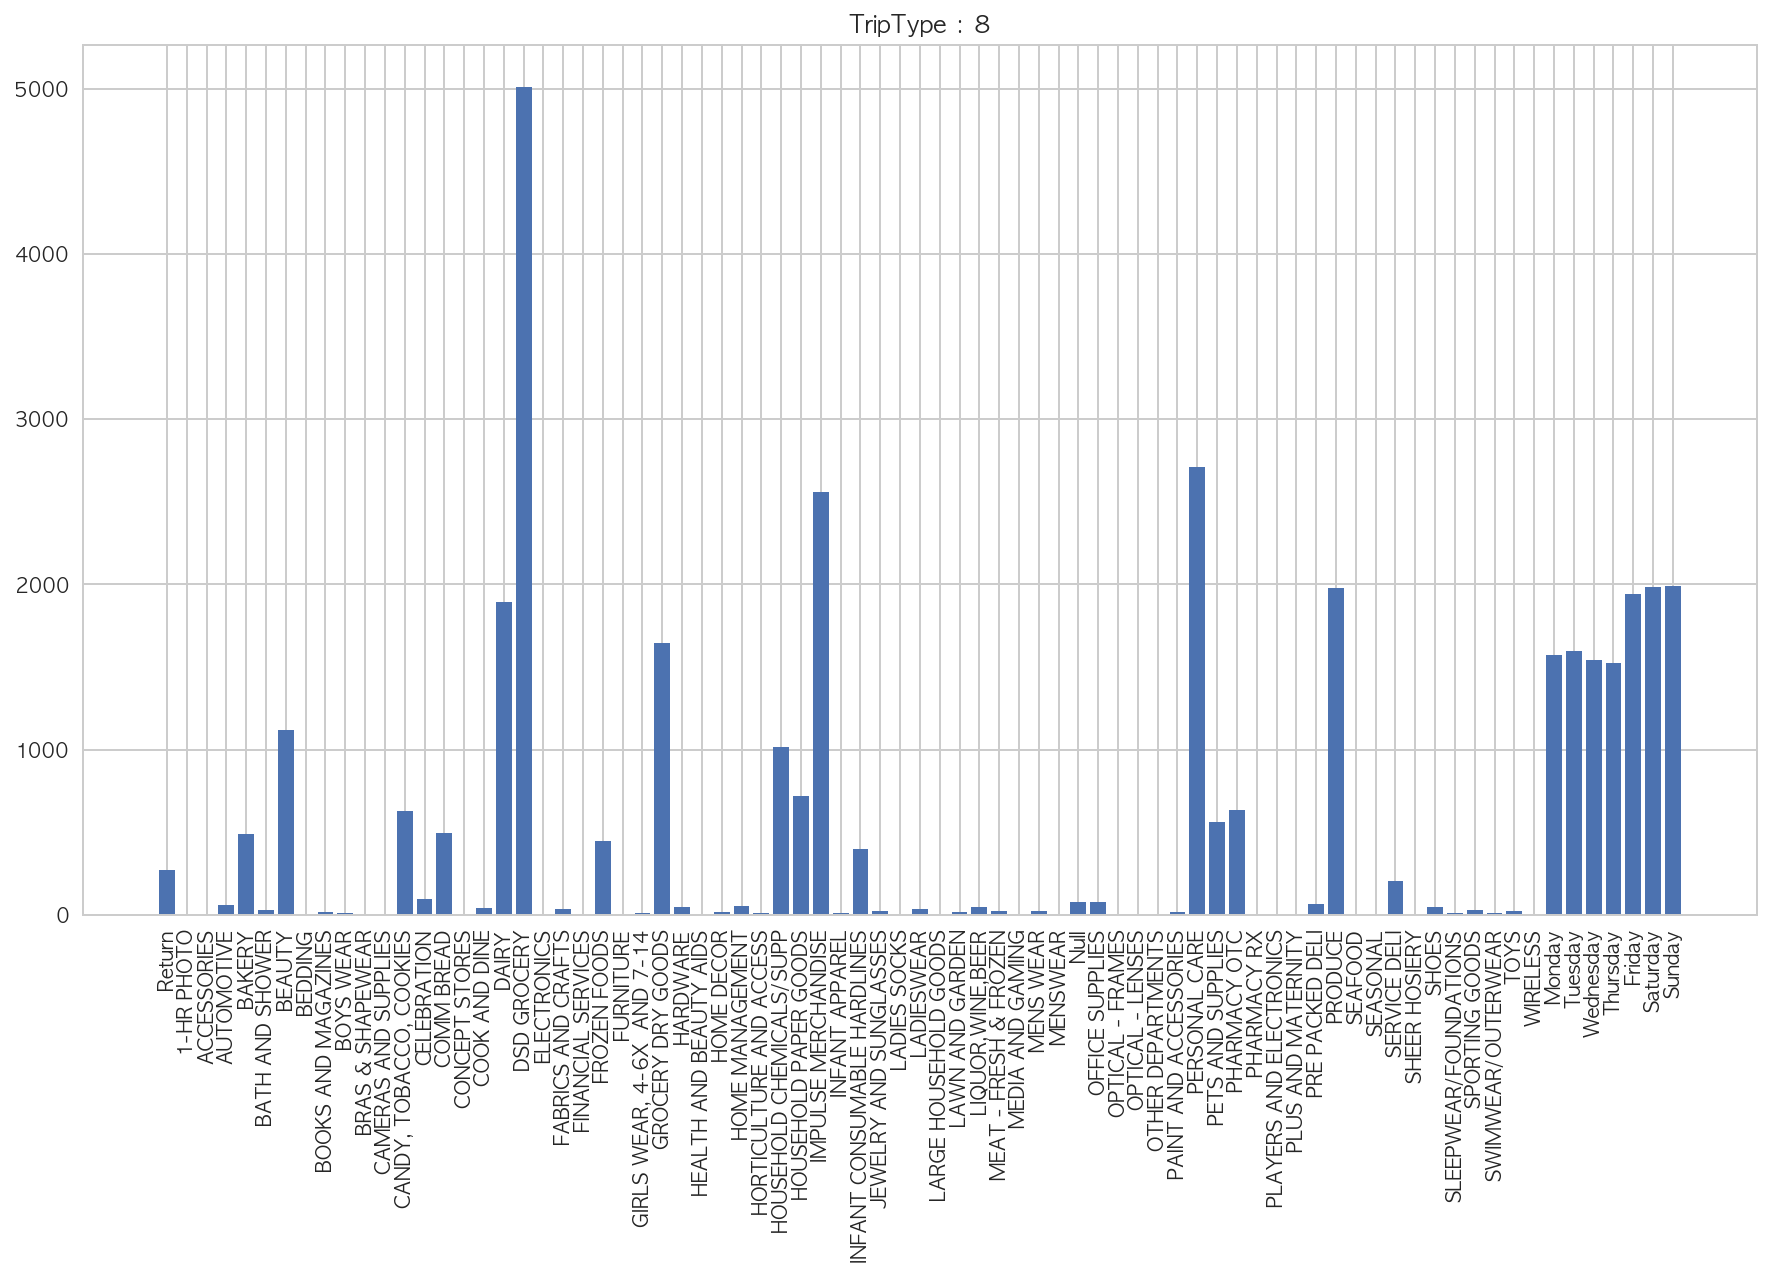

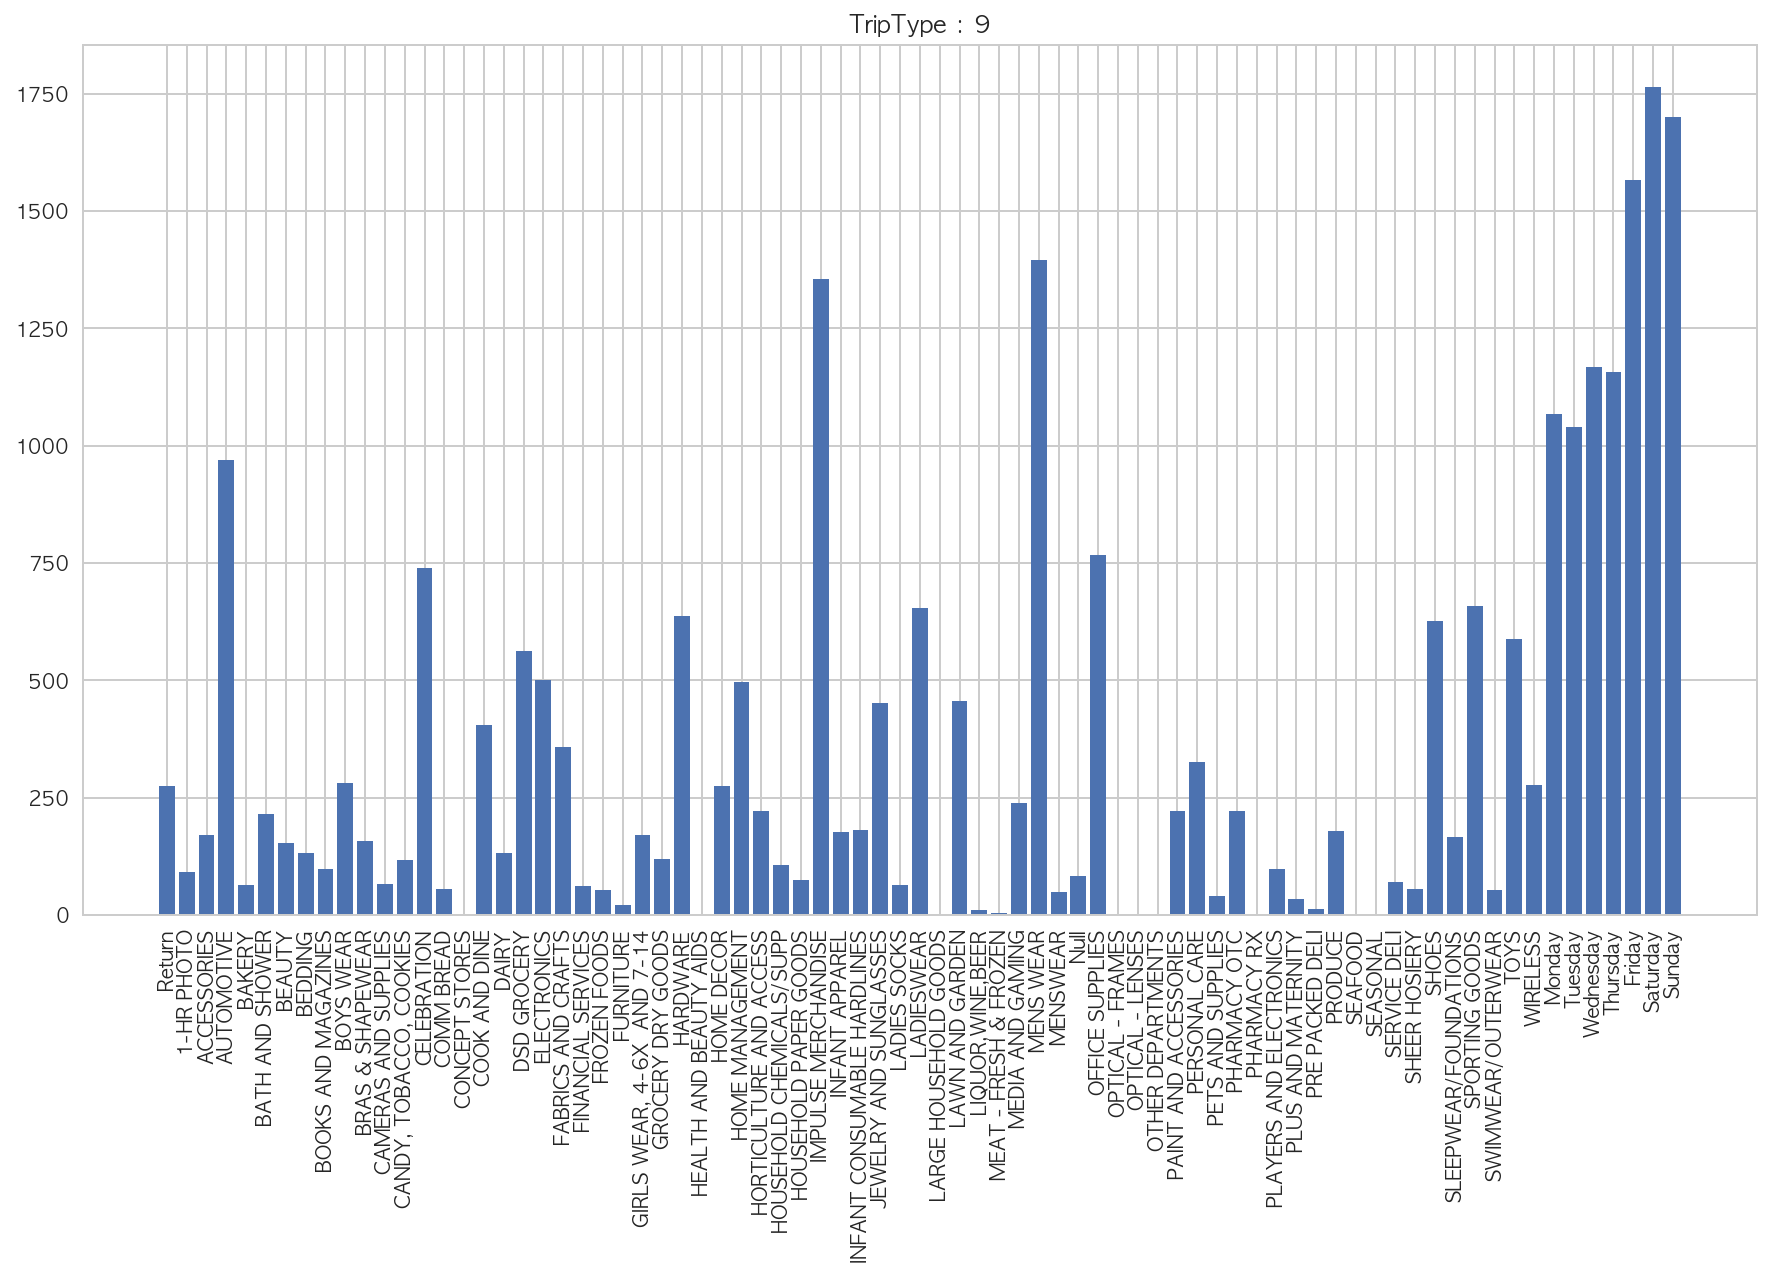

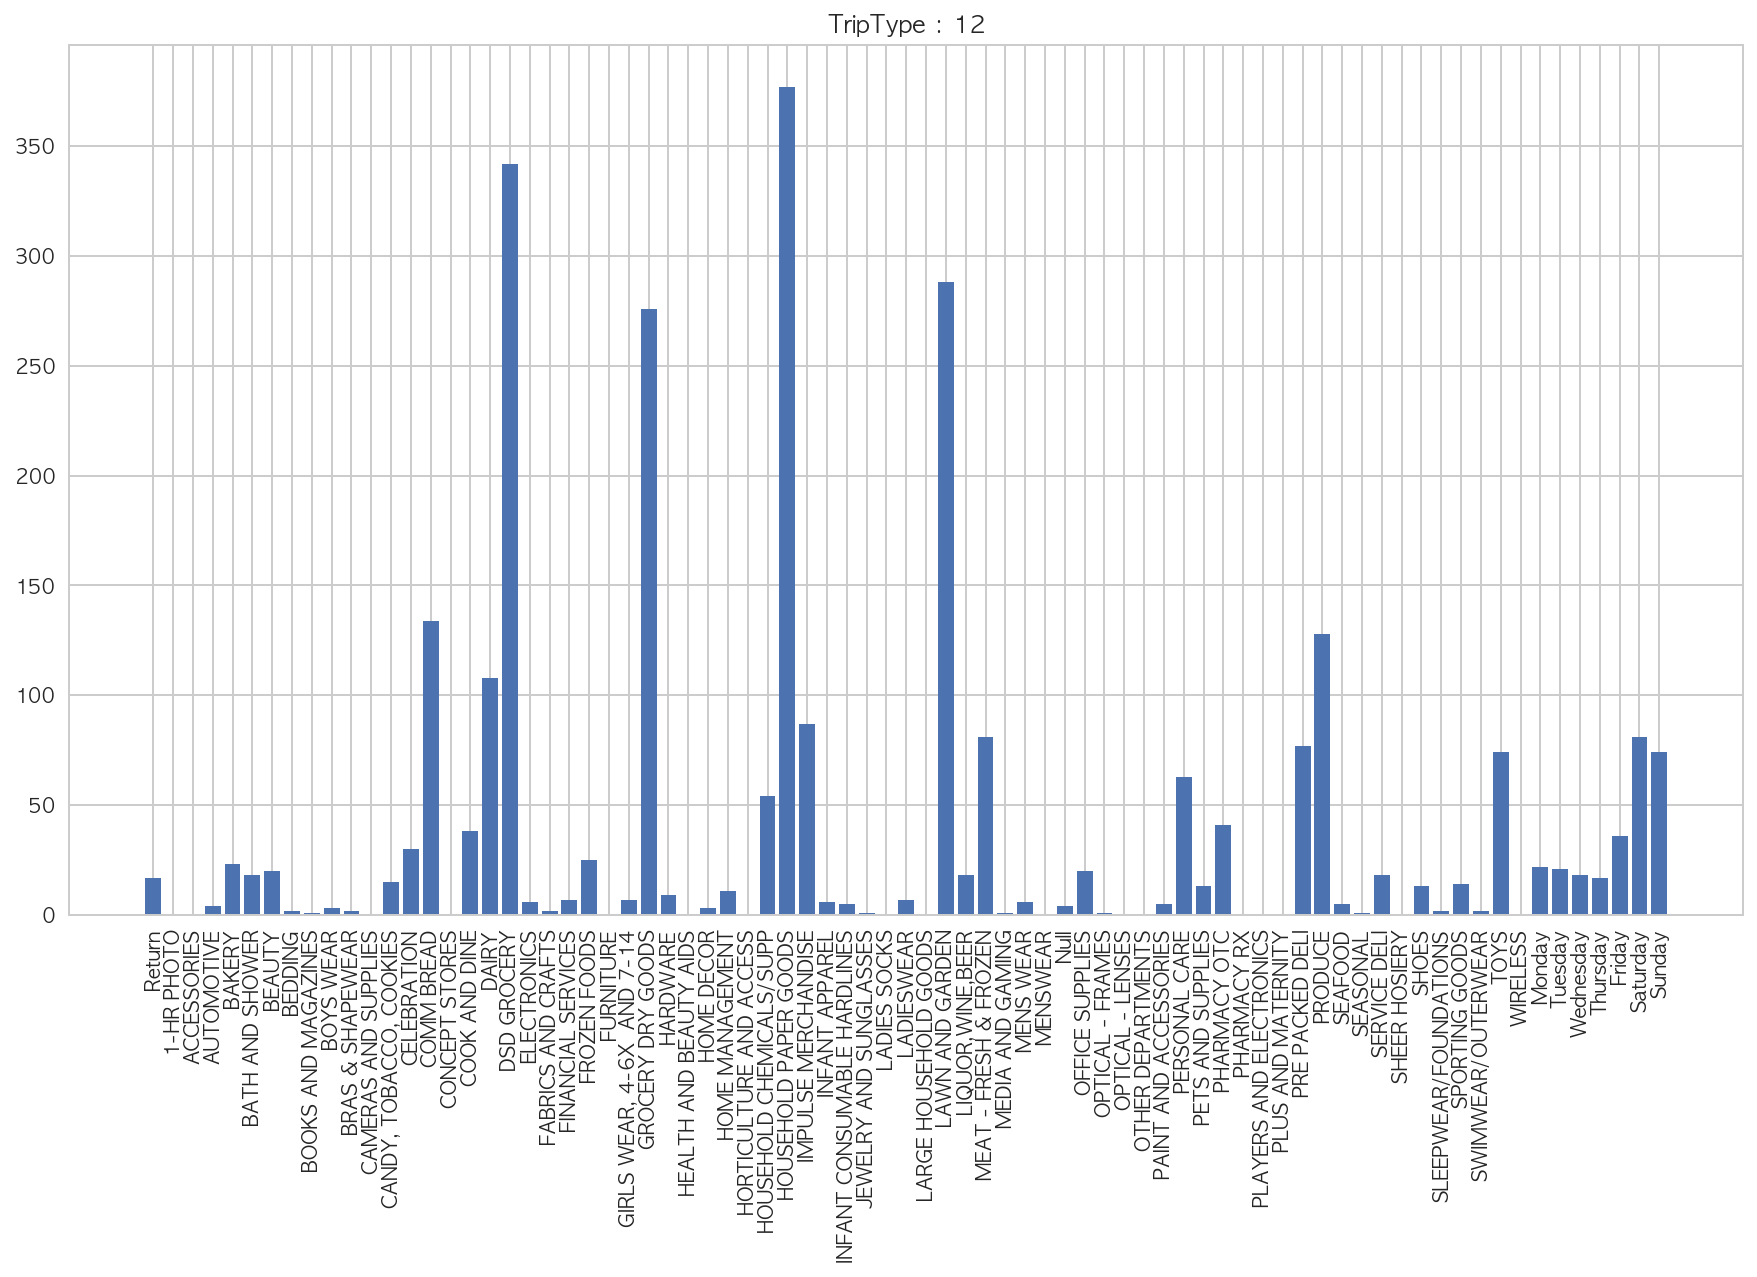

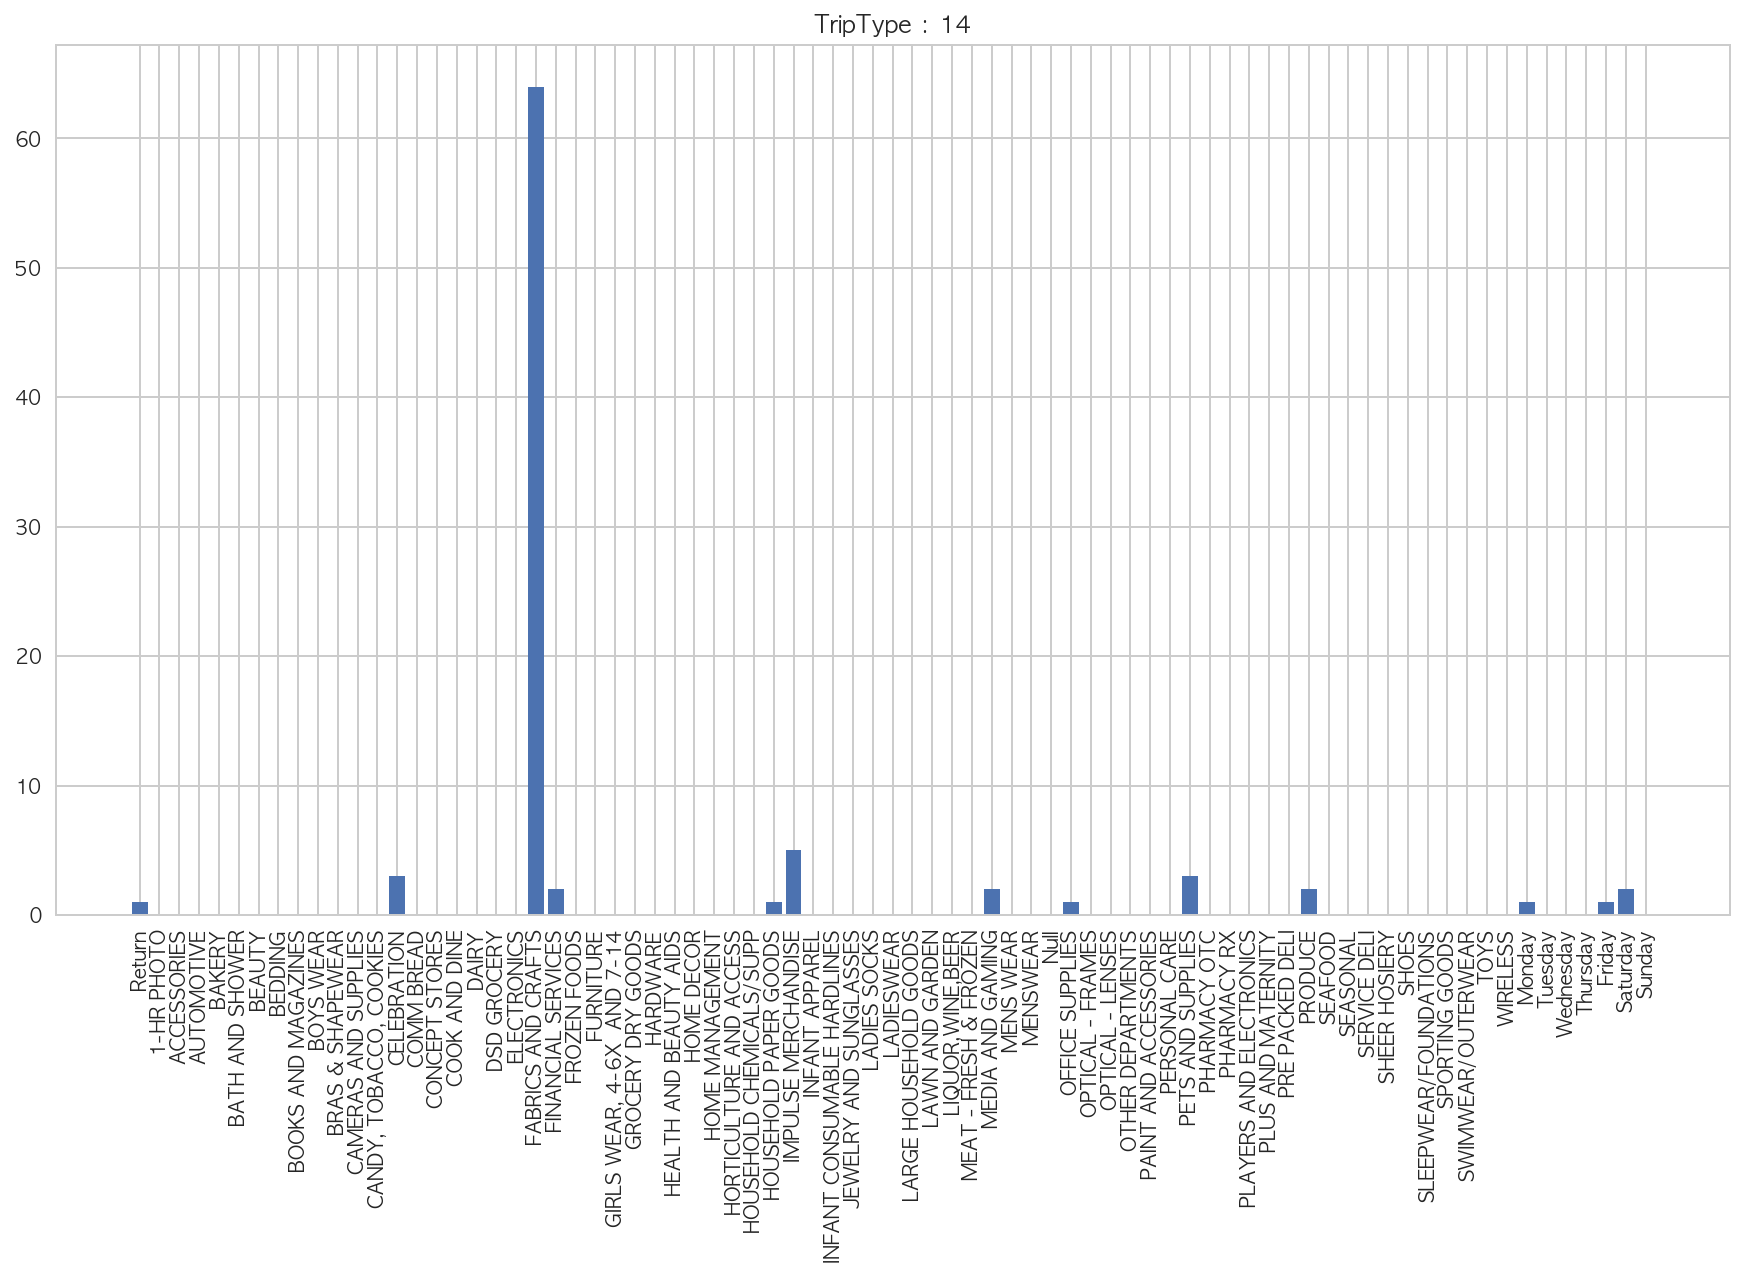

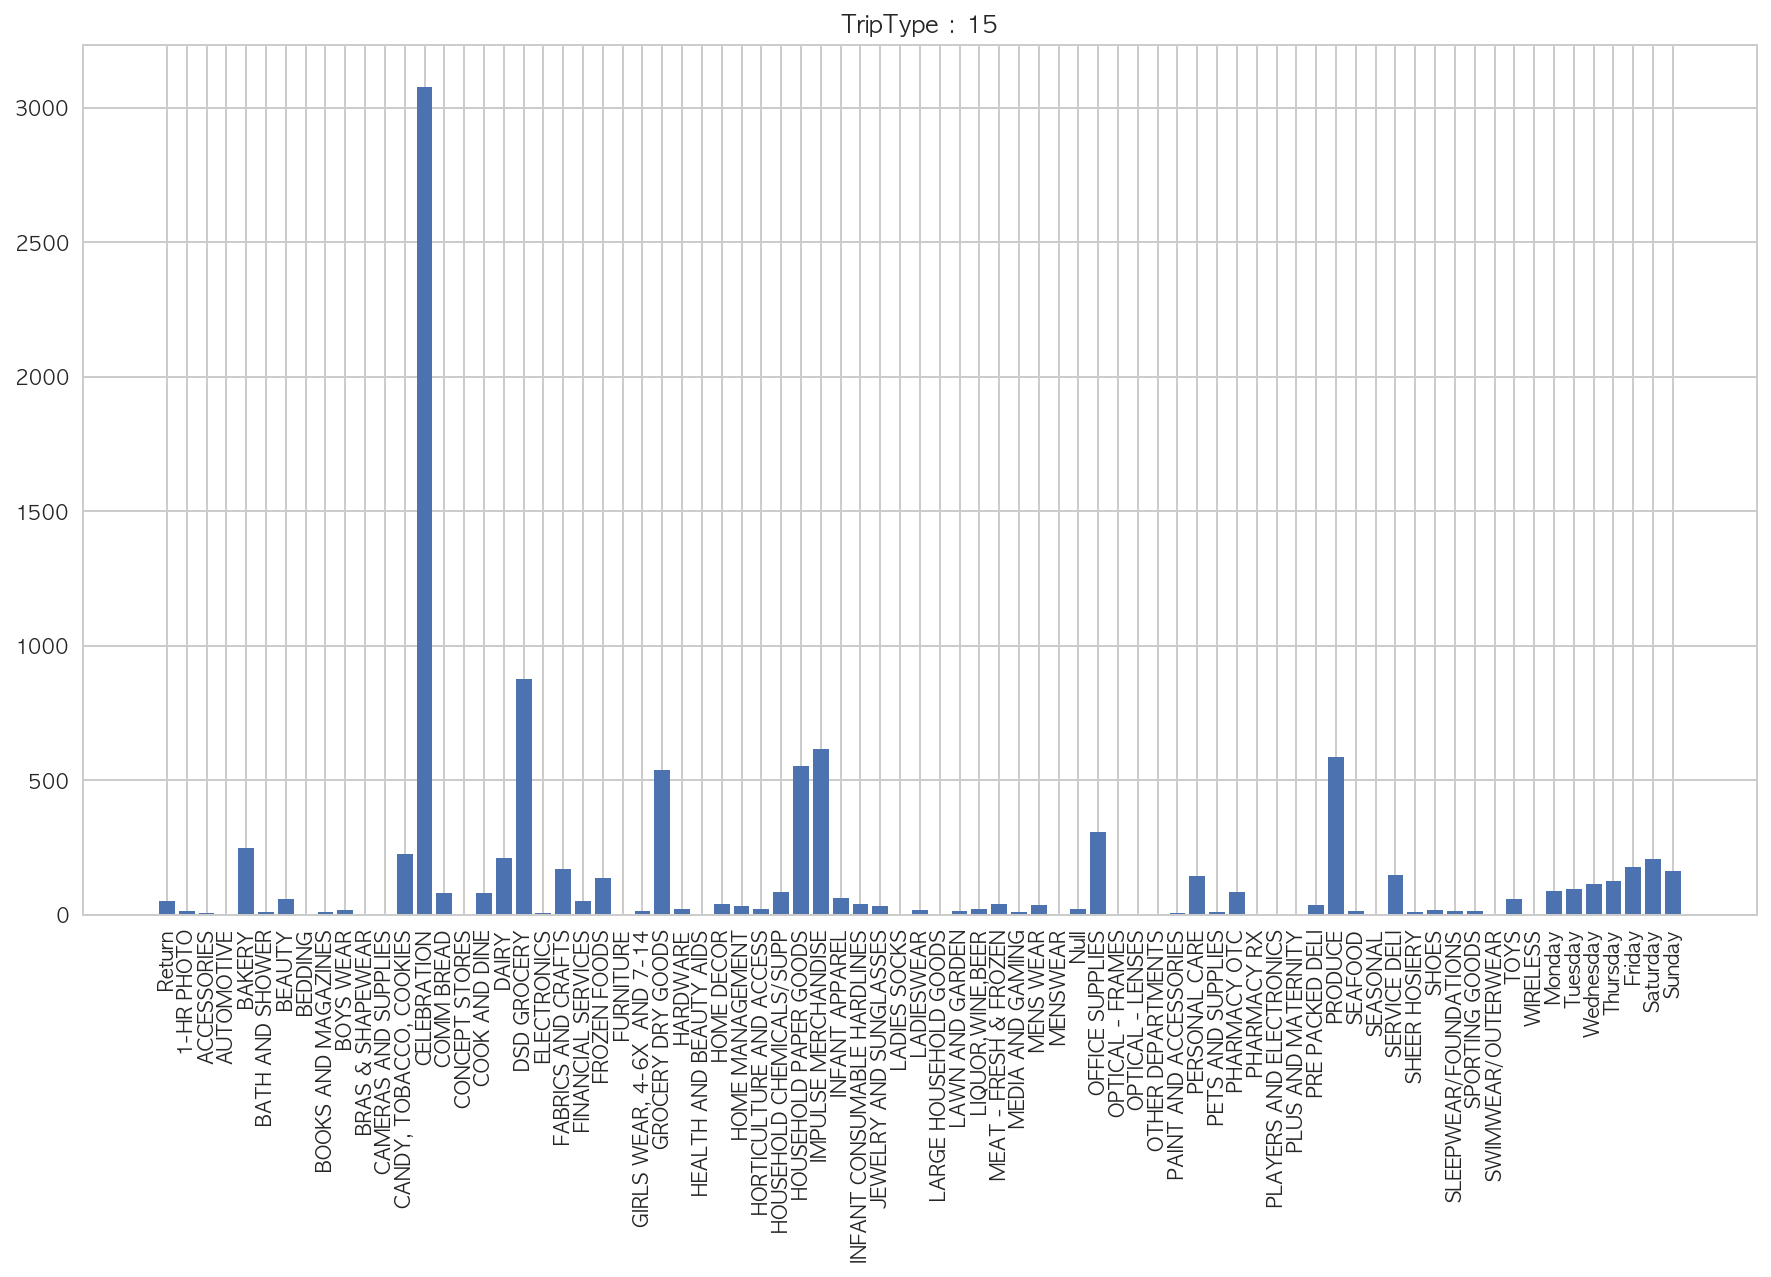

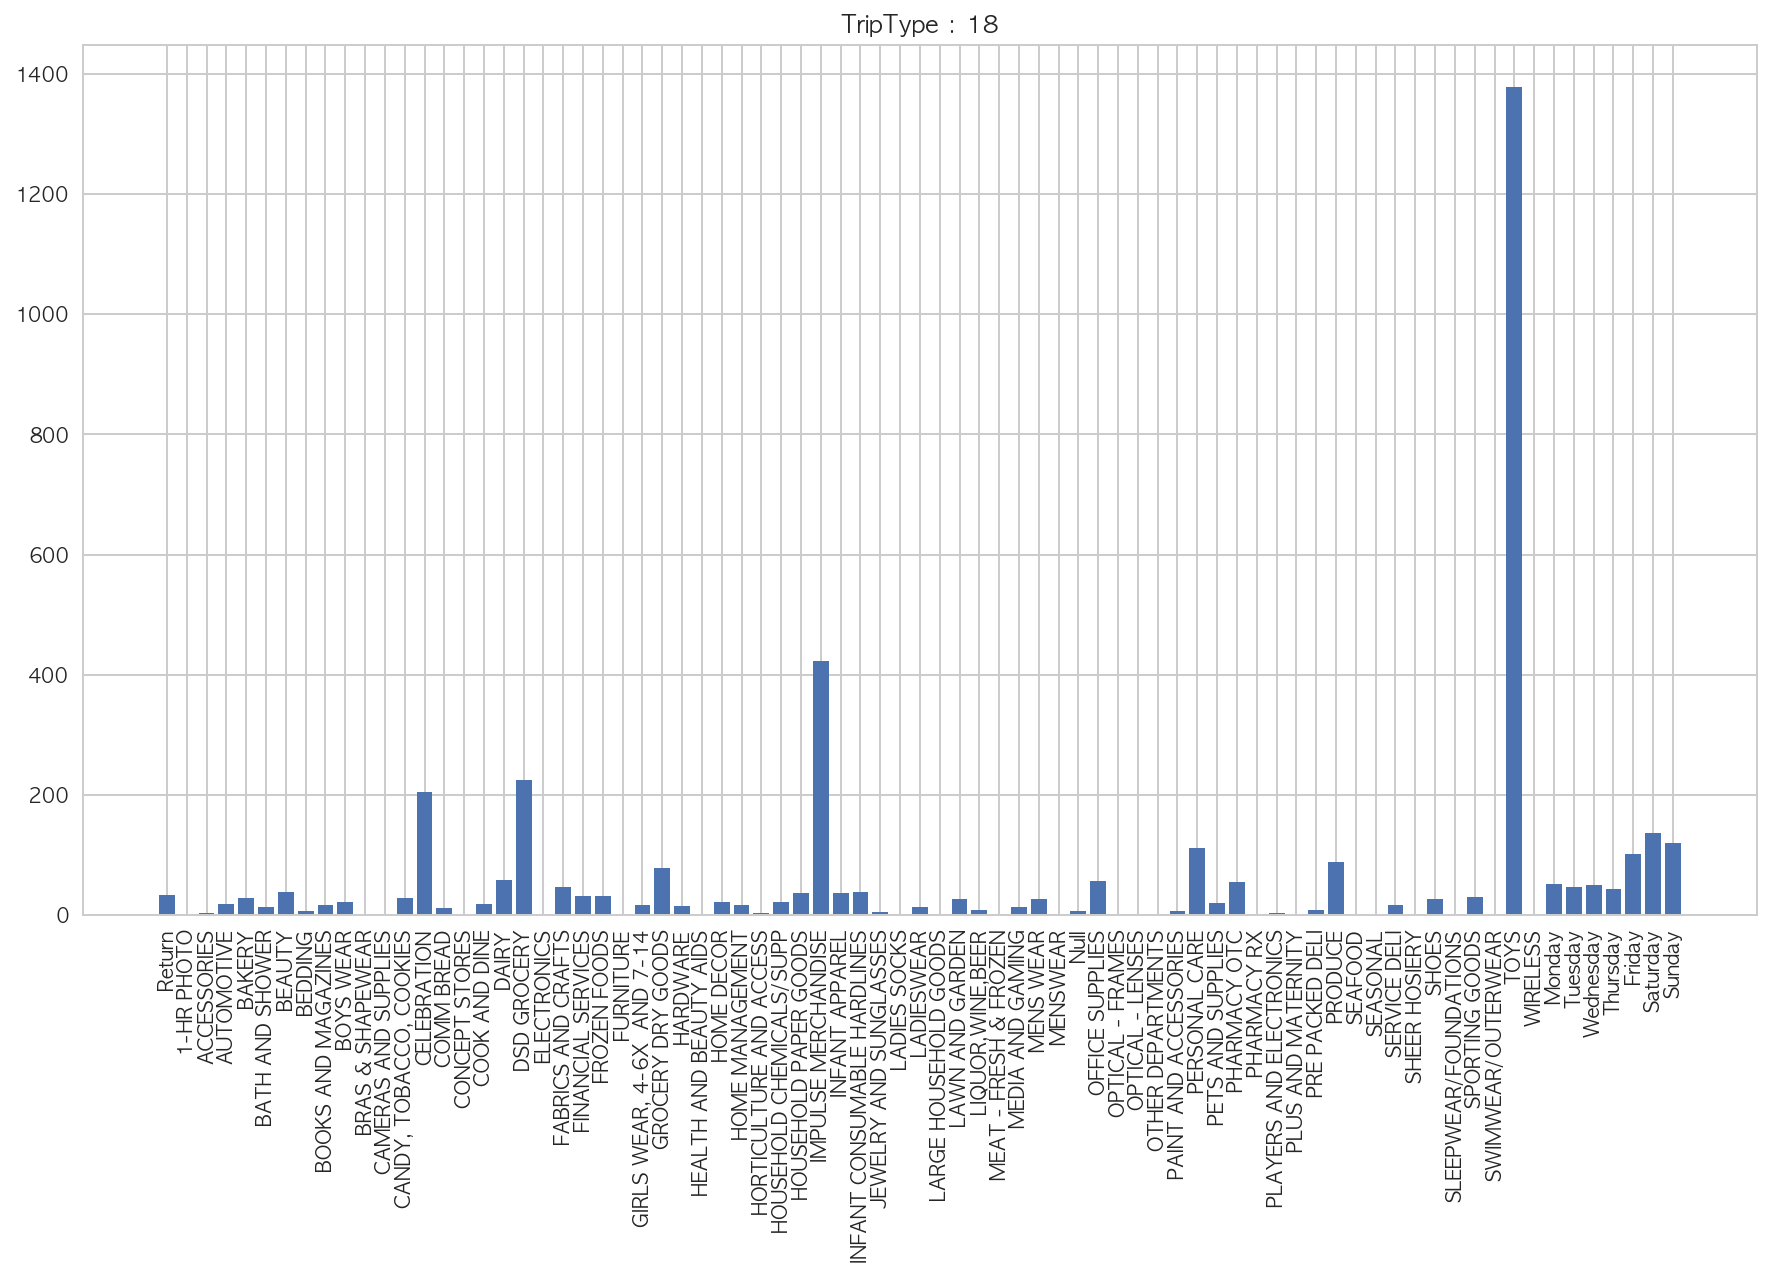

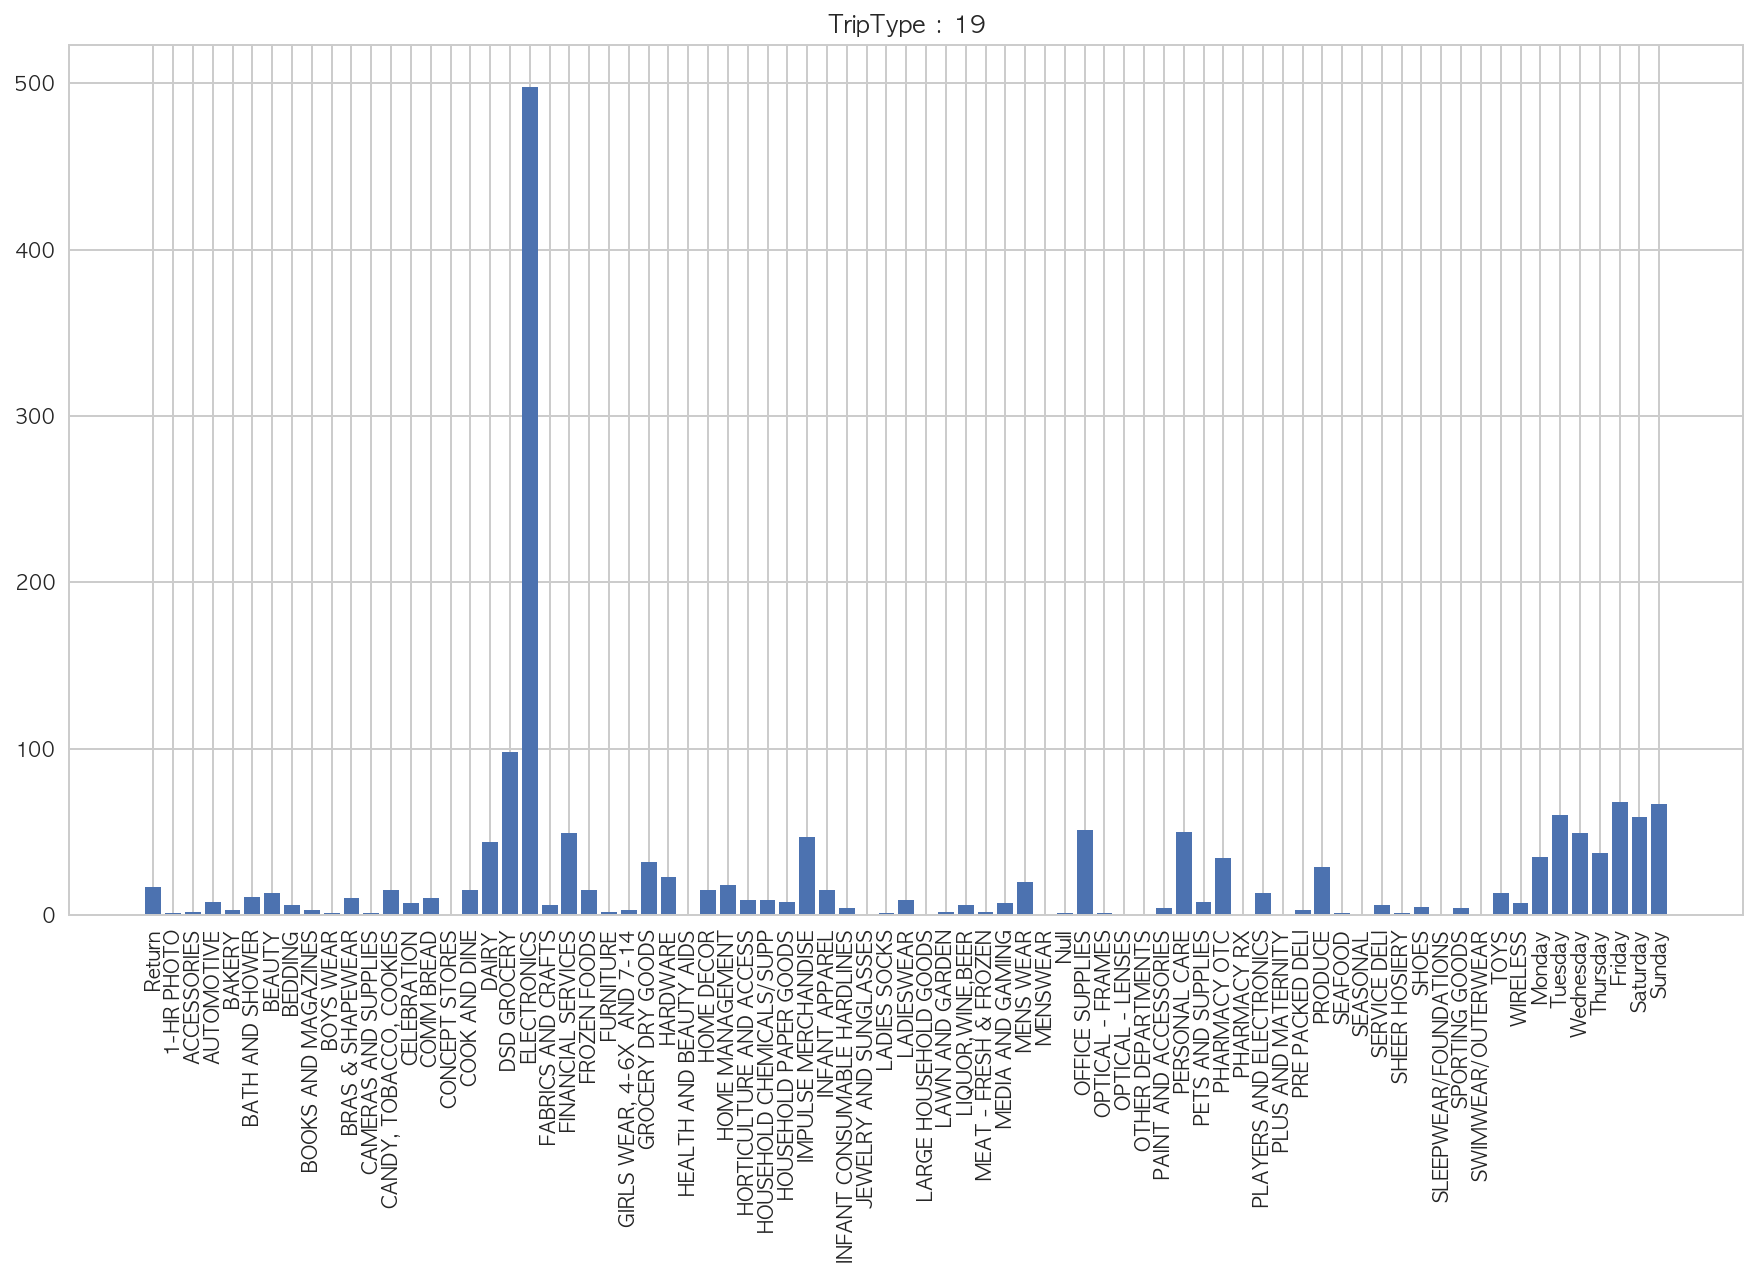

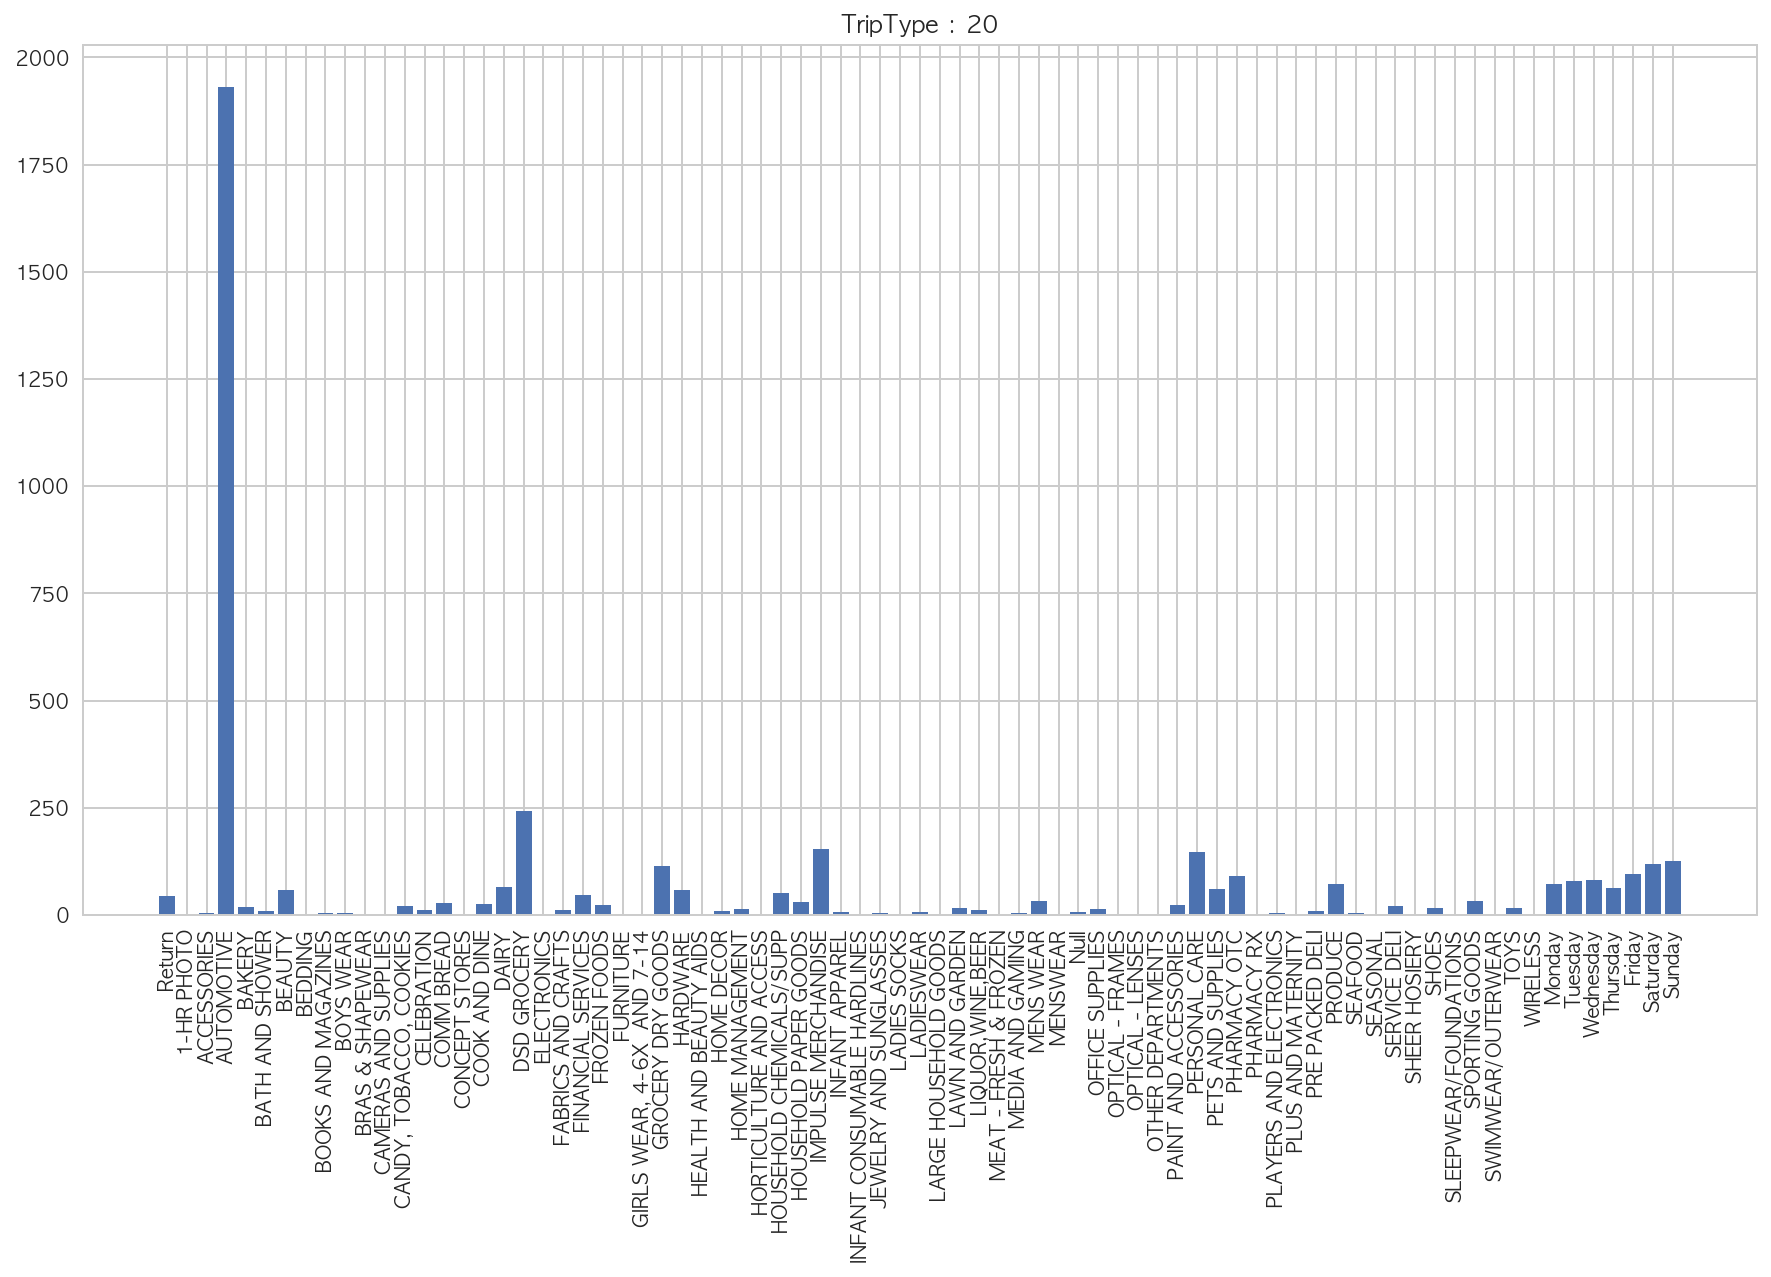

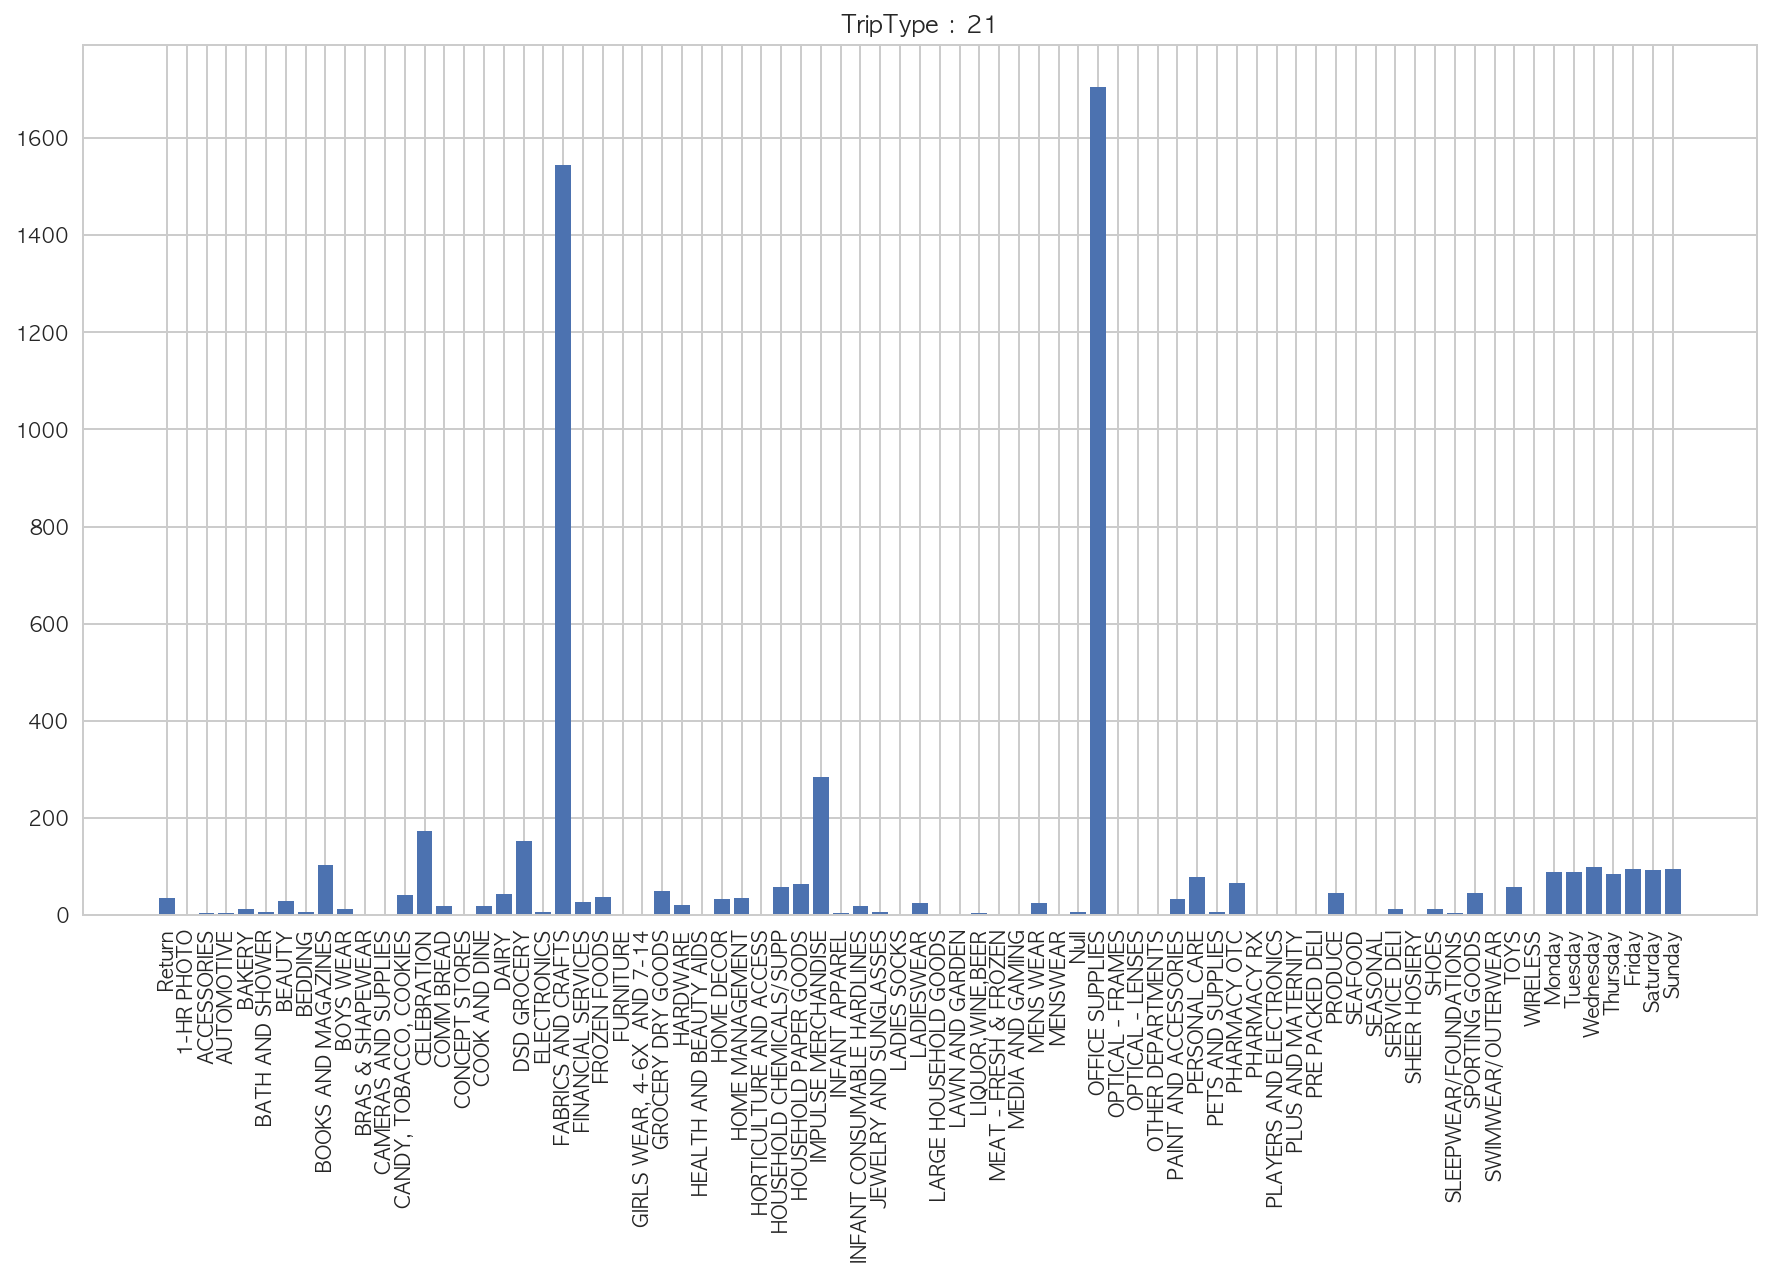

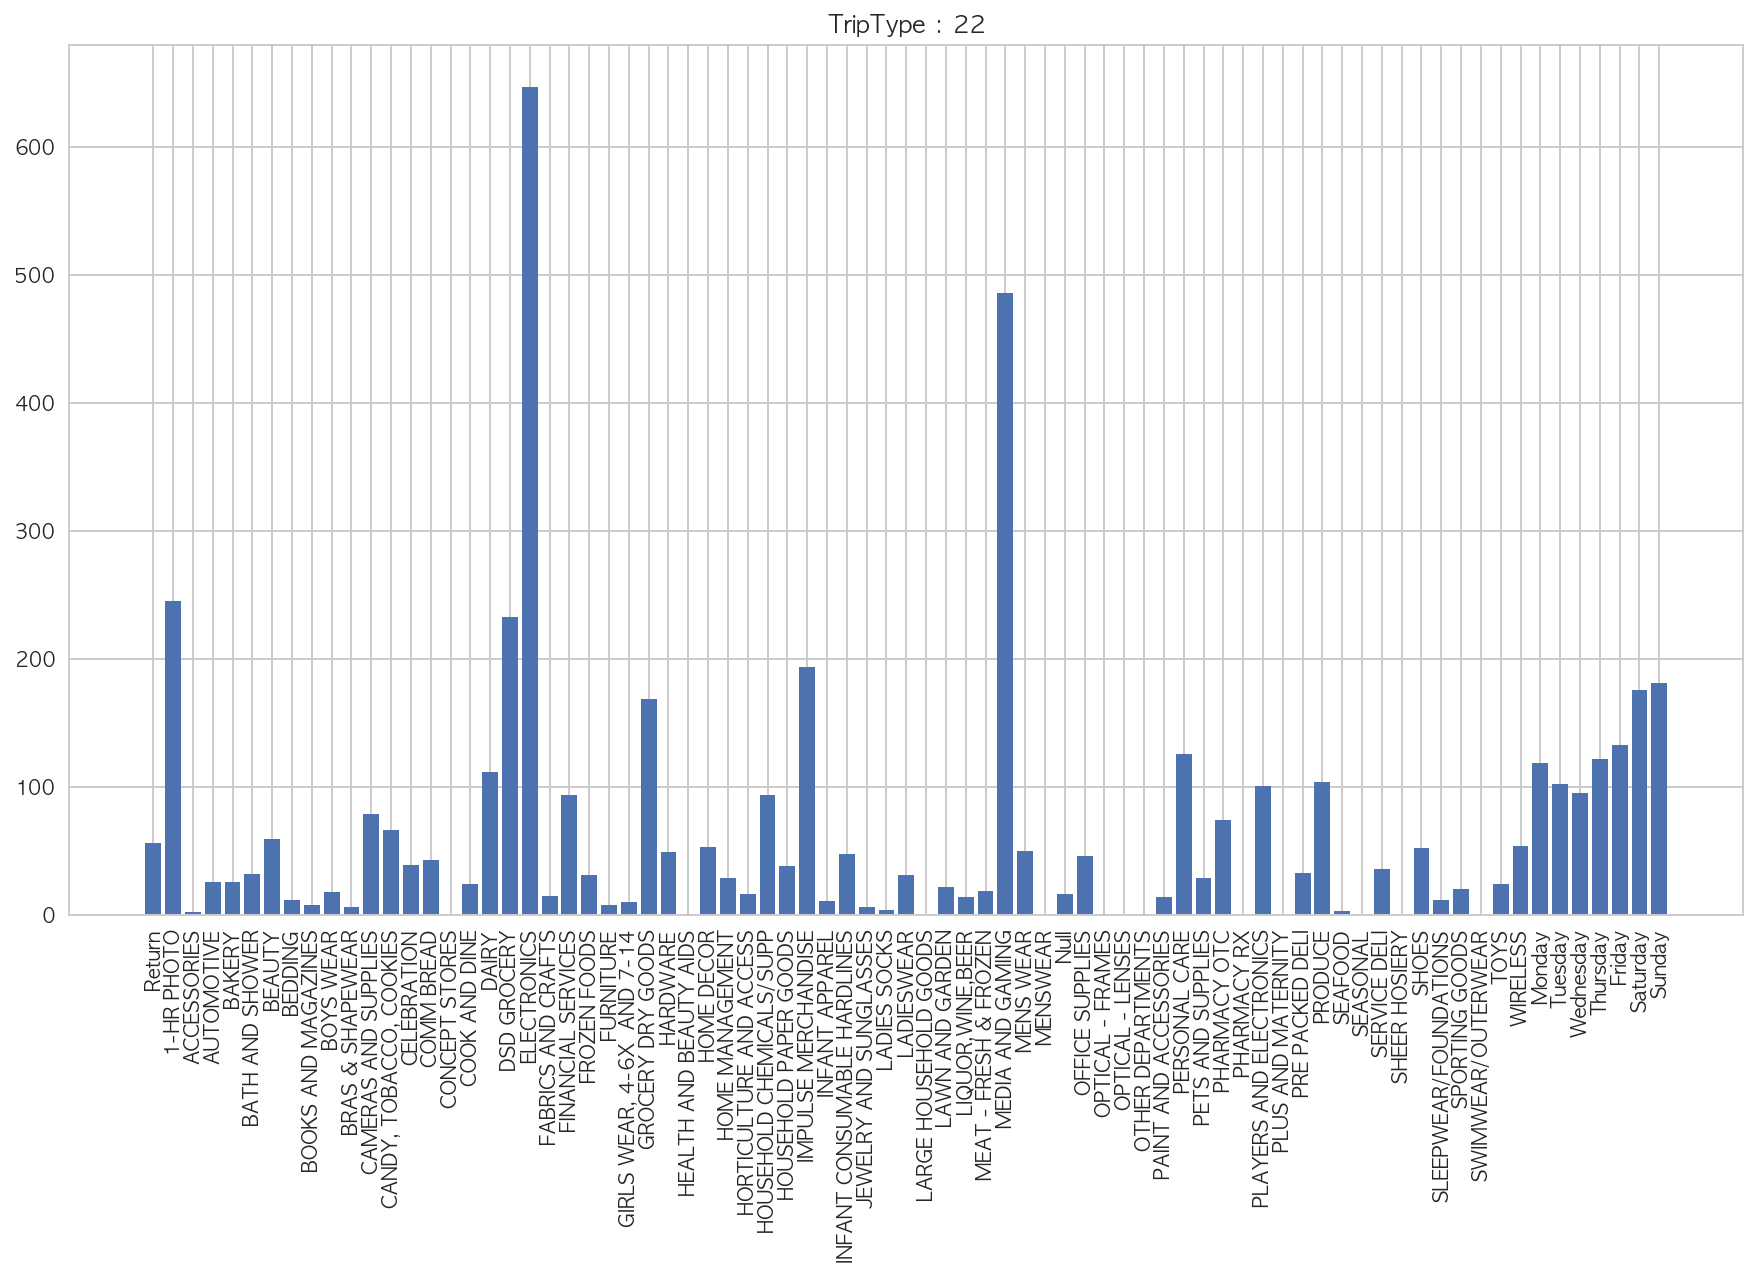

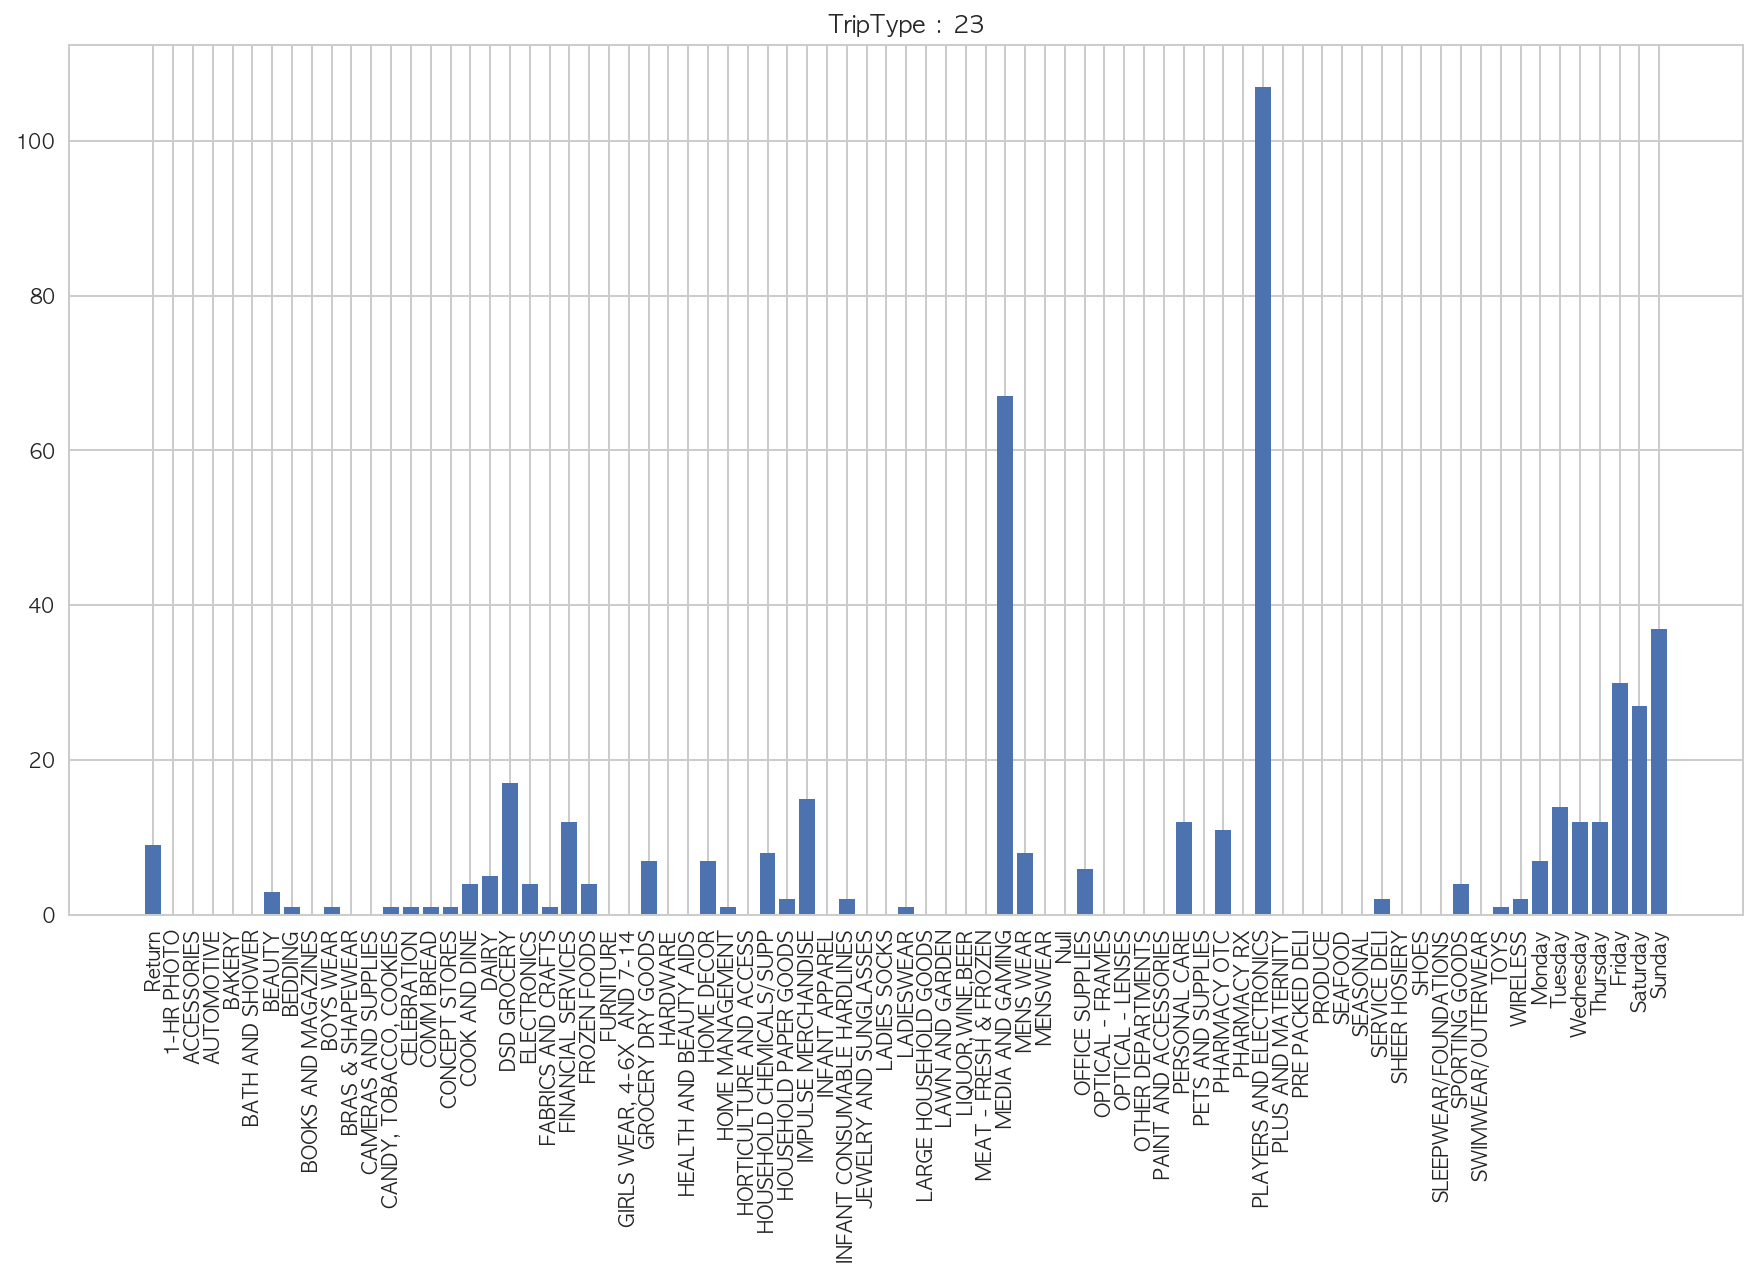

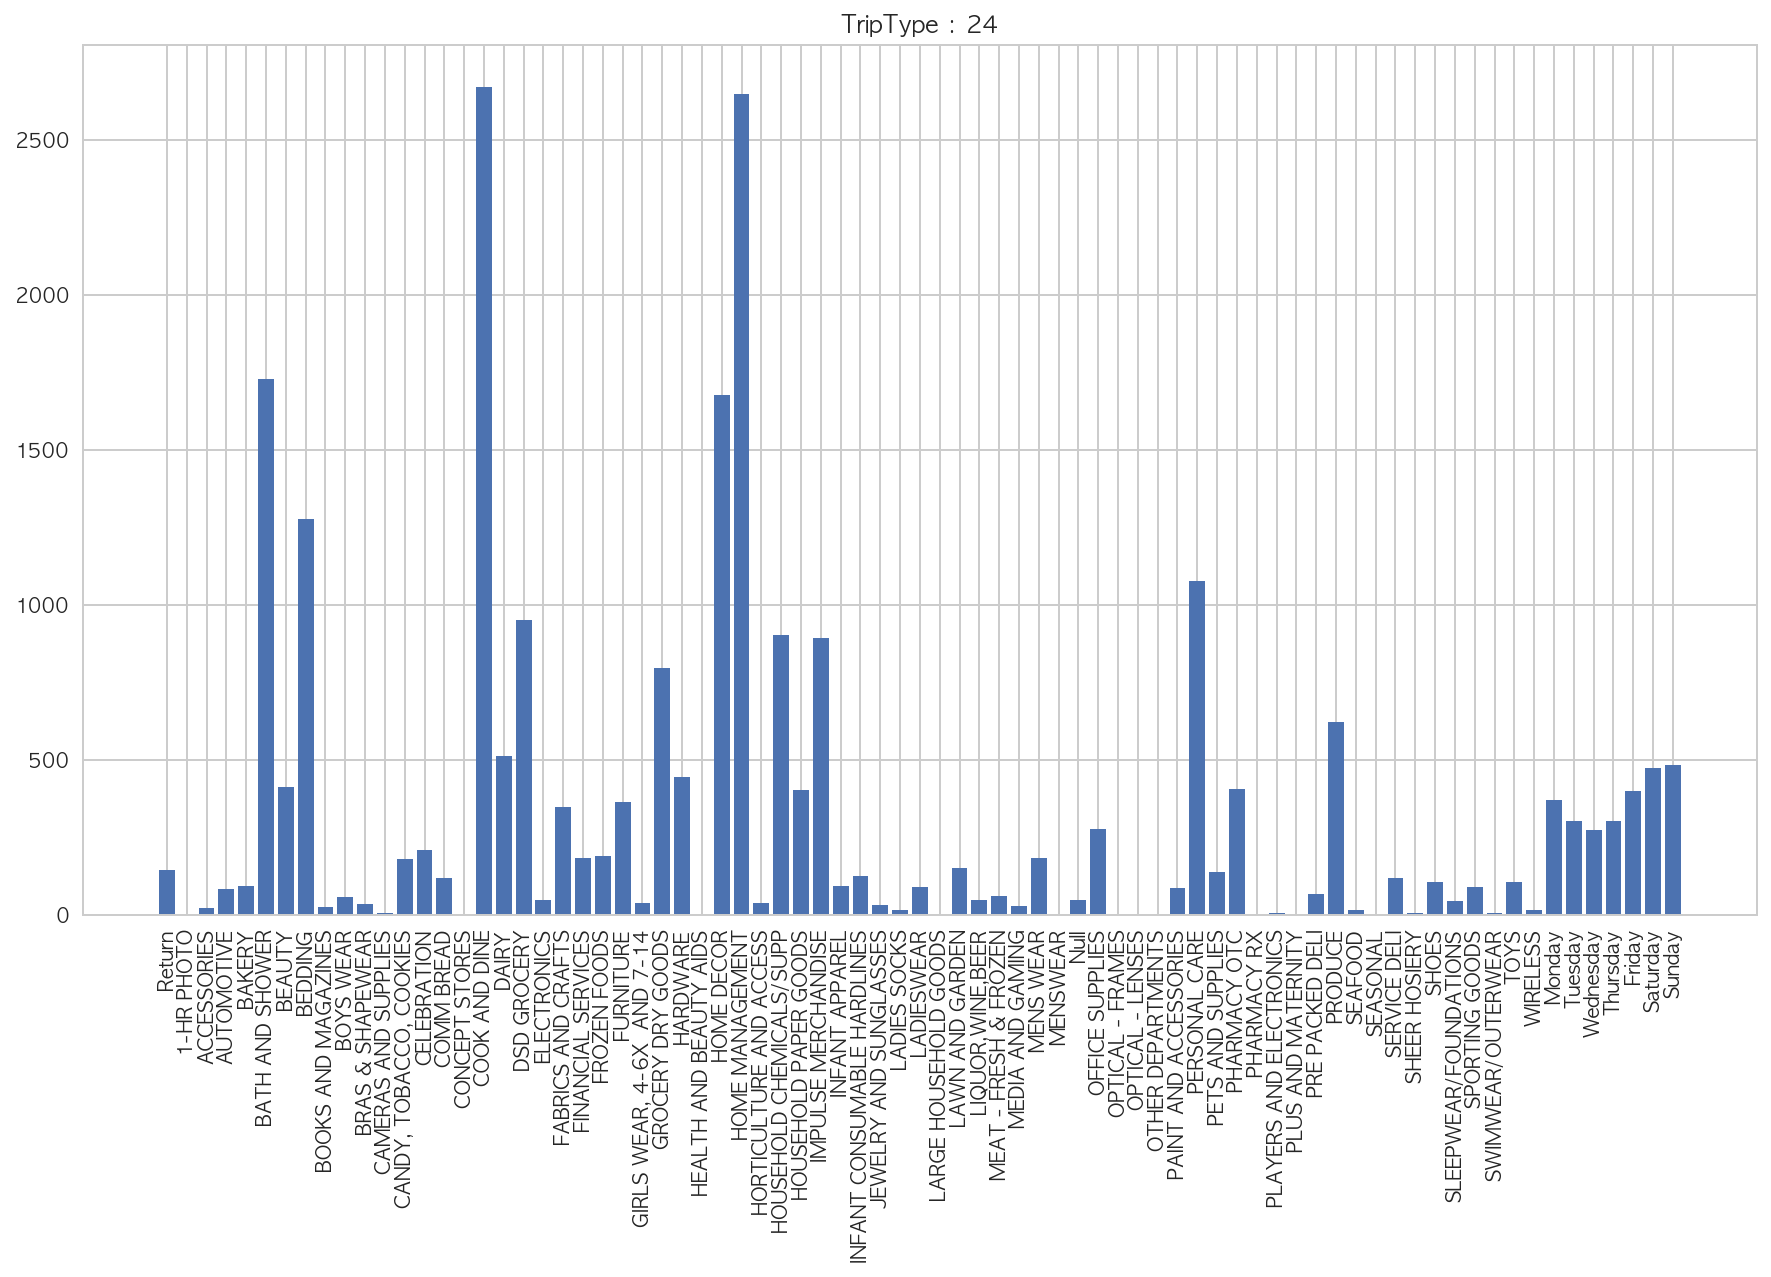

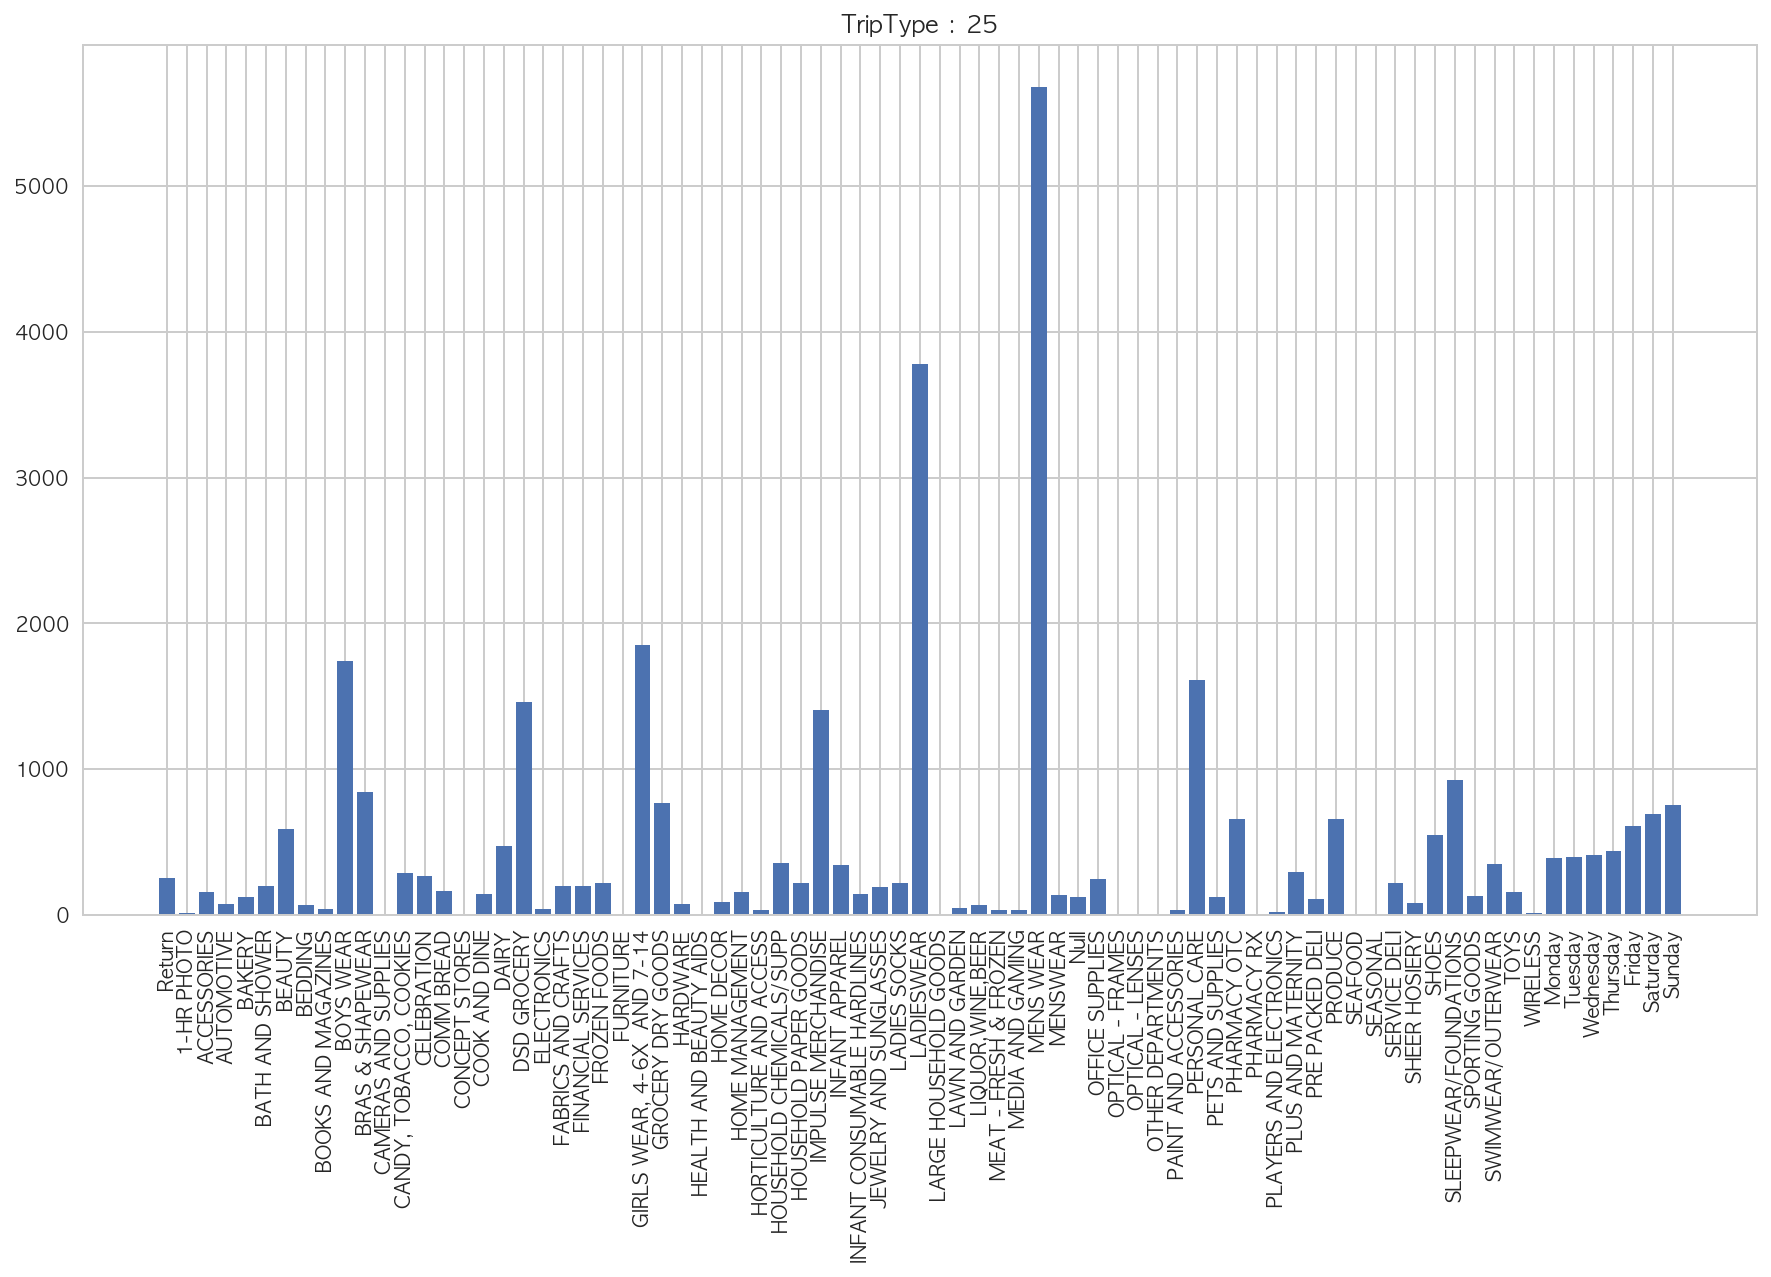

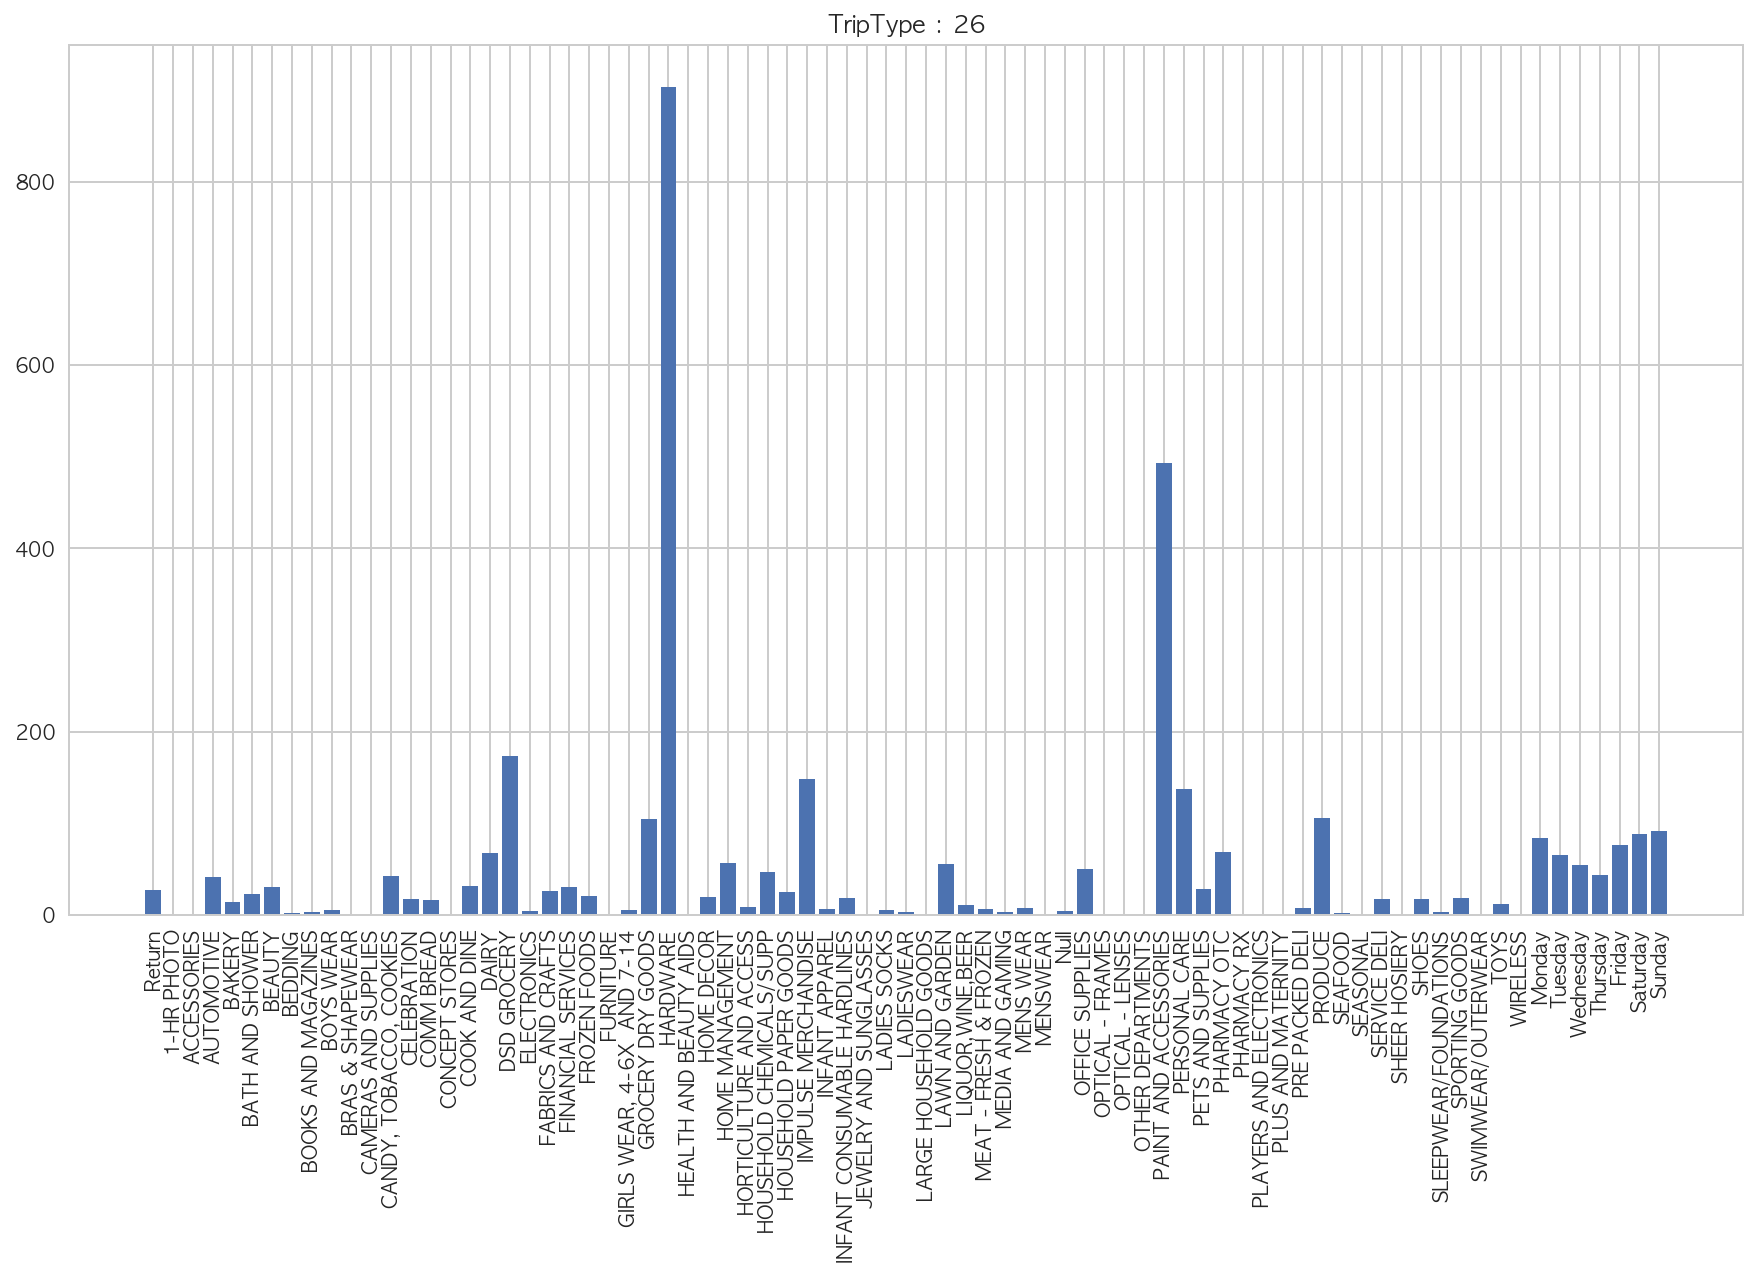

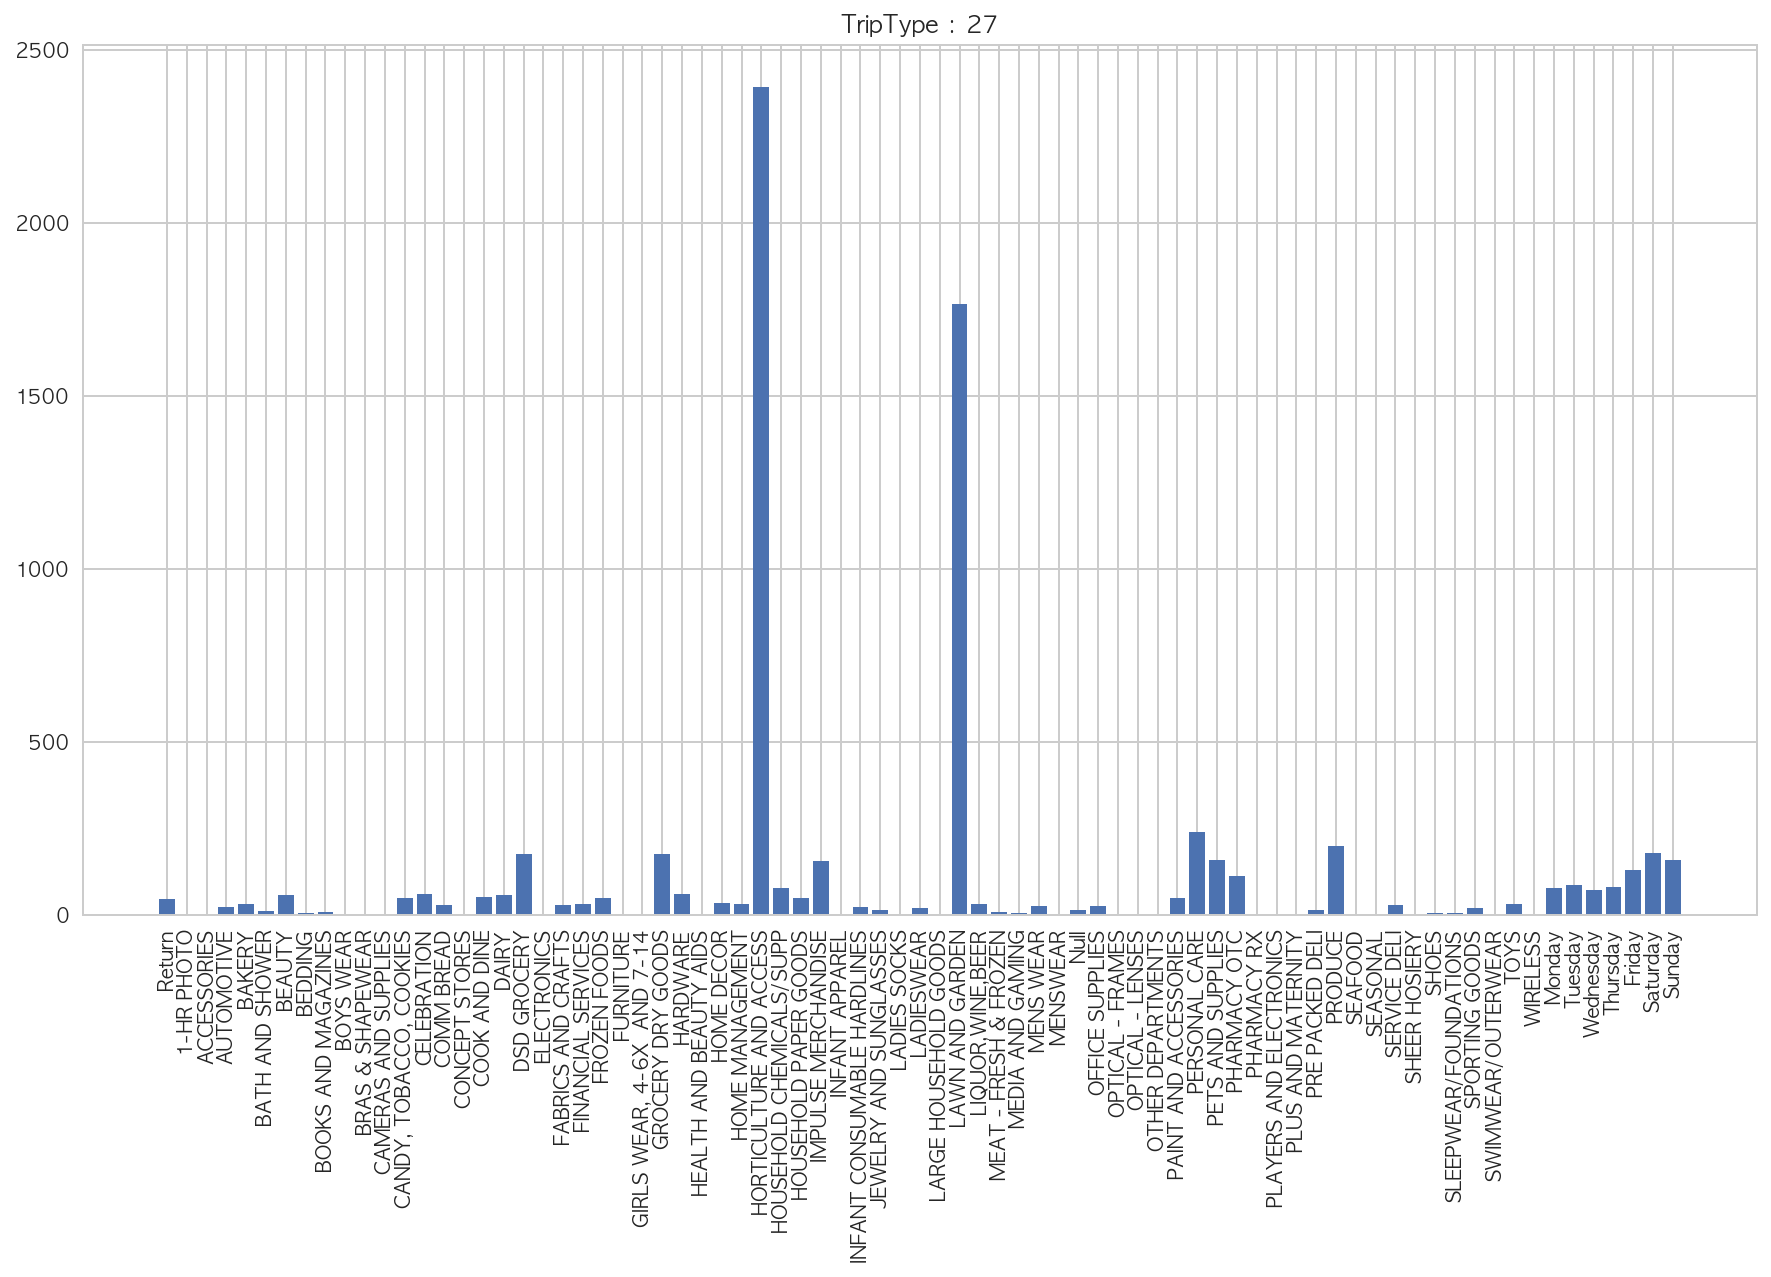

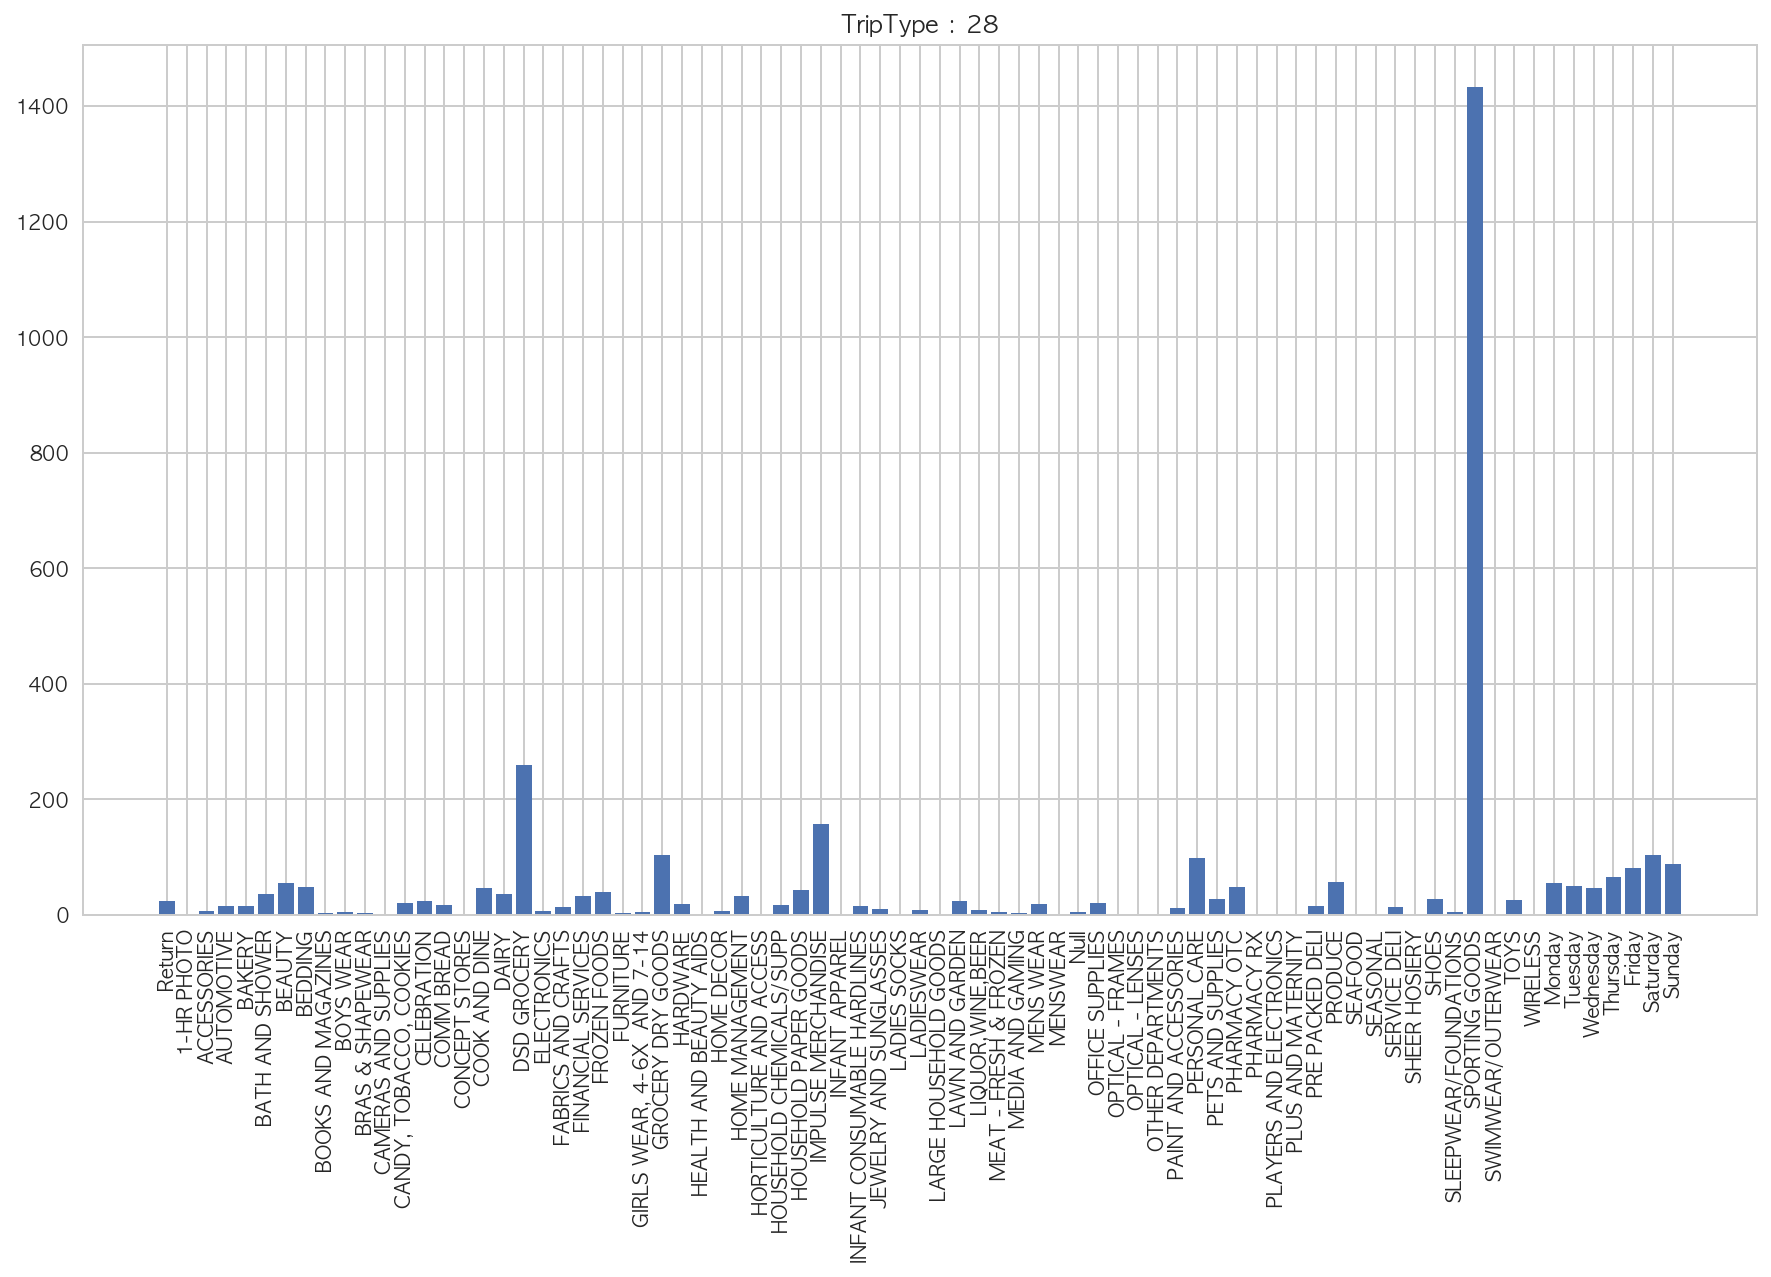

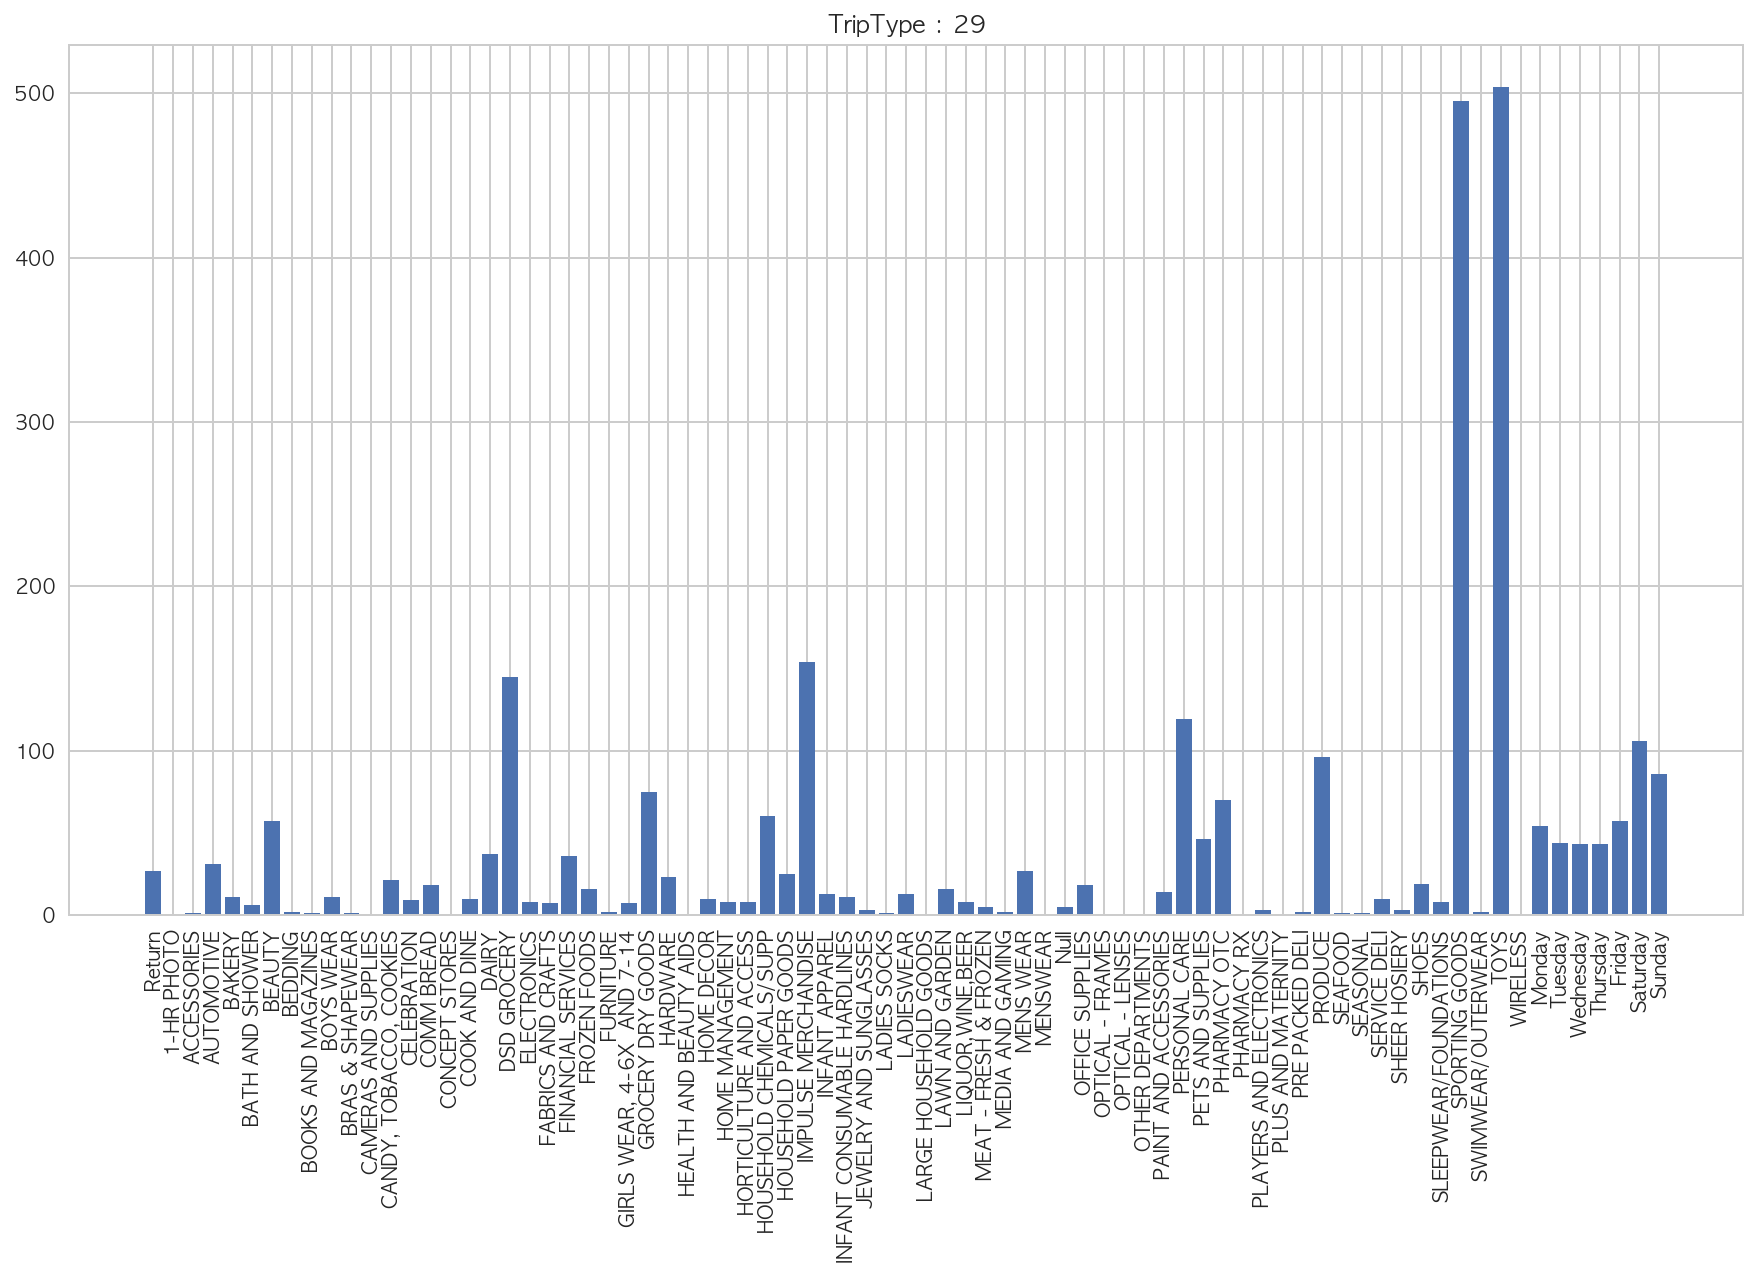

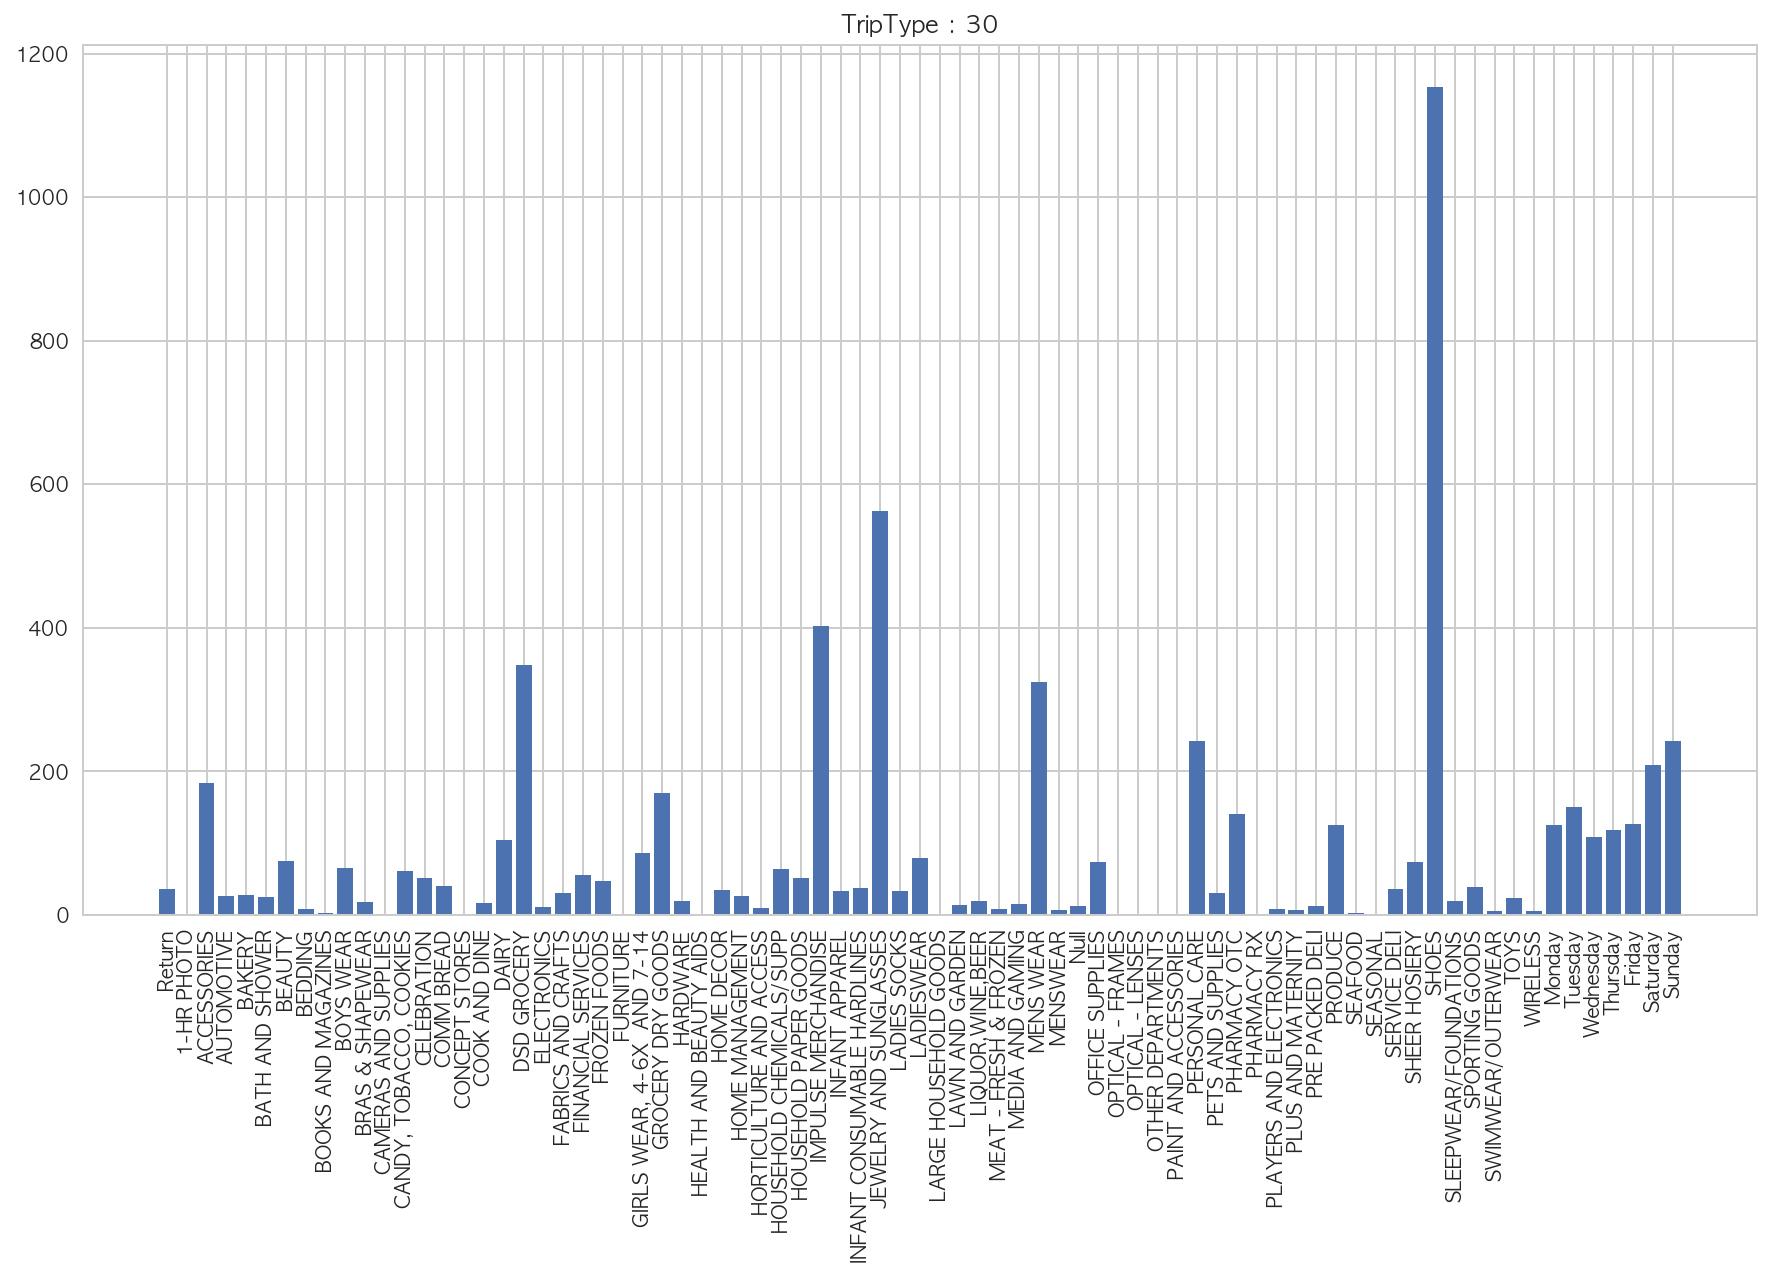

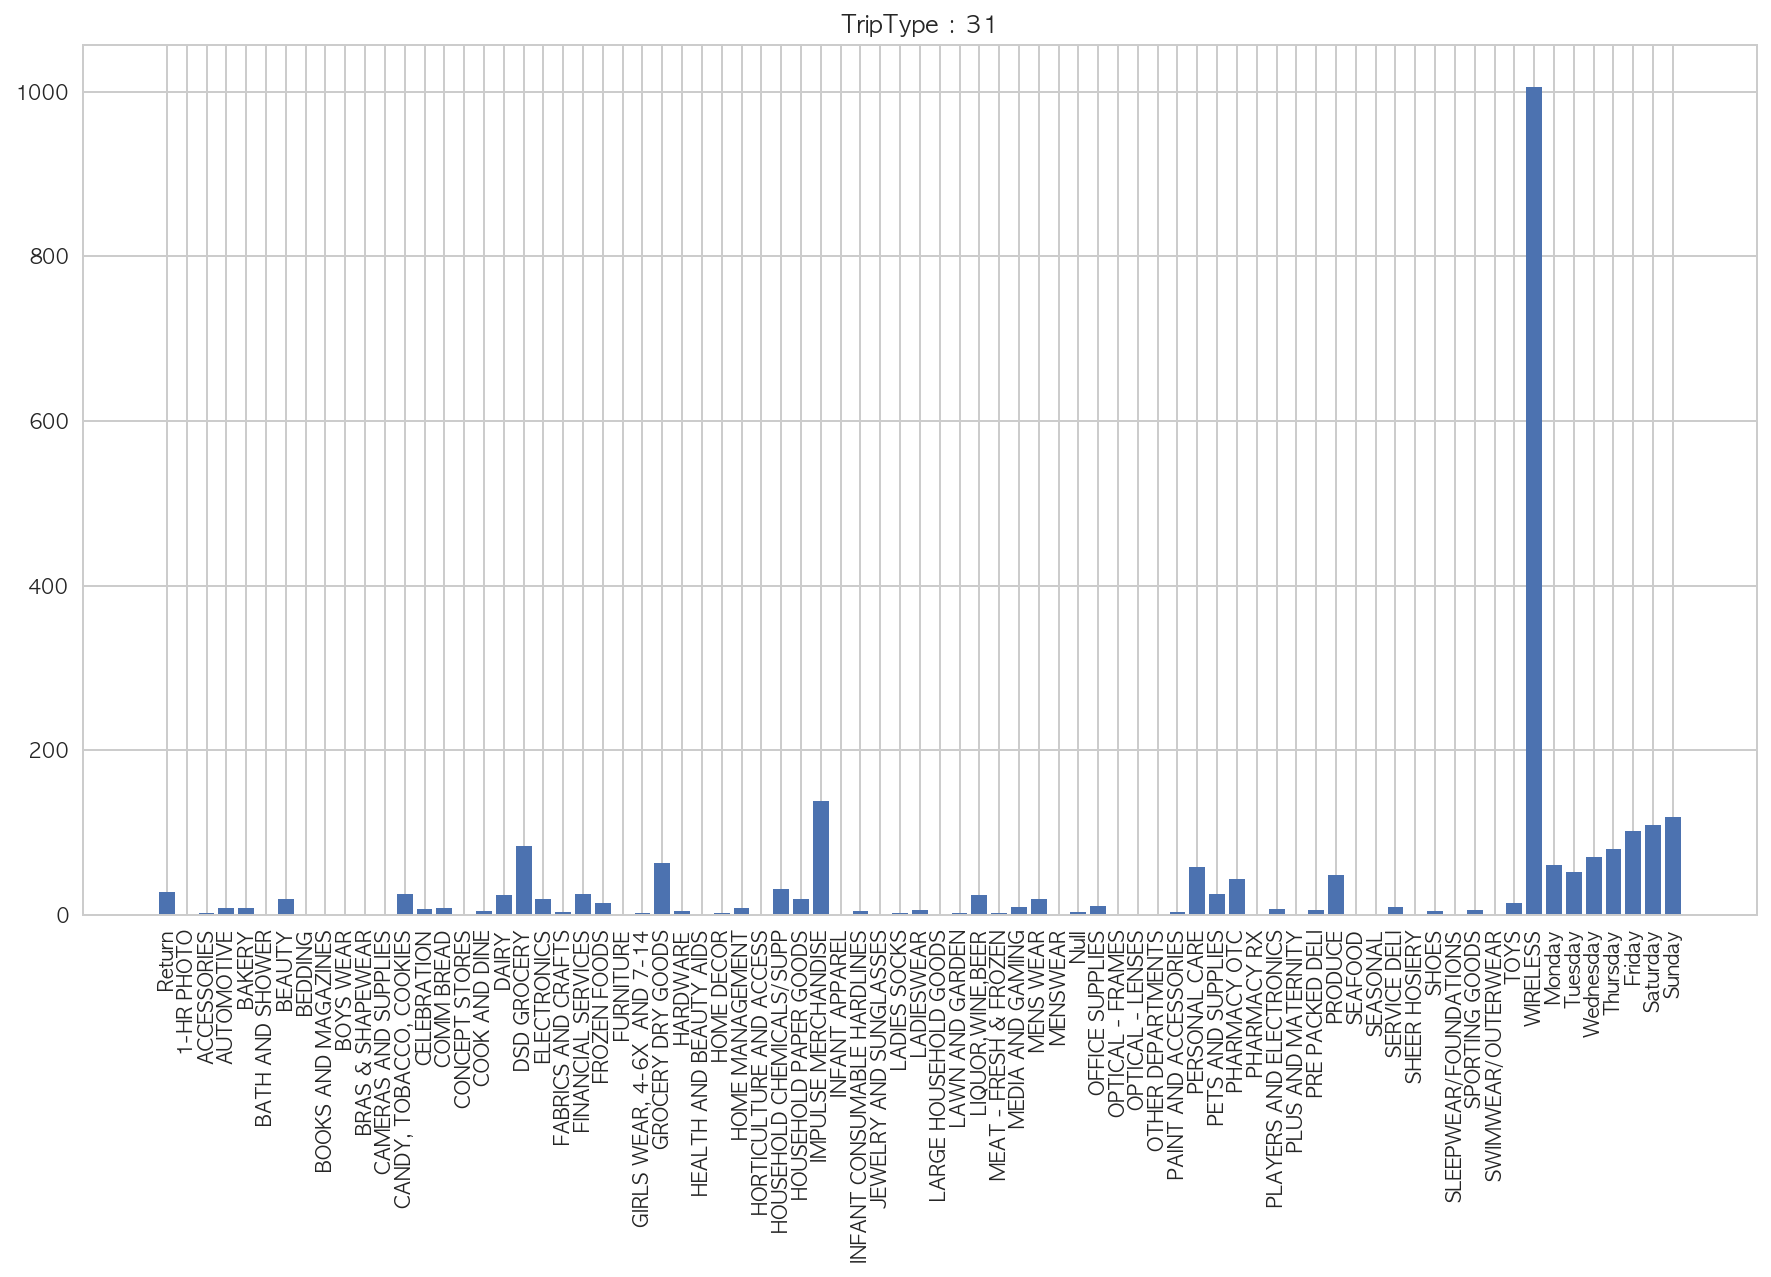

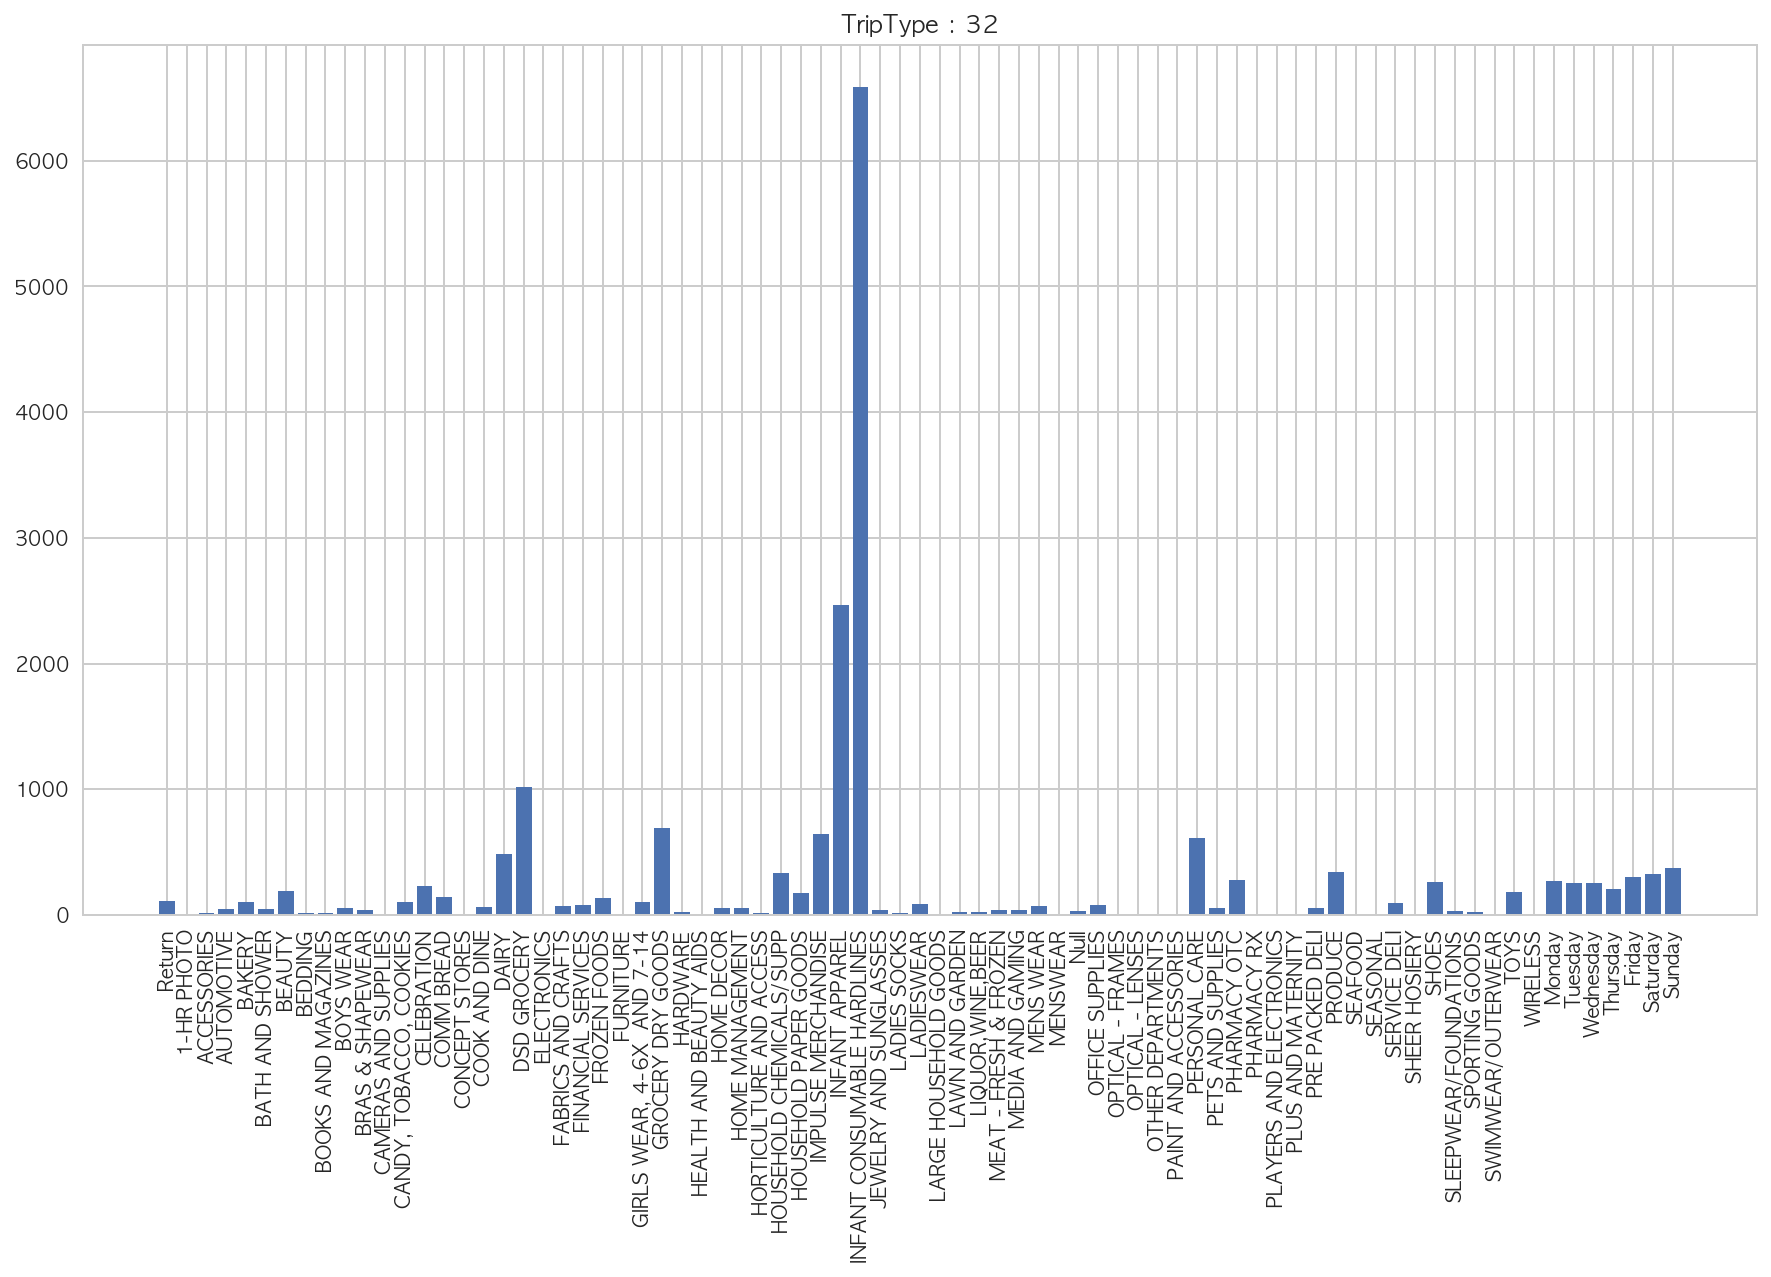

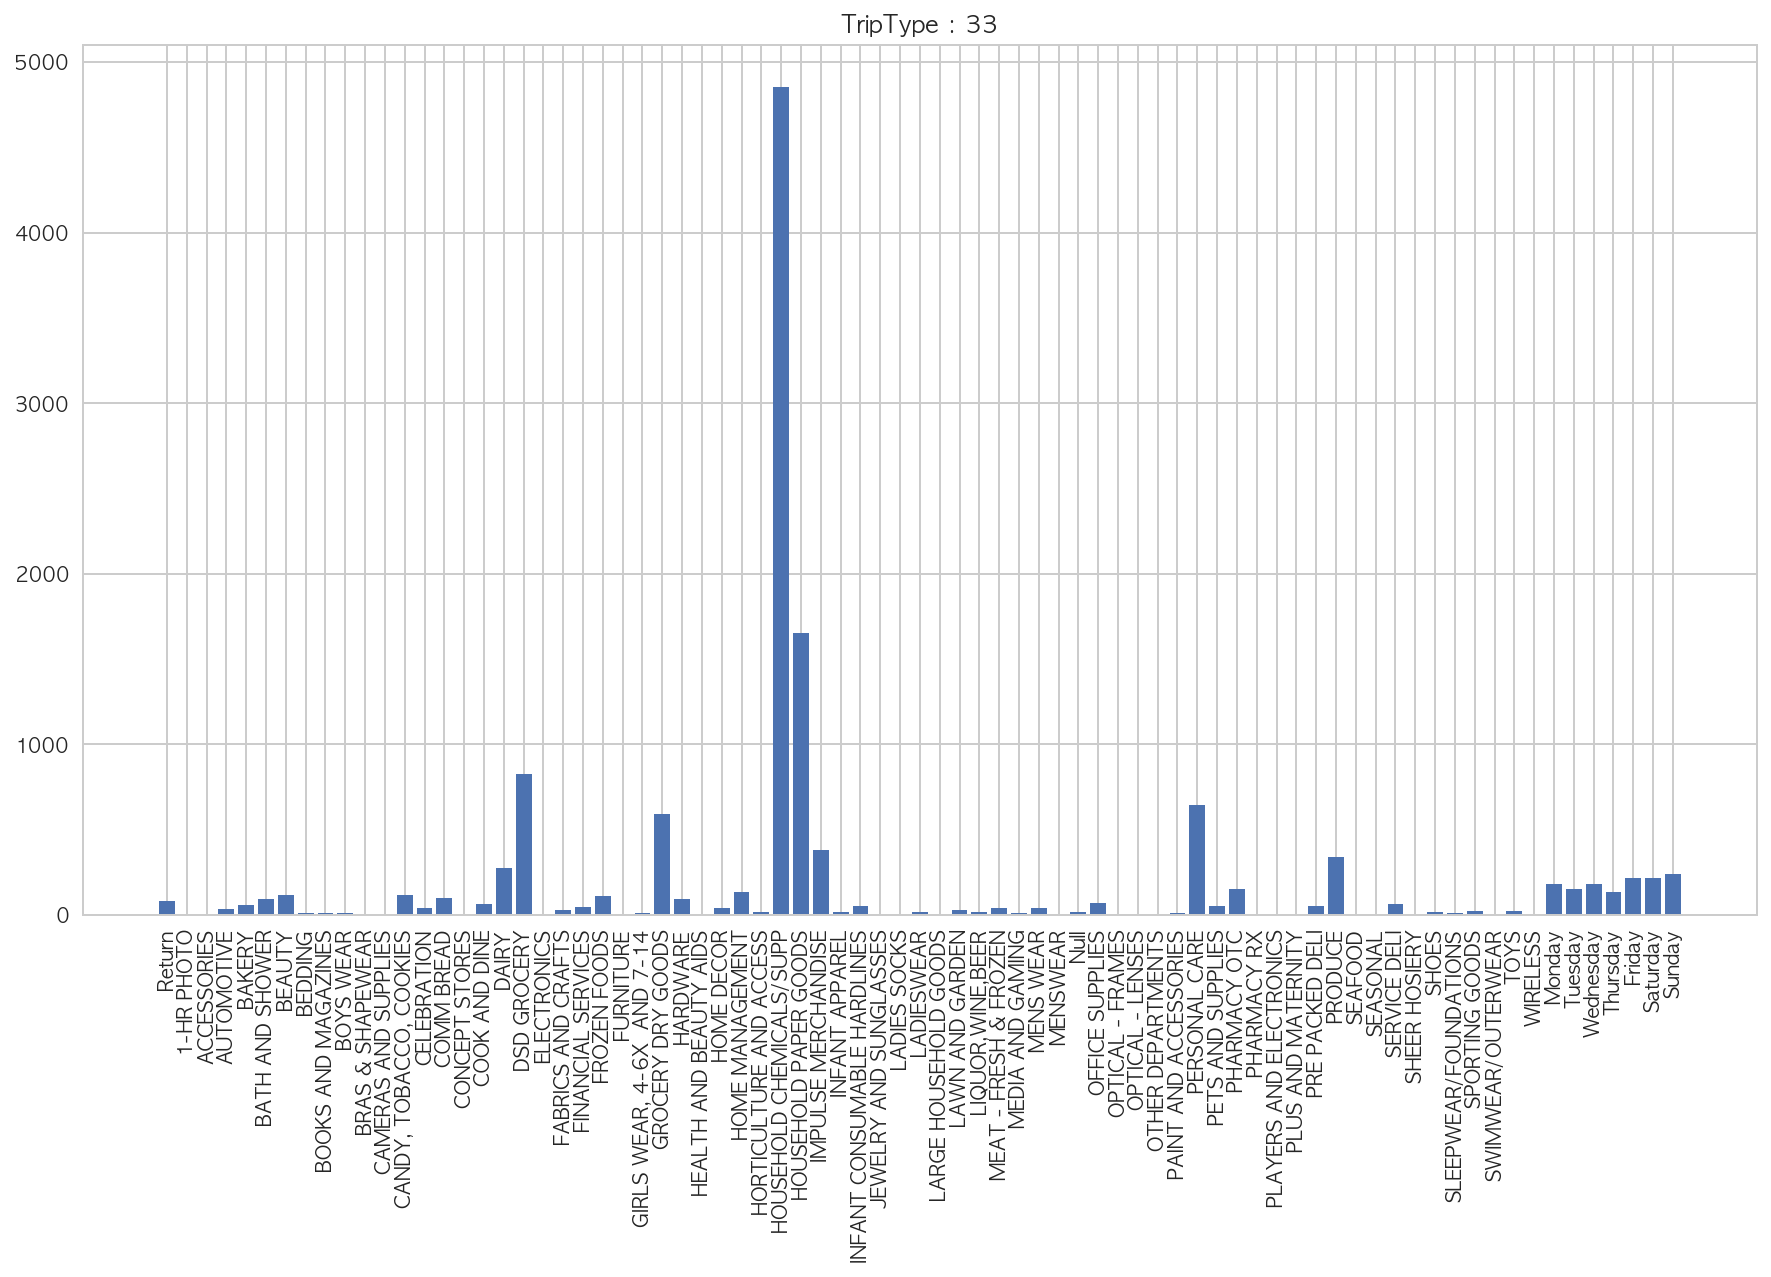

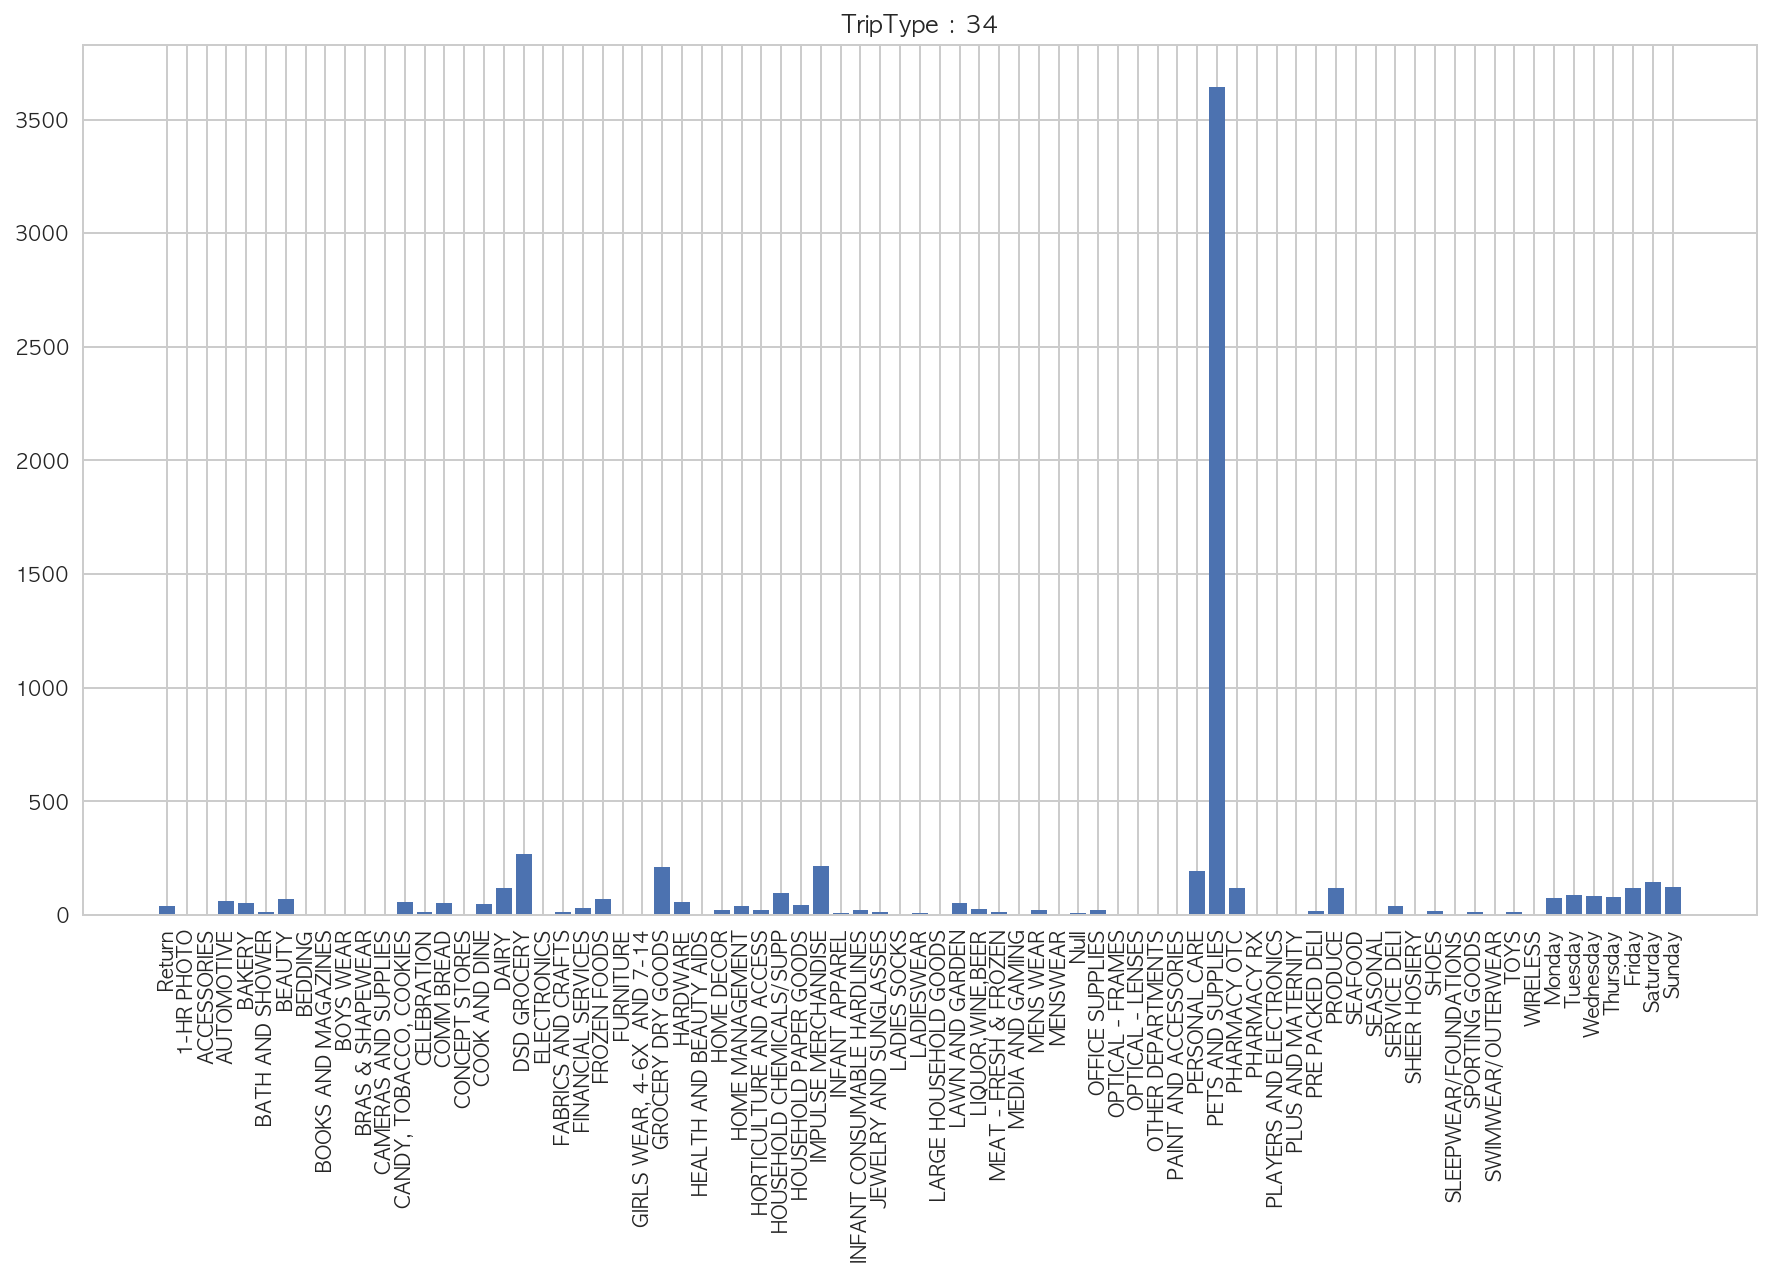

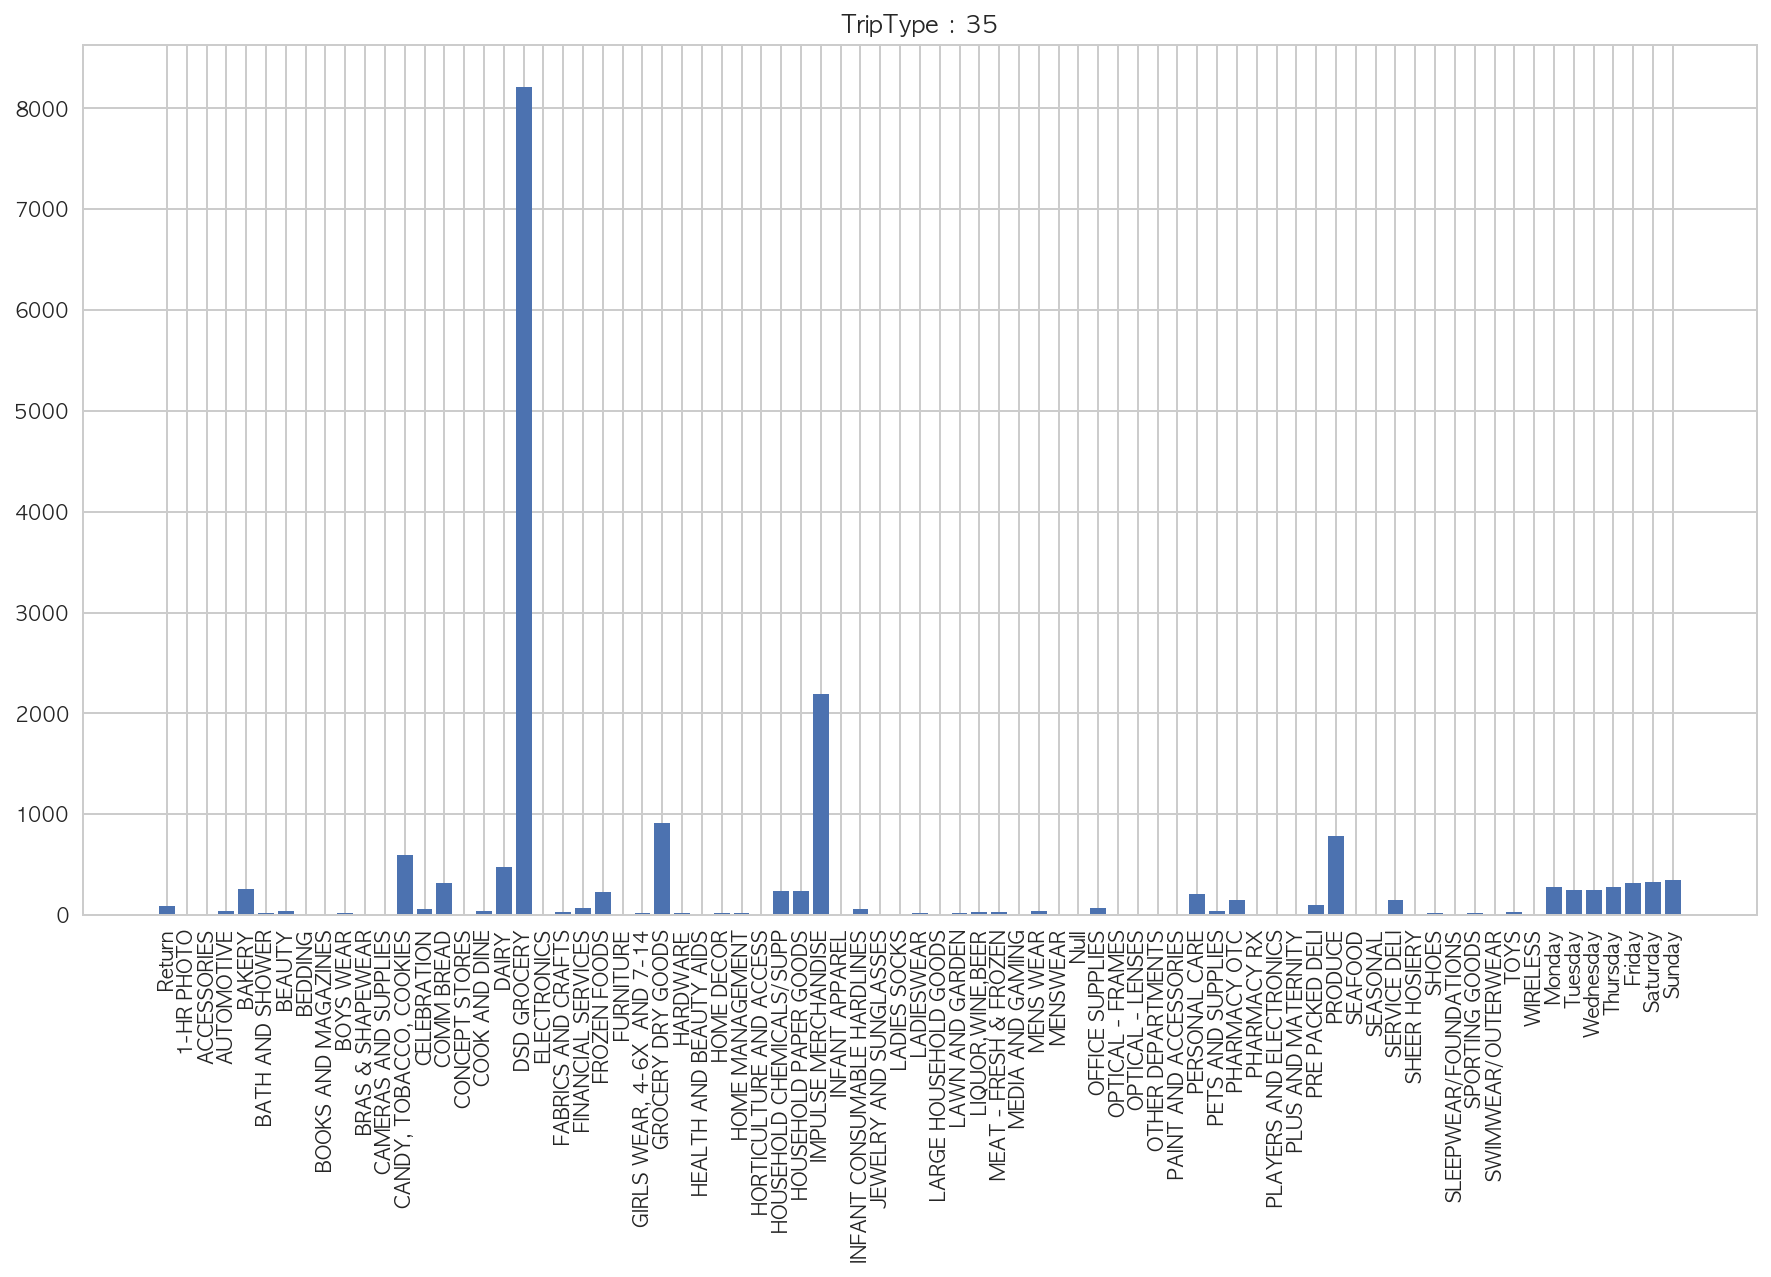

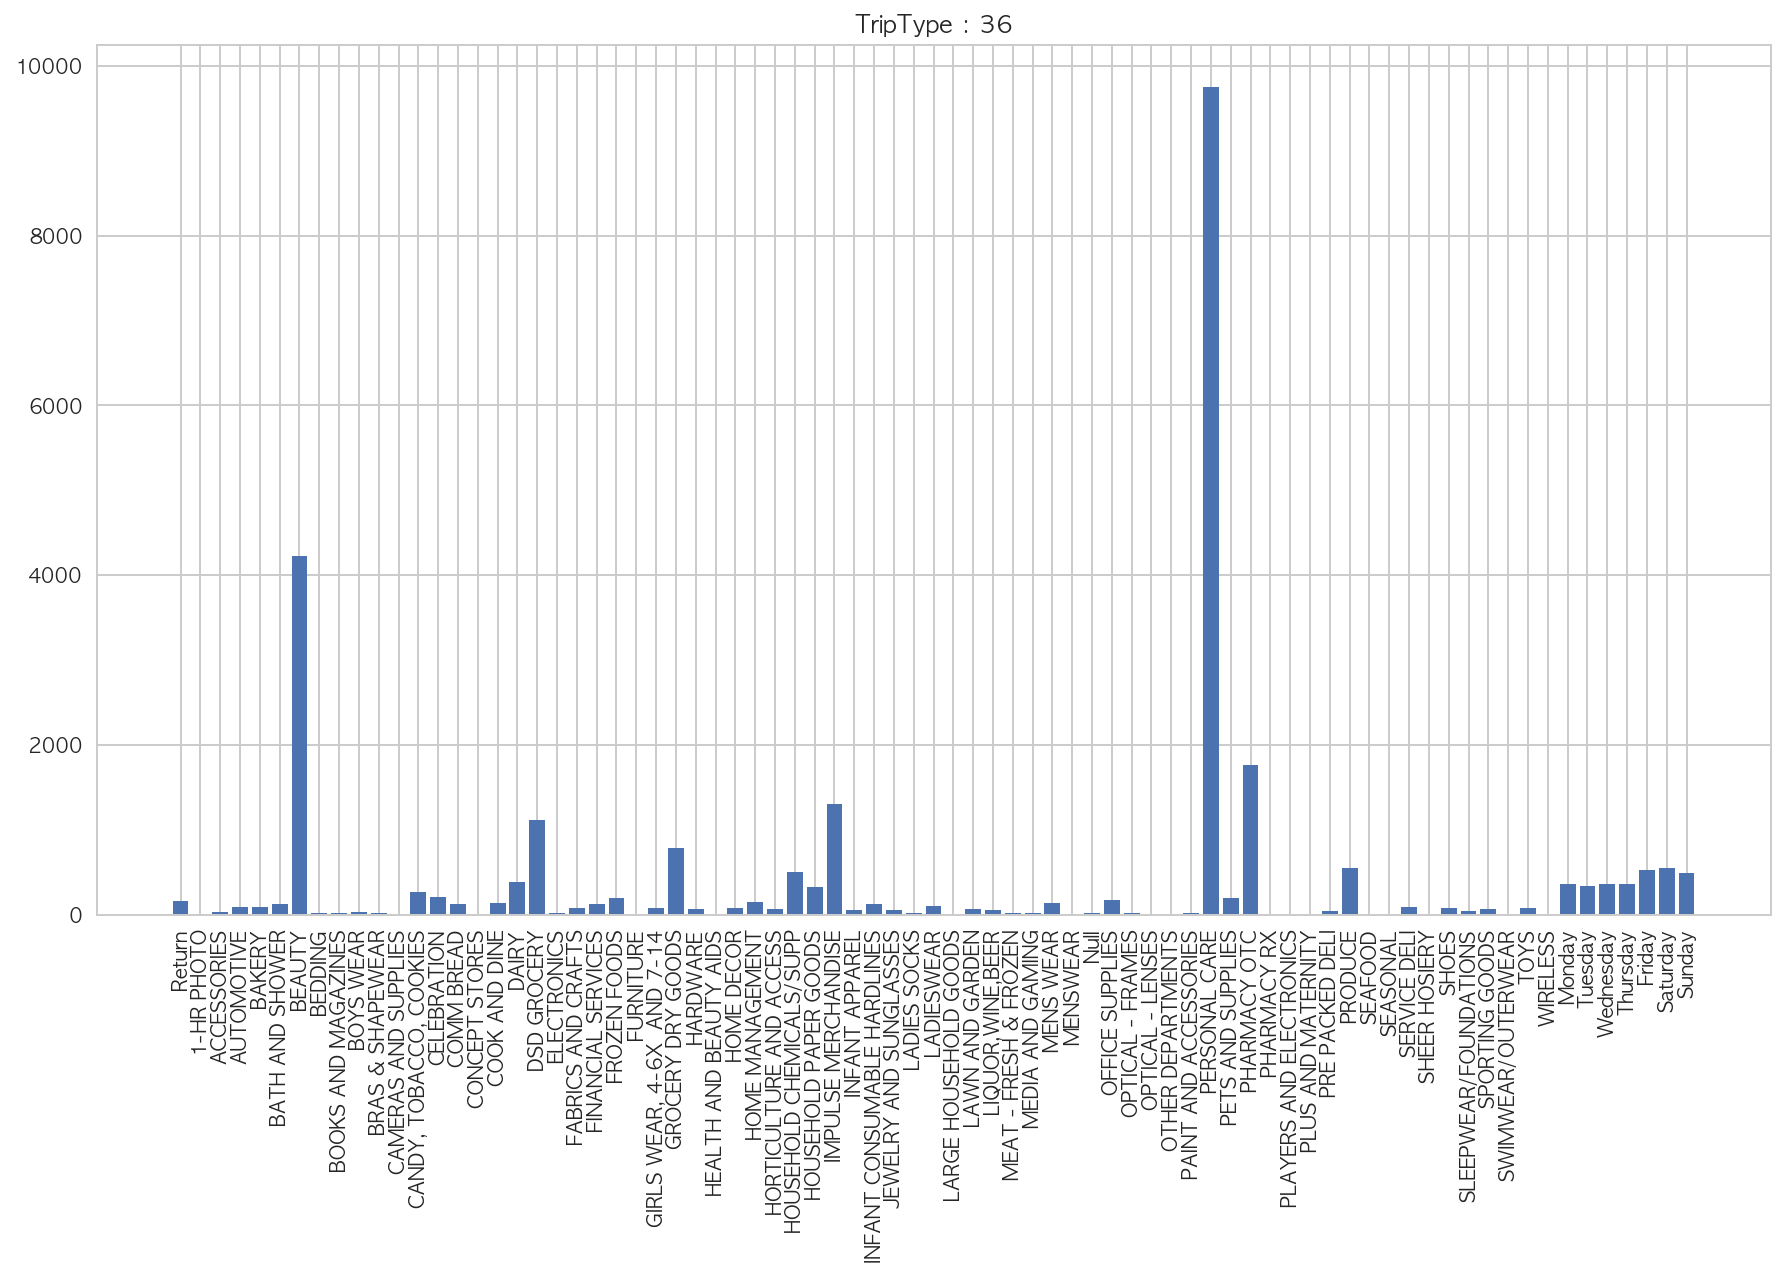

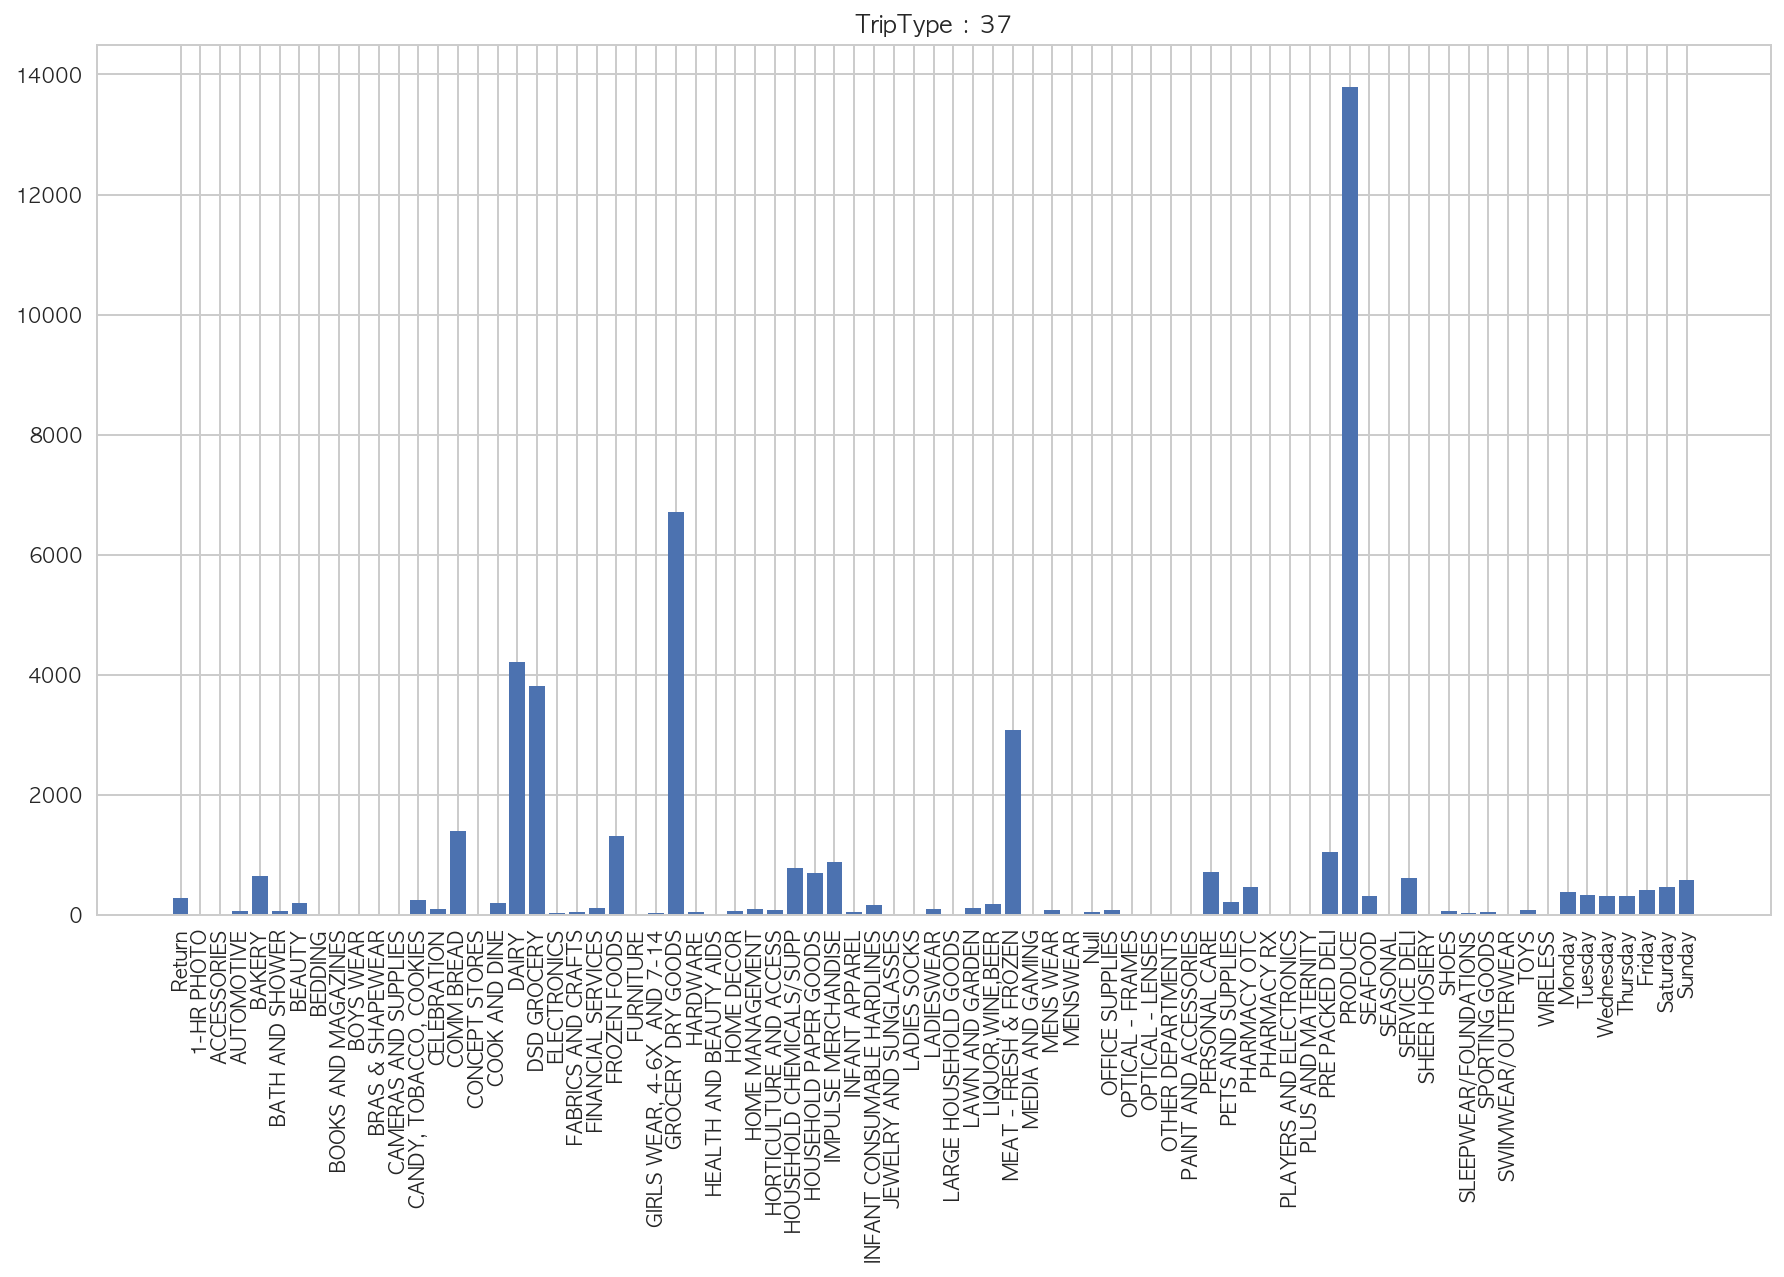

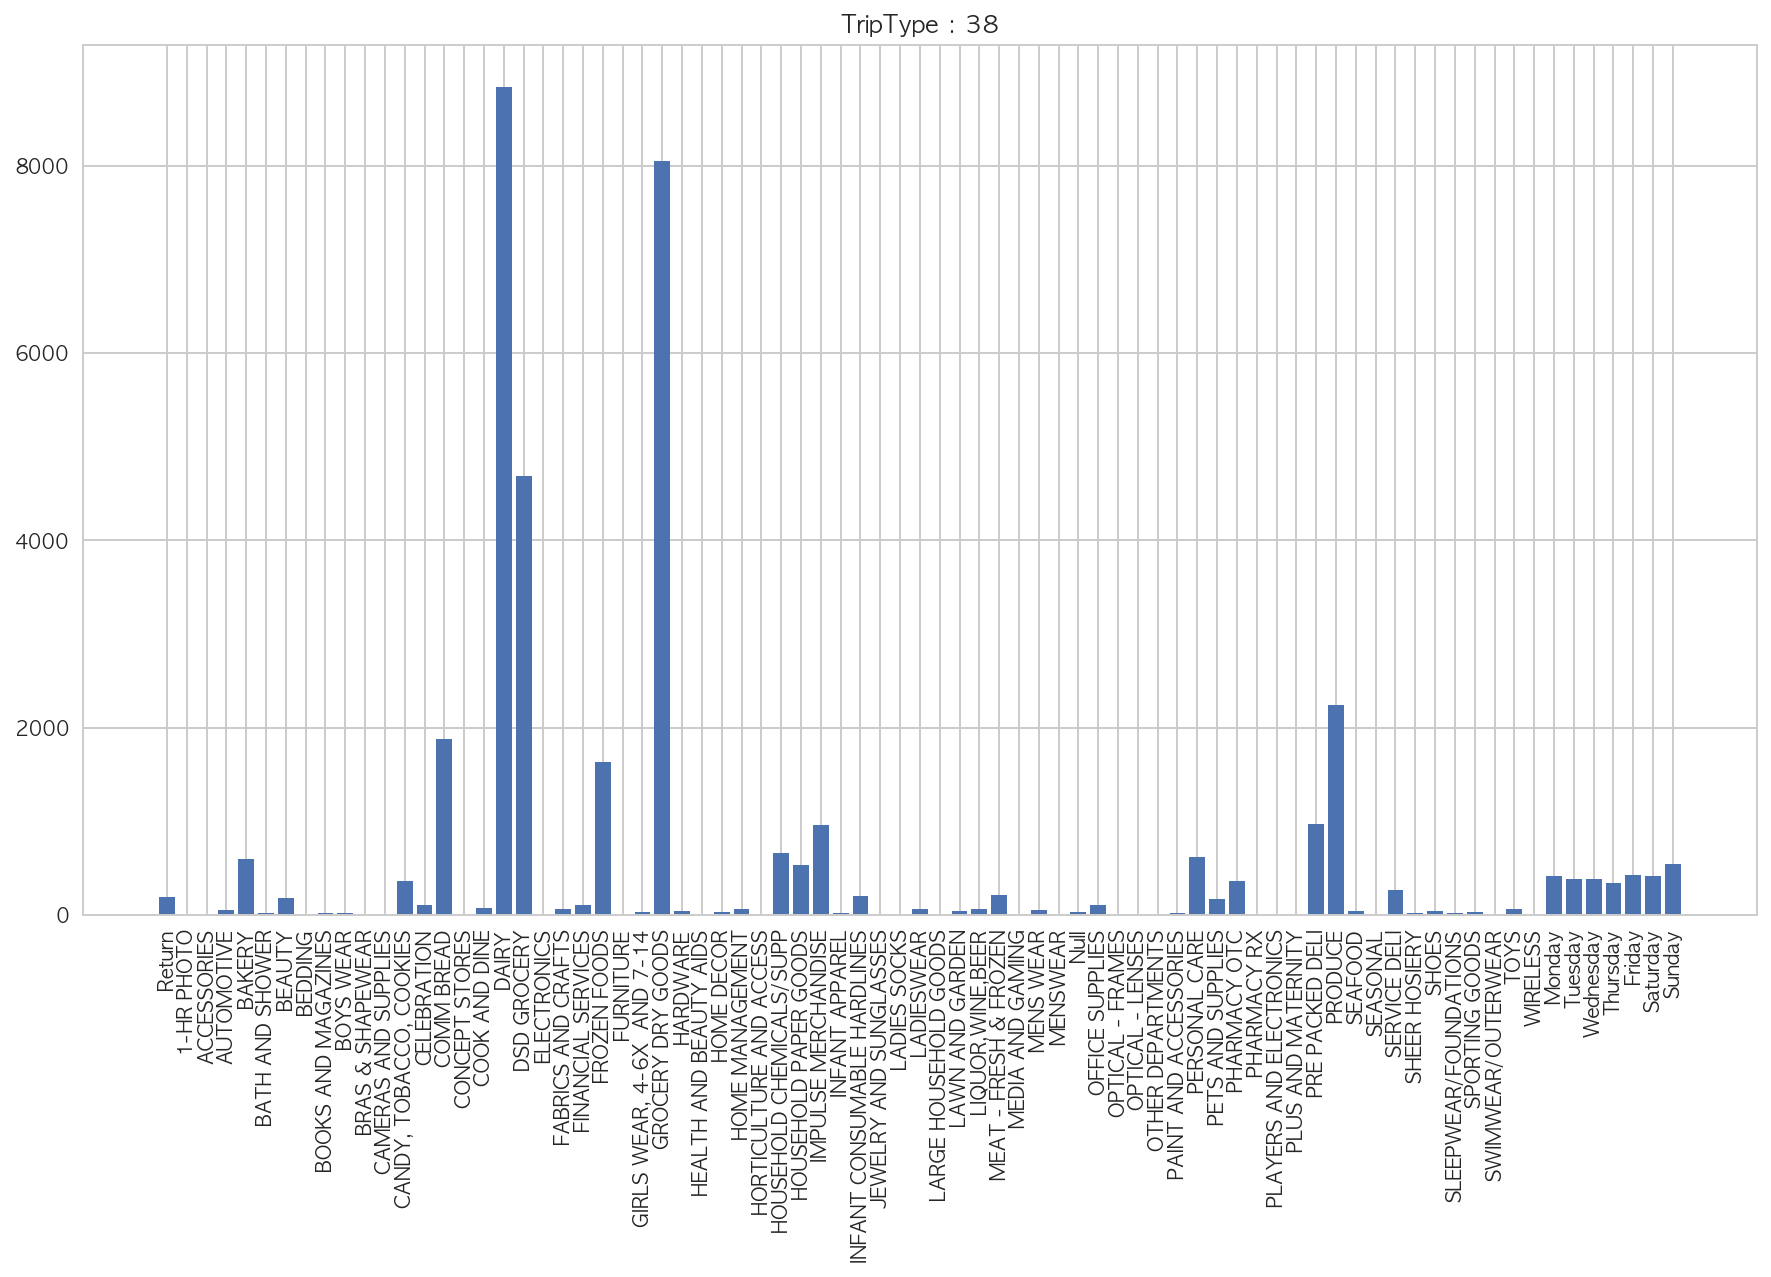

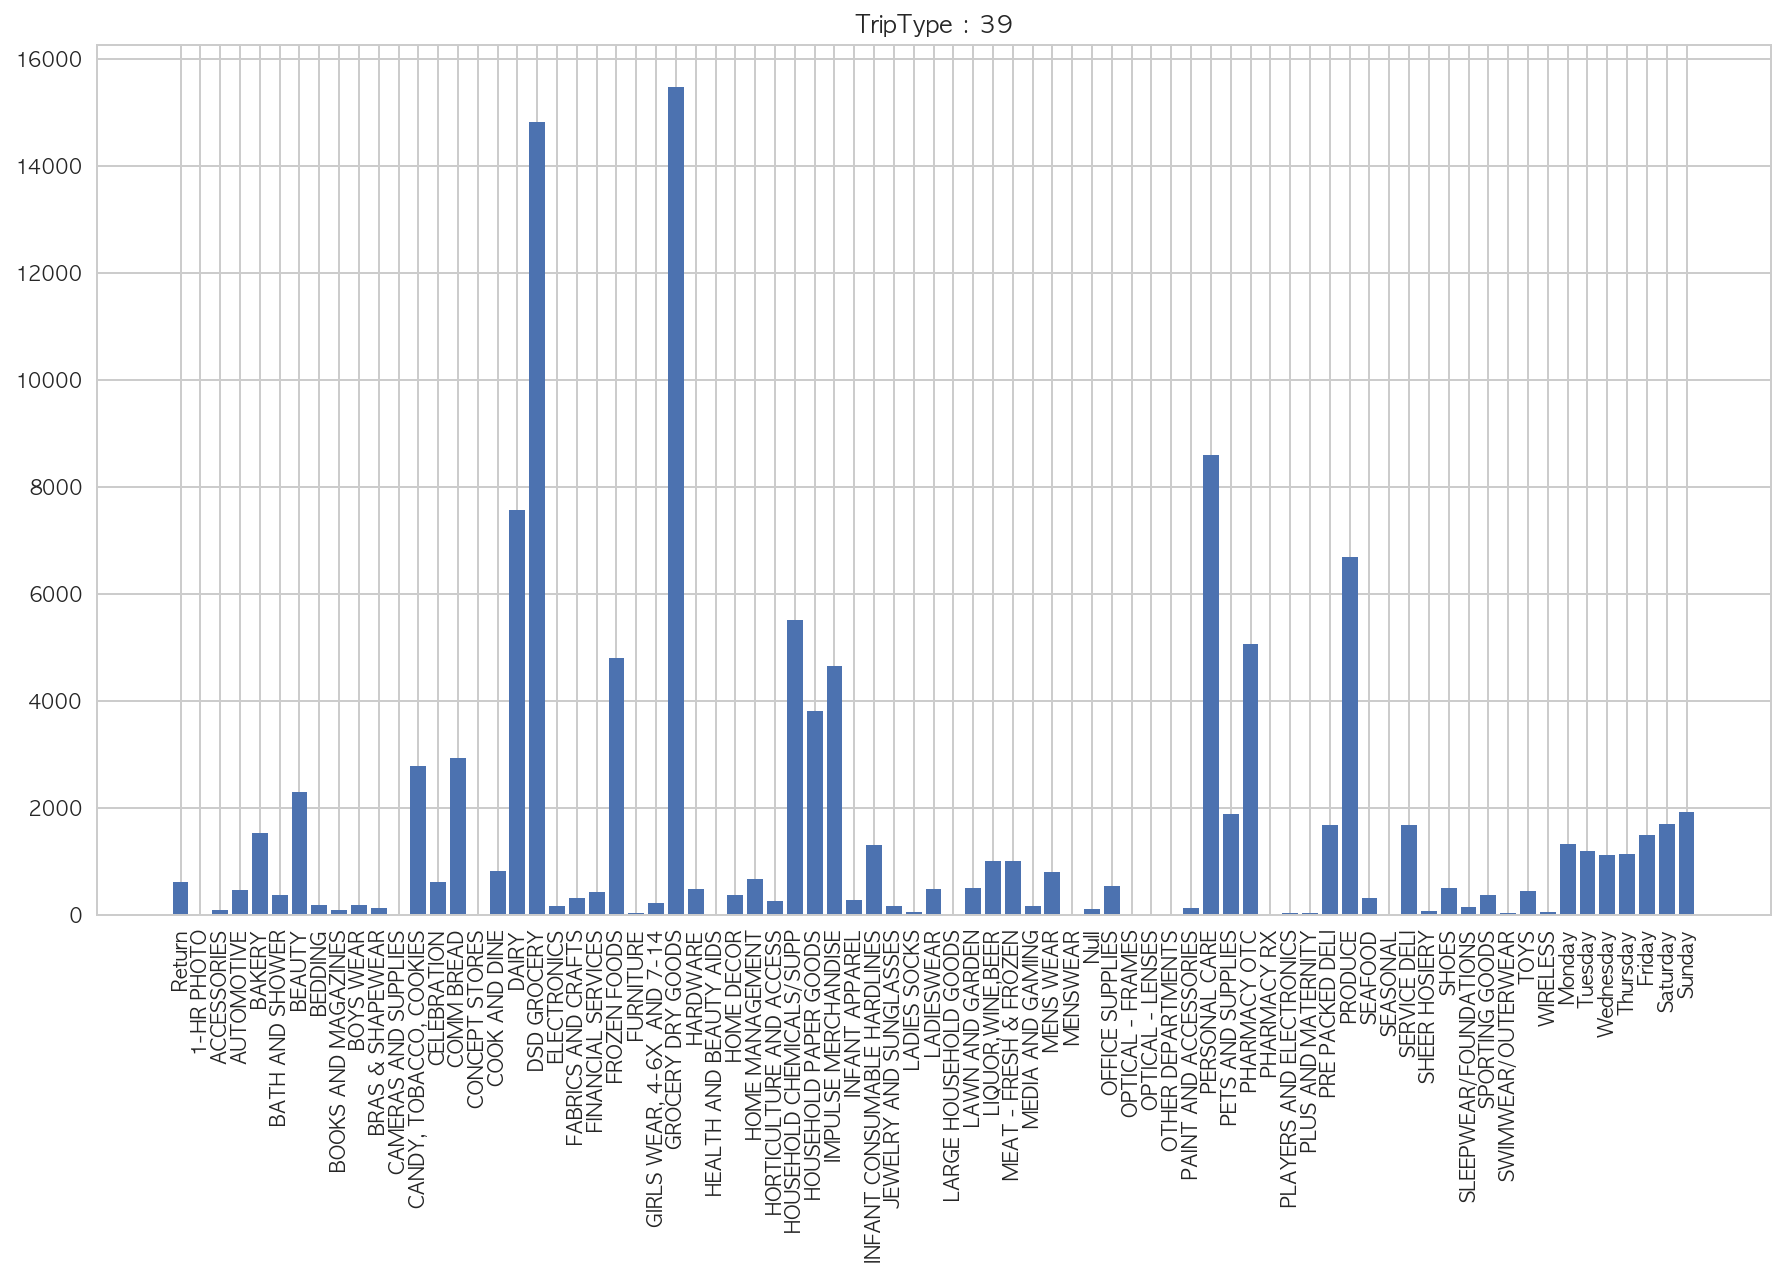

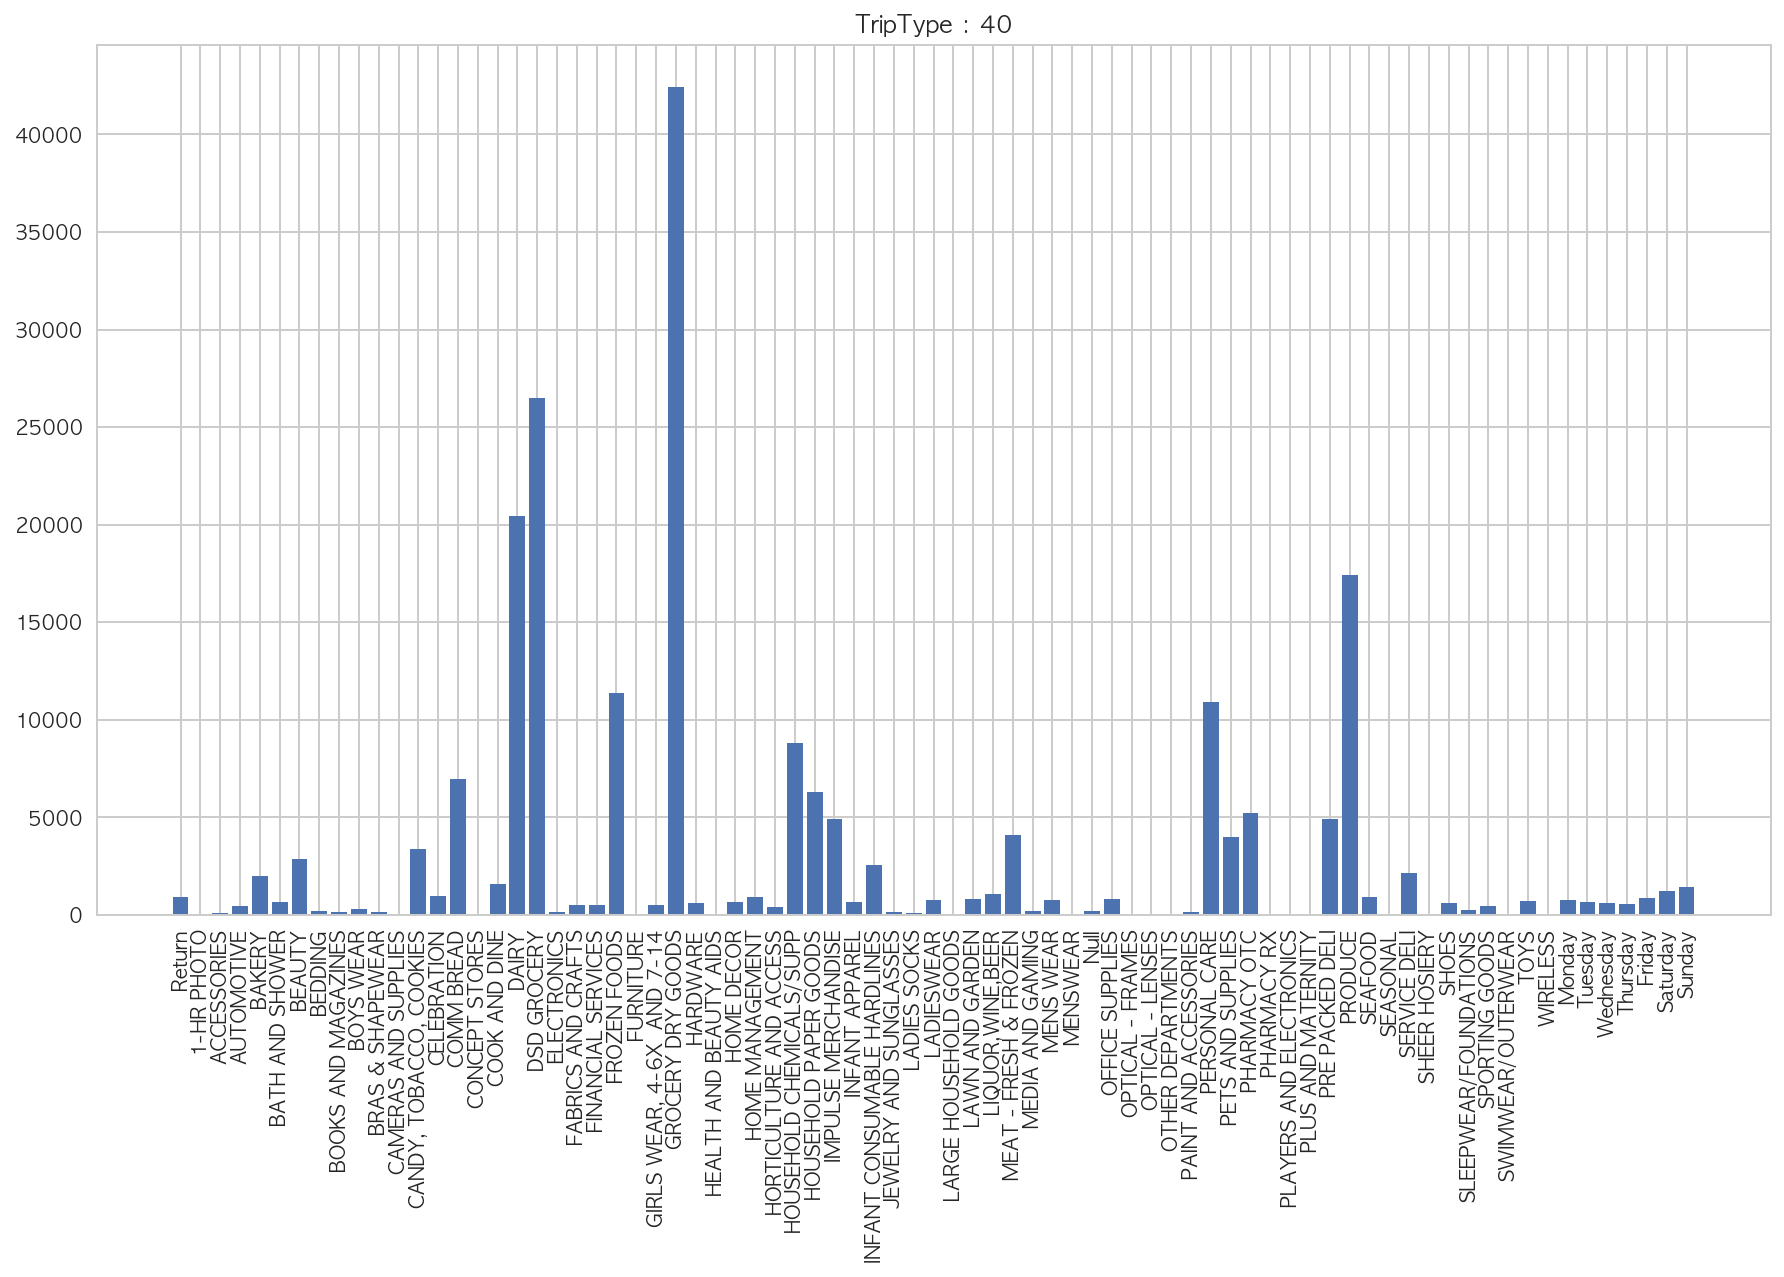

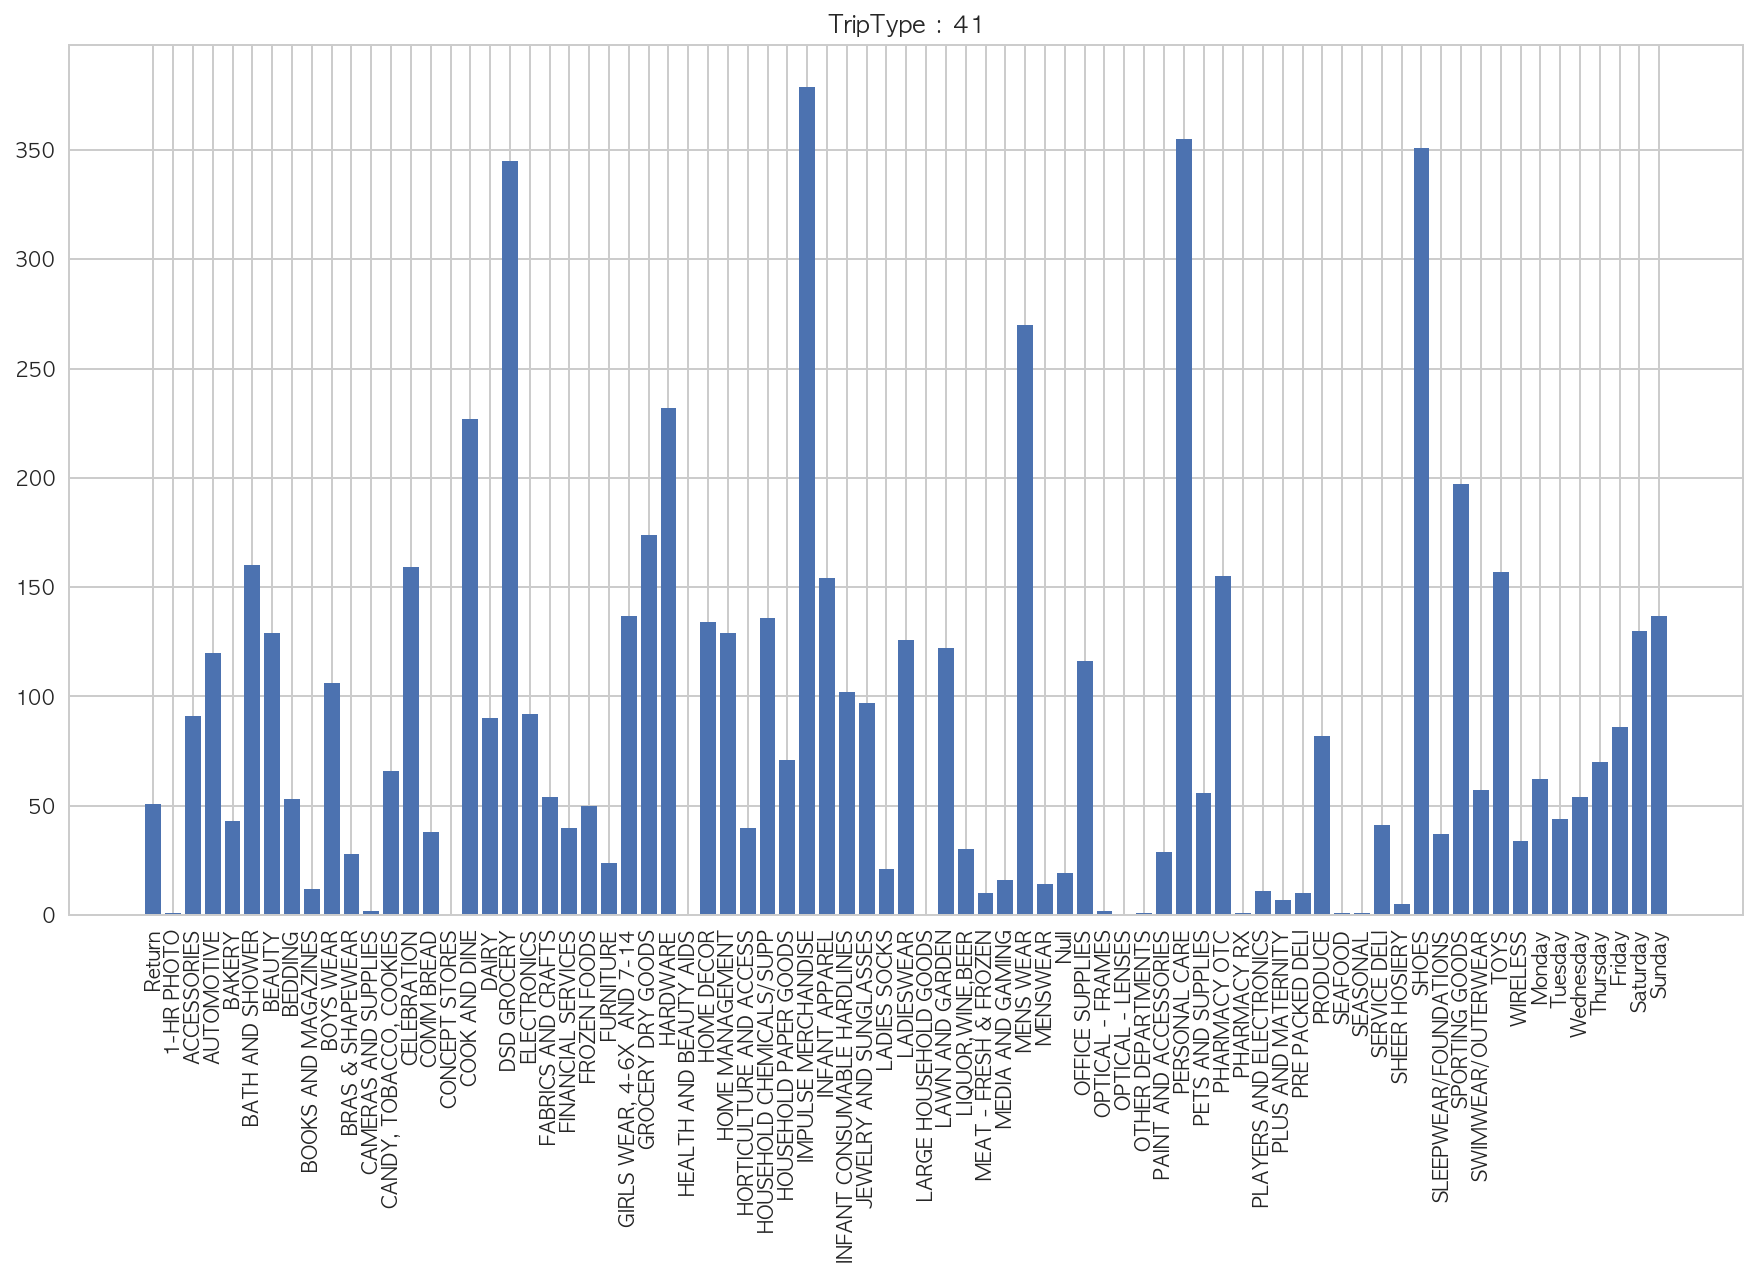

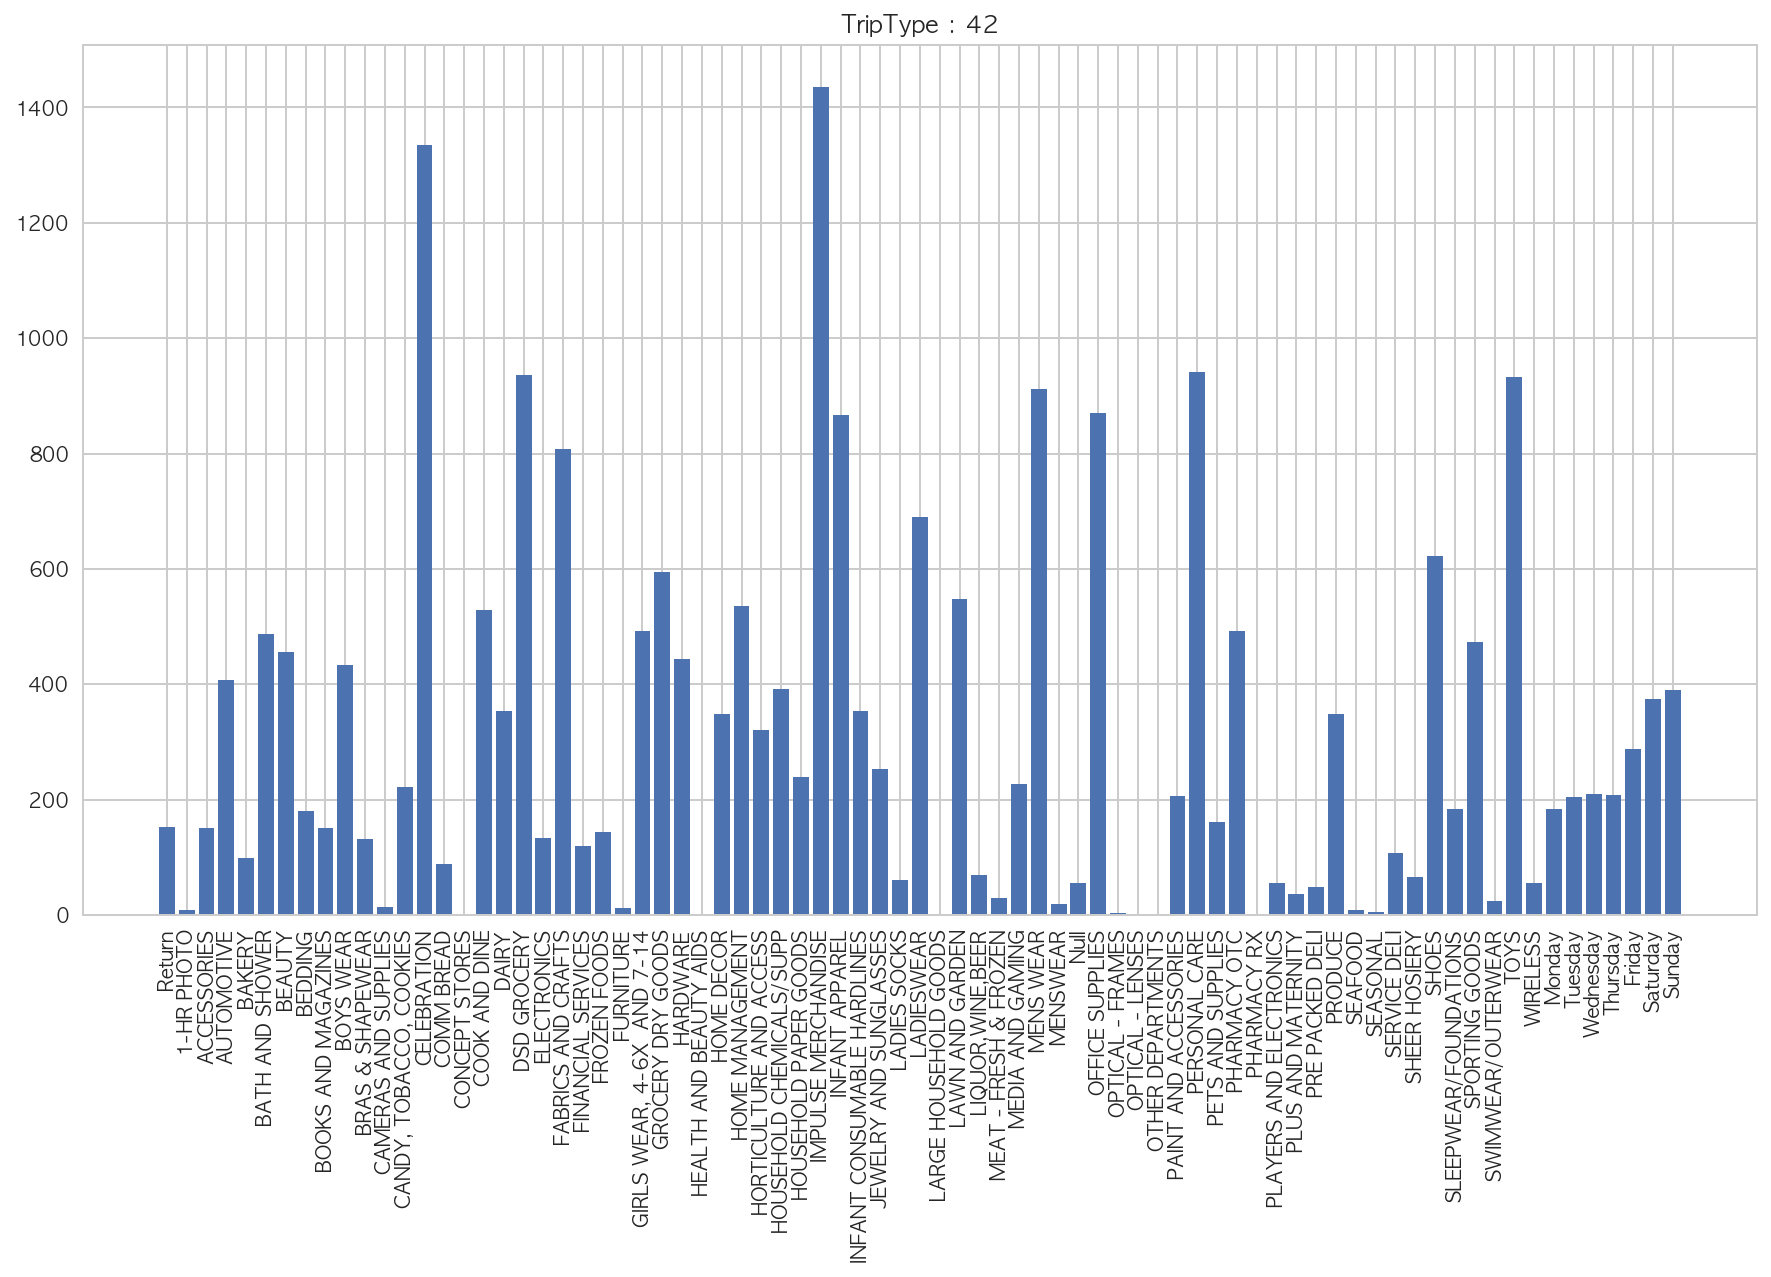

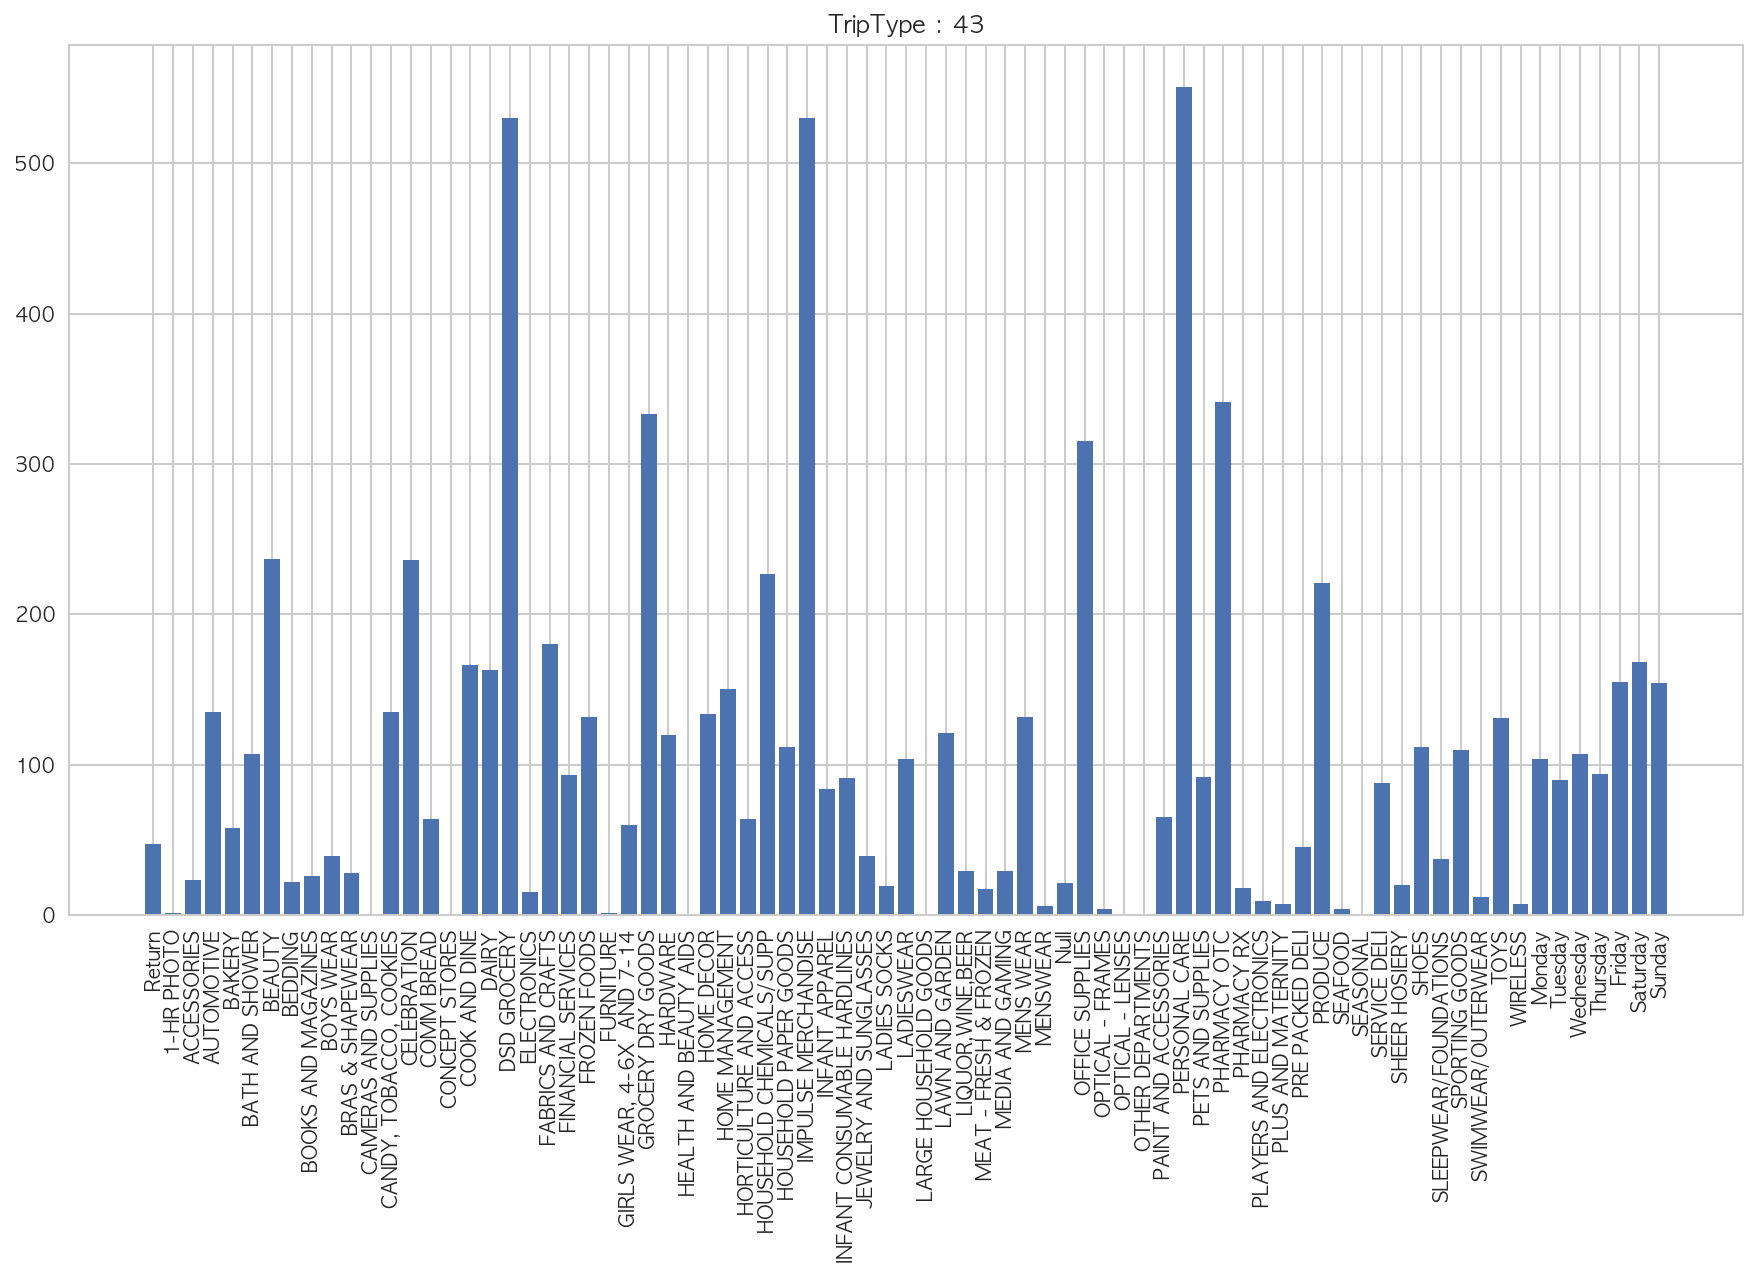

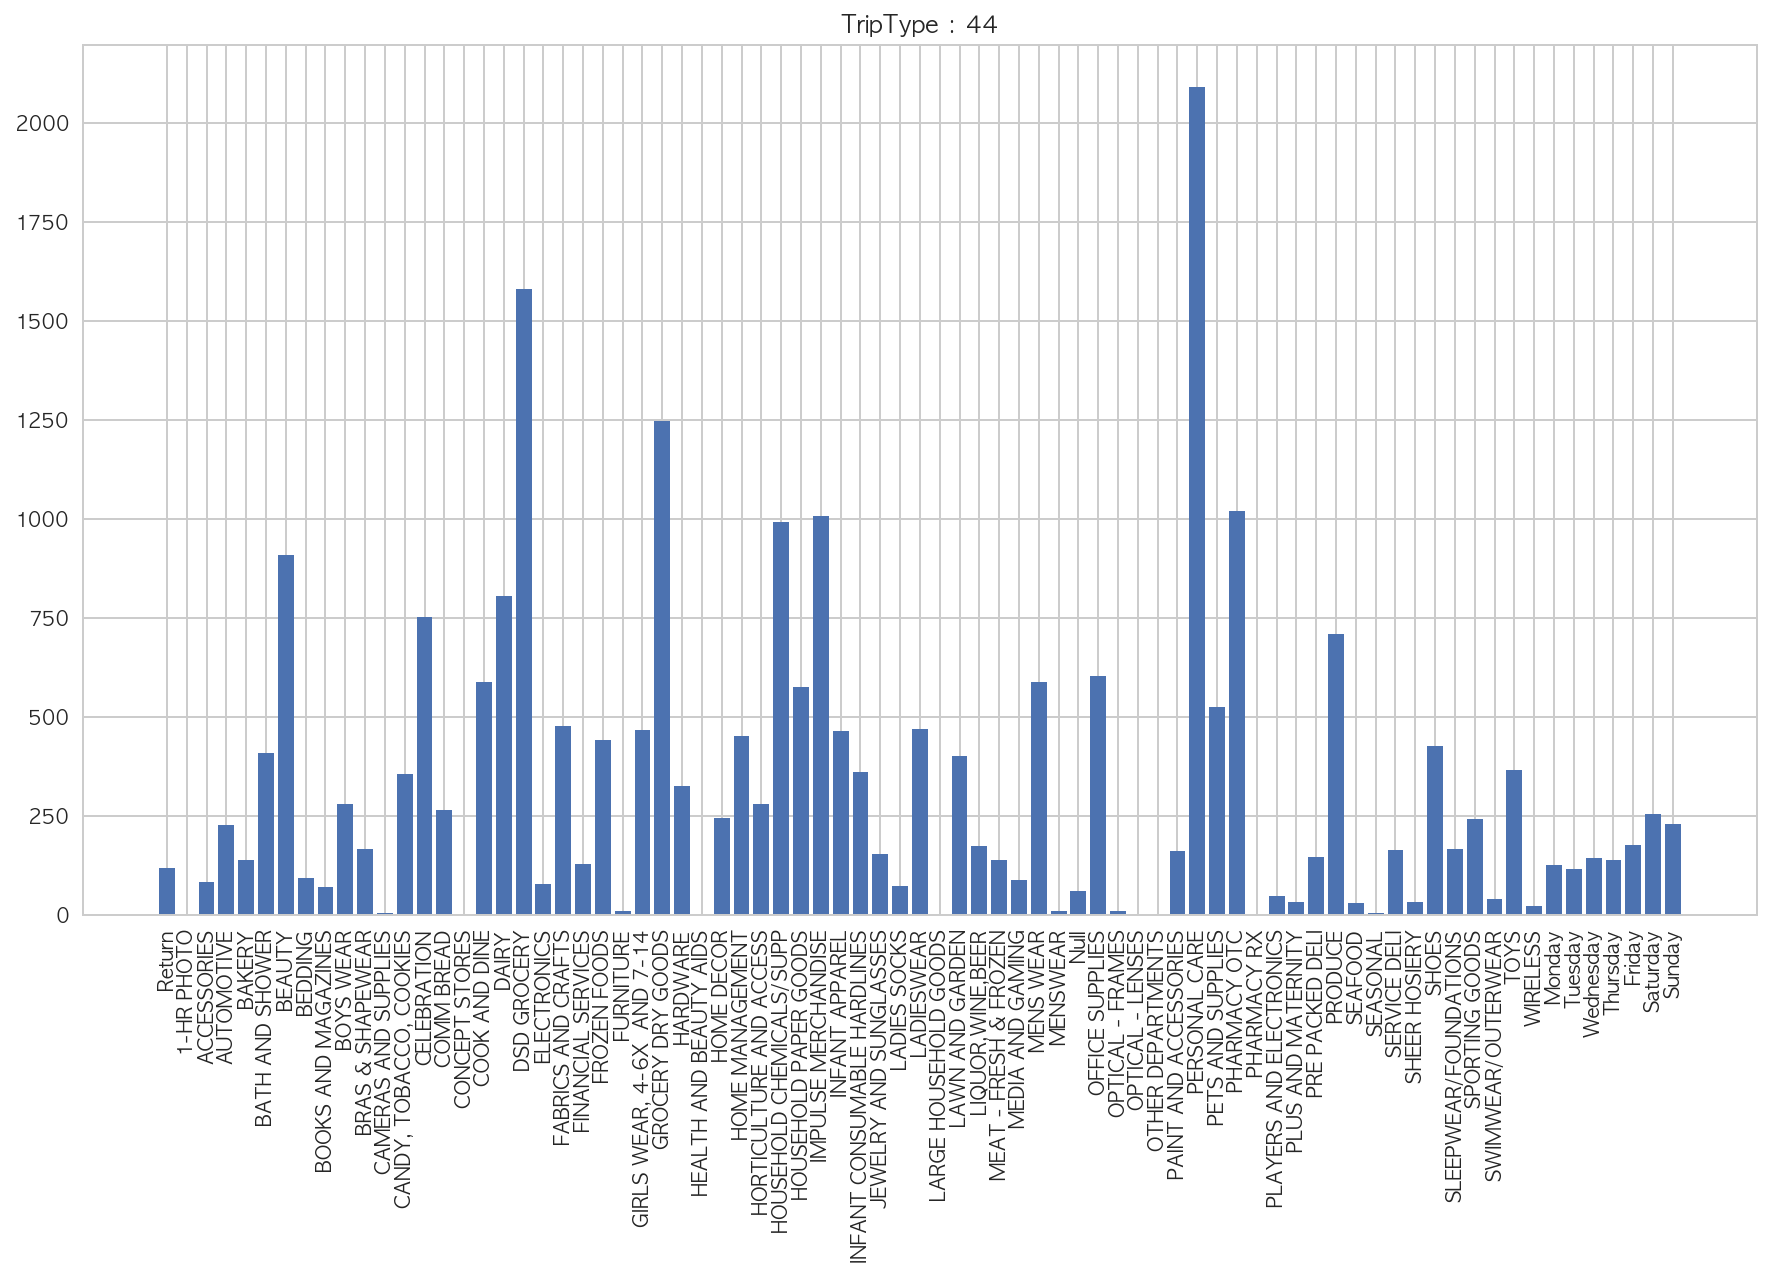

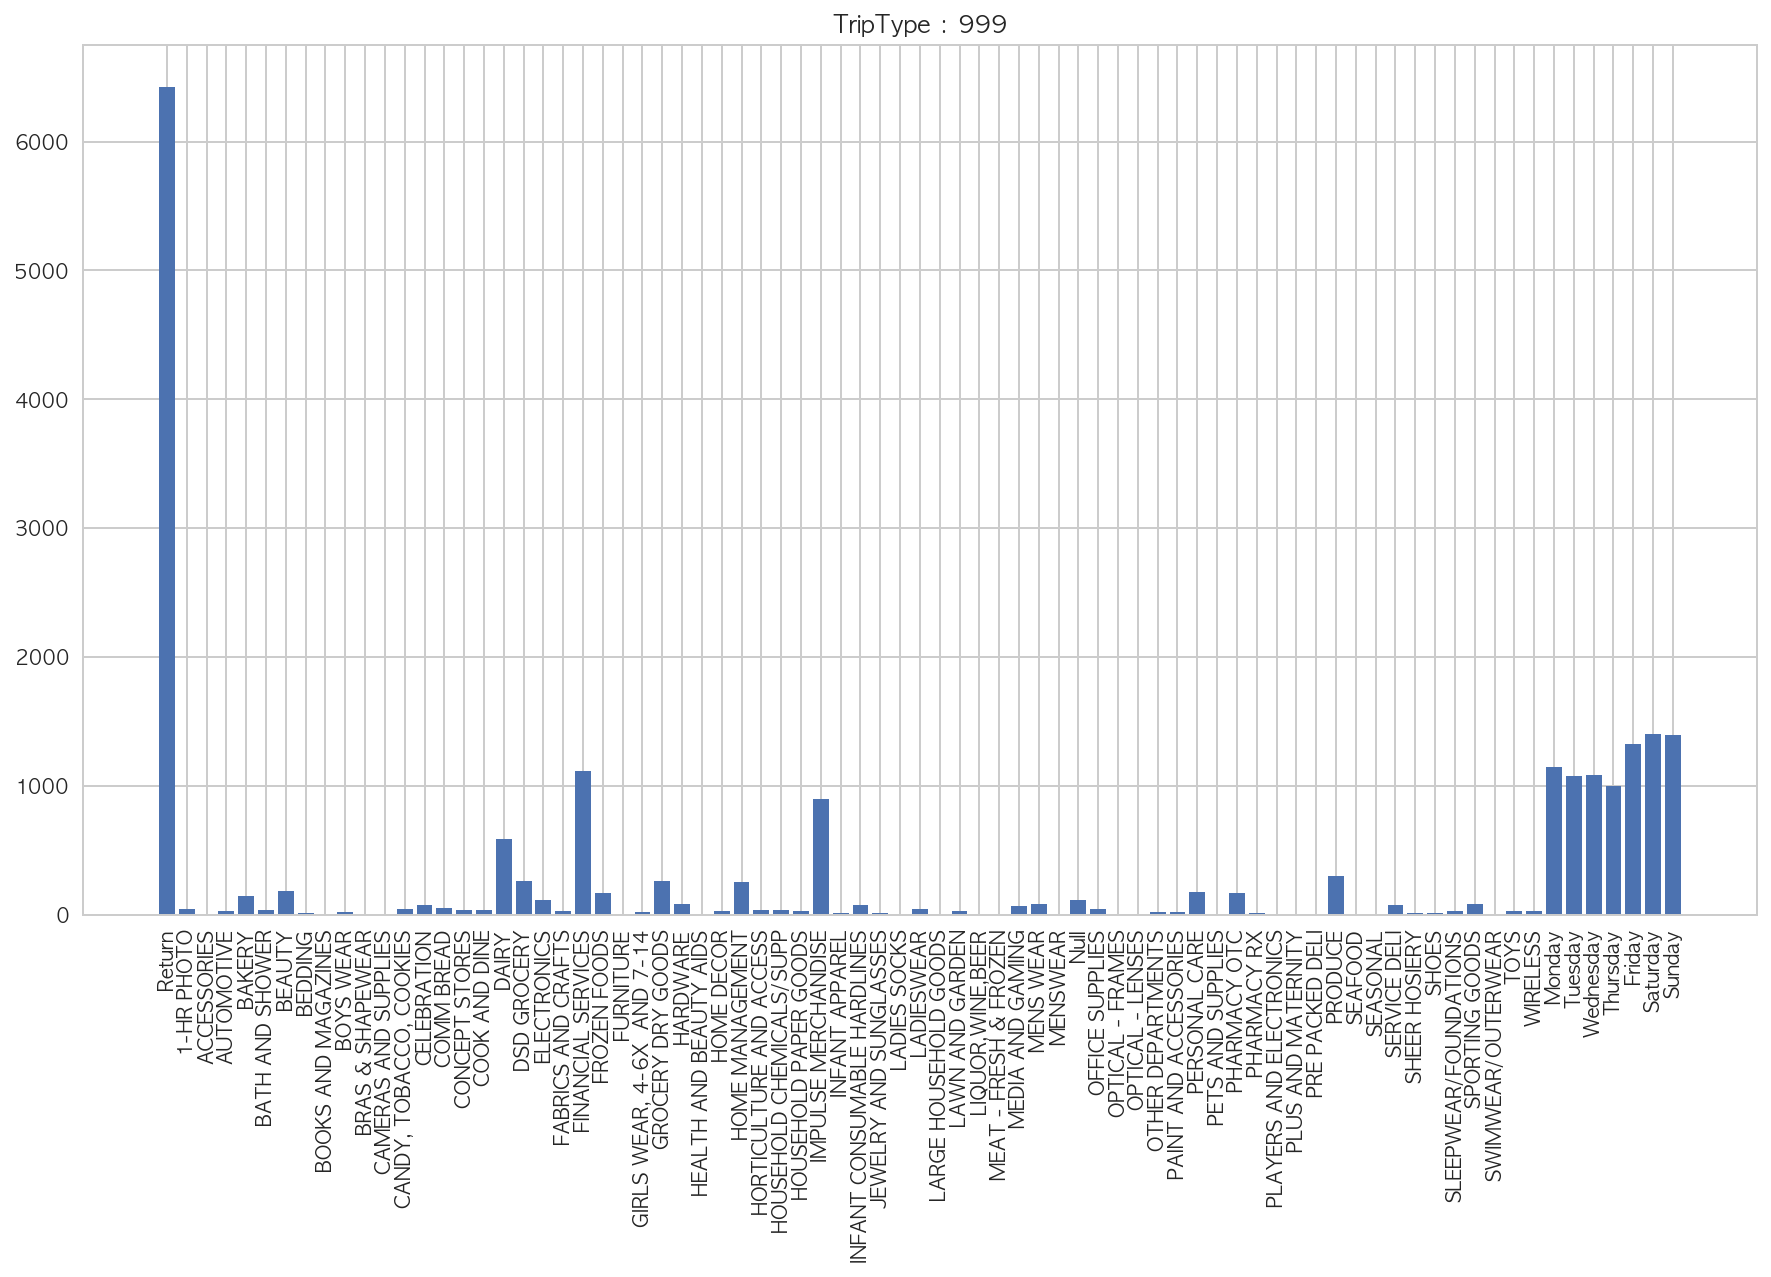

In [151]:
for i in range(len(dd_by_triptype)):
    plt.figure(figsize=(15, 8))
    plt.bar(index, dd_by_triptype[cols].loc[i].values)
    plt.title("TripType : " + str(np.unique(dd_by_triptype.loc[i]["TripType"])[0]))
    plt.xticks(rotation=90)
    plt.show()

In [129]:
from sklearn.naive_bayes import MultinomialNB
def fitNaiveBayesModel(X, y):
    return MultinomialNB().fit(X, y)

In [130]:
model = fitNaiveBayesModel(dd_by_triptype[cols], dd_by_triptype["TripType"])

In [131]:
y_pred = model.predict(dd_by_triptype[cols])

In [168]:
model_fl = fitNaiveBayesModel(fl_by_triptype[cols_fl], fl_by_triptype["TripType"])

In [179]:
model_fl_full = fitNaiveBayesModel(df_train_fl[cols_fl], df_train_fl["TripType"])

In [172]:
fl_by_triptype.head()

TripType  Return  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   ...    1627.0  \
0         3       0  807    0   76    1    0    0    3    0   ...         0   
1         4       0    5    0    0    0    2    0    1    0   ...         0   
2         5       0   51    3    3    1    1    8    6    0   ...         0   
3         6       0   16    0    0    0    1    1    0    0   ...         0   
4         7       2   66    4    2    0    0    3    2    0   ...         0   

     -1  8191.0  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0     5       0     437      457        480       402     794       622   
1     5       0      51       40         45        40      62        62   
2  2568       0     584      628        671       638     751       742   
3     3       0     138      128        162       136     226       303   
4    27       0     799      780        807       746     877       843   

   Sunday  
0     451  
1      46  
2     579  
3     184  
4     900  

[5 rows x 5363 columns]

In [132]:
import awesome_functions as af

In [135]:
df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")

In [3]:
df_train_fl = pd.read_csv("Feature_matrix/df_train_fl_201807291845.csv")

In [136]:
y_pred_proba = model.predict_proba(df_test_dd[cols])

In [155]:
y_pred = model.predict(df_train_dd[cols])

In [169]:
y_pred_fl = model_fl.predict(df_train_fl[cols_fl])

In [138]:
submit = af.make_submission_df(submission, y_pred_proba)

In [140]:
af.saveDataFrameToCsv(submit, "multinomial_nb")

In [170]:
af.getAccuracy(df_train_fl["TripType"], y_pred_fl, len(df_train_fl))

##### Accuracy : 0.6016

In [180]:
y_pred_fl_full = model_fl_full.predict(df_train_fl[cols_fl])

In [18]:
af.getAccuracy(df_train_fl["TripType"], y_pred_fl_full, len(df_train_fl))

NameError: name 'af' is not defined

In [182]:
print(classification_report(df_train_fl["TripType"], y_pred_fl_full))

             precision    recall  f1-score   support

          3       0.87      0.96      0.91      3643
          4       0.69      0.17      0.28       346
          5       0.70      0.75      0.73      4593
          6       0.71      0.57      0.63      1277
          7       0.69      0.77      0.73      5752
          8       0.56      0.75      0.64     12161
          9       0.63      0.69      0.66      9464
         12       0.59      0.31      0.41       269
         14       1.00      0.75      0.86         4
         15       0.54      0.57      0.55       978
         18       0.63      0.40      0.49       549
         19       0.84      0.19      0.31       375
         20       0.73      0.44      0.55       637
         21       0.63      0.64      0.64       641
         22       0.74      0.36      0.49       928
         23       0.82      0.06      0.12       139
         24       0.63      0.58      0.61      2609
         25       0.68      0.69      0.68   

In [174]:
report_fl = classification_report(df_train_fl["TripType"], y_pred_fl)

In [157]:
af.getAccuracy(df_train_dd["TripType"], y_pred, len(df_train_dd))

##### Accuracy : 0.4586

In [175]:
report_dd = classification_report(df_train_dd["TripType"], y_pred)

In [177]:
import functions as pf

In [178]:
pf.compareClassificationReport(report_fl, report_dd)

NameError: name 'report_fl_np' is not defined

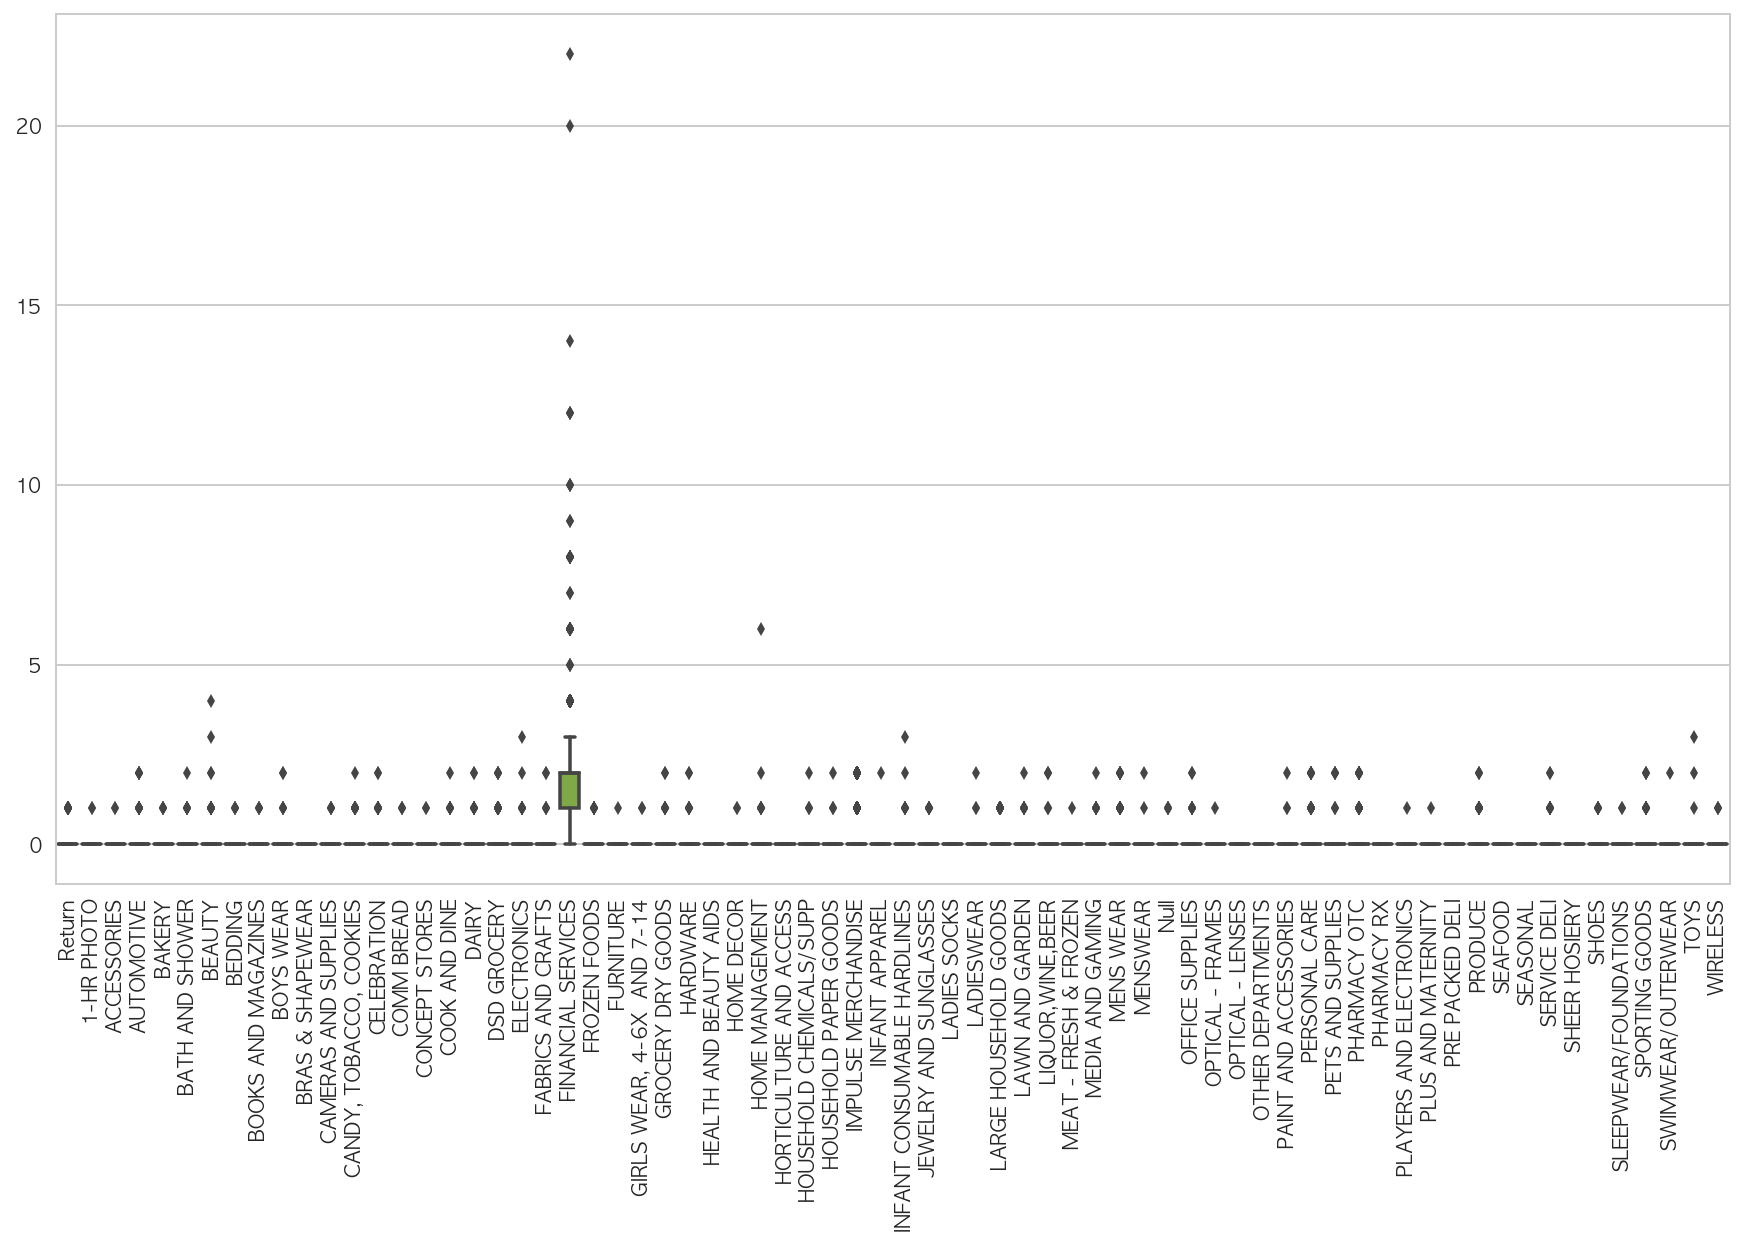

In [79]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_dict_by_triptype[3][cols])
plt.xticks(rotation=90)
plt.show()

In [145]:
from keras.models import Sequential
from keras.layers.core import Dense
# from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.utils import np_utils

Using TensorFlow backend.


In [141]:
X, y = dd_by_triptype[cols], dd_by_triptype["TripType"]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [1]:
import xgboost
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [8]:
model_xgb.fit(fl_by_triptype[cols_fl], fl_by_triptype["TripType"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)